# SIS Code

This notebook showcases a full analysis from data cleaning and manipulation to visualizations and actionable insights and conclusions

# Table of Contents

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from plotnine import *
%matplotlib inline
sns.set()
sns.set_style('whitegrid')

## Load Data

In [3]:
nfl = pd.read_csv('AnalyticsChallenge2020Data.csv')

In [4]:
nfl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74012 entries, 0 to 74011
Data columns (total 52 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   GameID              74012 non-null  int64  
 1   EventID             74012 non-null  int64  
 2   Season              74012 non-null  int64  
 3   Week                74012 non-null  int64  
 4   StadiumName         74012 non-null  object 
 5   OffensiveTeam       74012 non-null  object 
 6   DefensiveTeam       74012 non-null  object 
 7   OffTeamScoreBefore  74012 non-null  int64  
 8   DefTeamScoreBefore  74012 non-null  int64  
 9   Quarter             74012 non-null  int64  
 10  TimeLeft            74012 non-null  int64  
 11  Down                74012 non-null  int64  
 12  ToGo                74012 non-null  int64  
 13  SideOfField         74012 non-null  object 
 14  StartYard           74012 non-null  int64  
 15  EventType           74012 non-null  object 
 16  Firs

In [5]:
# Offense's Perspective
#DL[DL['Touchdown']==1]['SideOfField'].value_counts()

In [6]:
# Offense's Perspective
#ecom[(ecom['CC Provider']=='American Express') & (ecom['Purchase Price']>95)].count()
#DL[(DL['EventType']=='rush') & (DL['SideOfField']=='Oppo') & (DL['Touchdown']==1)] ['StartYard'].value_counts()

In [7]:
nfl.describe()

GameID       EventID   Season          Week  OffTeamScoreBefore  \
count  74012.000000  74012.000000  74012.0  74012.000000        74012.000000   
mean    2697.254675    442.748689   2019.0     13.185308           10.612657   
std       38.919604    261.875270      0.0      2.562688            9.680776   
min     2630.000000     10.000000   2019.0      9.000000            0.000000   
25%     2663.000000    215.000000   2019.0     11.000000            3.000000   
50%     2697.000000    450.000000   2019.0     13.000000            9.000000   
75%     2731.000000    665.000000   2019.0     15.000000           17.000000   
max     2764.000000   1220.000000   2019.0     17.000000           49.000000   

       DefTeamScoreBefore       Quarter      TimeLeft          Down  \
count        74012.000000  74012.000000  74012.000000  74012.000000   
mean            11.995474      2.567327    428.068030      1.779198   
std             10.157934      1.130256    272.067884      0.823409   
min              0.000000      1.000000      1.000000      1.000000   
25%              3.000000      2.000000    181.000000      1.000000   
50%             10.000000      3.000000    415.000000      2.000000   
75%             18.000000      4.000000    665.000000      2.000000   
max             49.000000      5.000000    900.000000      4.000000   

               ToGo  ...     IsRushing    SoloTackle  AssistedTackle  \
count  74012.000000  ...  74012.000000  74012.000000    74012.000000   
mean       8.459034  ...      0.542453      0.036386        0.030671   
std        3.866279  ...      0.498198      0.187250        0.172425   
min        1.000000  ...      0.000000      0.000000        0.000000   
25%        6.000000  ...      0.000000      0.000000        0.000000   
50%       10.000000  ...      1.000000      0.000000        0.000000   
75%       10.000000  ...      1.000000      0.000000        0.000000   
max       34.000000  ...      1.000000      1.000000        1.000000   

           Pressure      SoloSack  AssistedSack   PassBreakup  Interception  \
count  74012.000000  74012.000000  74012.000000  74012.000000  74012.000000   
mean       0.049816      0.006580      0.001405      0.002905      0.000149   
std        0.217567      0.080851      0.037460      0.053819      0.012190   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        0.000000      0.000000      0.000000      0.000000      0.000000   
75%        0.000000      0.000000      0.000000      0.000000      0.000000   
max        1.000000      1.000000      1.000000      1.000000      1.000000   

       ForcedFumble  RecoveredFumble  
count  74012.000000     74012.000000  
mean       0.001405         0.000784  
std        0.037460         0.027983  
min        0.000000         0.000000  
25%        0.000000         0.000000  
50%        0.000000         0.000000  
75%        0.000000         0.000000  
max        1.000000         1.000000  

[8 rows x 40 columns]

In [8]:
nfl.head(1)

GameID  EventID  Season  Week         StadiumName OffensiveTeam  \
0    2630       10    2019     9  State Farm Stadium     Cardinals   

  DefensiveTeam  OffTeamScoreBefore  DefTeamScoreBefore  Quarter  ...  \
0         49ers                   0                   0        1  ...   

   IsRushing  SoloTackle  AssistedTackle Pressure  SoloSack AssistedSack  \
0          0           0               0        0         0            0   

   PassBreakup  Interception  ForcedFumble  RecoveredFumble  
0            0             0             0                0  

[1 rows x 52 columns]

## Data Cleaning 

In [9]:
# NA Values per feature
nfl.isnull().sum(axis = 0)

GameID                    0
EventID                   0
Season                    0
Week                      0
StadiumName               0
OffensiveTeam             0
DefensiveTeam             0
OffTeamScoreBefore        0
DefTeamScoreBefore        0
Quarter                   0
TimeLeft                  0
Down                      0
ToGo                      0
SideOfField               0
StartYard                 0
EventType                 0
FirstDown                 0
Touchdown                 0
Safety                    0
Turnover                  0
RunDirection          41992
UsedDesignedGap       41992
Attempt               32020
Completion            32020
Spike                 32020
ThrowDepth            32020
PressureOnPlay        32020
SackOnPlay            32020
PassBreakupOnPlay     32020
InterceptionOnPlay    32020
FumbleByPasser        32020
FumbleByRusher        41992
FumbleByReceiver      36549
OffensiveYardage          0
EPA                       5
PlayDesc            

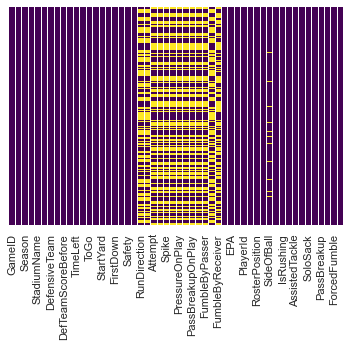

In [10]:
# Heatmap of NA Values by Feature
sns.heatmap(nfl.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [11]:
# Percentage of missing data by feature
for col in nfl.columns:
    pct_missing = np.mean(nfl[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

GameID - 0.0%
EventID - 0.0%
Season - 0.0%
Week - 0.0%
StadiumName - 0.0%
OffensiveTeam - 0.0%
DefensiveTeam - 0.0%
OffTeamScoreBefore - 0.0%
DefTeamScoreBefore - 0.0%
Quarter - 0.0%
TimeLeft - 0.0%
Down - 0.0%
ToGo - 0.0%
SideOfField - 0.0%
StartYard - 0.0%
EventType - 0.0%
FirstDown - 0.0%
Touchdown - 0.0%
Safety - 0.0%
Turnover - 0.0%
RunDirection - 57.0%
UsedDesignedGap - 57.0%
Attempt - 43.0%
Completion - 43.0%
Spike - 43.0%
ThrowDepth - 43.0%
PressureOnPlay - 43.0%
SackOnPlay - 43.0%
PassBreakupOnPlay - 43.0%
InterceptionOnPlay - 43.0%
FumbleByPasser - 43.0%
FumbleByRusher - 57.0%
FumbleByReceiver - 49.0%
OffensiveYardage - 0.0%
EPA - 0.0%
PlayDesc - 0.0%
PlayerId - 0.0%
Name - 0.0%
RosterPosition - 0.0%
OnFieldPosition - 0.0%
SideOfBall - 6.0%
TechniqueName - 0.0%
IsRushing - 0.0%
SoloTackle - 0.0%
AssistedTackle - 0.0%
Pressure - 0.0%
SoloSack - 0.0%
AssistedSack - 0.0%
PassBreakup - 0.0%
Interception - 0.0%
ForcedFumble - 0.0%
RecoveredFumble - 0.0%


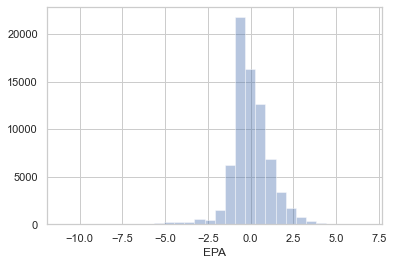

In [12]:
sns.distplot(nfl['EPA'],kde=False,bins=30)

In [13]:
# Replacing null 'EPA' values with the mean
nfl['EPA'].fillna((nfl['EPA'].mean()), inplace=True)
nfl.isnull().sum(axis = 0)['EPA']

0

In [14]:
# Unique Values within TechniqueName Feature 
nfl['TechniqueName'].unique()

array(['1', '7', '5', '3', '0', 'Outside', 'Off Ball', '9', '2i', '4i',
       '6', '4', '2'], dtype=object)

In [15]:
# No missing null values in the SideOfBall feature 
# when the the 'Outside' technique is present
nfl[nfl['TechniqueName']=='Outside']['SideOfBall'].unique()

array(['L', 'R'], dtype=object)

In [16]:
# 1845 rows of missing null values in the SideOfBall feature 
# when the the 'Off Ball' technique is present
nfl[nfl['TechniqueName']=='Off Ball']['SideOfBall']

35       NaN
36       NaN
58       NaN
62       NaN
80       NaN
        ... 
73877    NaN
73882    NaN
73901    NaN
73934    NaN
73960    NaN
Name: SideOfBall, Length: 1845, dtype: object

In [17]:
# 2743 rows of missing null values in the SideOfBall feature 
# when the the '0' technique is present
# The 1845 rows from earlier + these 2743 rows accounts
# for all 6% of the null values in the SideOfBall feature
nfl[nfl['TechniqueName']=='0']['SideOfBall']

24       NaN
29       NaN
34       NaN
57       NaN
79       NaN
        ... 
73759    NaN
73808    NaN
73865    NaN
73887    NaN
73990    NaN
Name: SideOfBall, Length: 2473, dtype: object

In [18]:
# We see that only on field considered LB played
# a technique considered Off Ball
nfl[nfl['TechniqueName']=='Off Ball']['OnFieldPosition'].unique()

array(['LB'], dtype=object)

In [19]:
# We see that only on field considered DL played
# a technique considered 0
# When we create a new df all on field LB will be dropped
# along with the 1845 na values, but the 2473 na values will
# remain and be dealt with
nfl[nfl['TechniqueName']=='0']['OnFieldPosition'].unique()

array(['DL'], dtype=object)

In [20]:
# Let's first simply define a DL position as being a 
# player whose OnFieldPosition was considered to be DL
# new df that includes only observations with an DL
# on field position
DL = nfl[nfl['OnFieldPosition']=='DL']

In [21]:
# NA Values in new DL df Side Of Ball Feature
DL.isnull().sum(axis = 0)['SideOfBall']

2473

In [22]:
# Now let's fill these missing na values in the SideOfBall feature 
# Nose Tackle = 0 & Assign Side of Ball to 'Middle'
DL['SideOfBall'].fillna('M',inplace=True)

/Users/KyleVanderMeulen/opt/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:6245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [23]:
DL['SideOfBall'].unique()

array(['L', 'R', 'M'], dtype=object)

In [24]:
# All missing values have been replace with 'M'(Middle)
DL.isnull().sum(axis = 0)['SideOfBall']

0

In [25]:
# Let's move on to drop the rest of the features 
for col in DL.columns:
    pct_missing = np.mean(DL[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

GameID - 0.0%
EventID - 0.0%
Season - 0.0%
Week - 0.0%
StadiumName - 0.0%
OffensiveTeam - 0.0%
DefensiveTeam - 0.0%
OffTeamScoreBefore - 0.0%
DefTeamScoreBefore - 0.0%
Quarter - 0.0%
TimeLeft - 0.0%
Down - 0.0%
ToGo - 0.0%
SideOfField - 0.0%
StartYard - 0.0%
EventType - 0.0%
FirstDown - 0.0%
Touchdown - 0.0%
Safety - 0.0%
Turnover - 0.0%
RunDirection - 57.0%
UsedDesignedGap - 57.0%
Attempt - 43.0%
Completion - 43.0%
Spike - 43.0%
ThrowDepth - 43.0%
PressureOnPlay - 43.0%
SackOnPlay - 43.0%
PassBreakupOnPlay - 43.0%
InterceptionOnPlay - 43.0%
FumbleByPasser - 43.0%
FumbleByRusher - 57.0%
FumbleByReceiver - 49.0%
OffensiveYardage - 0.0%
EPA - 0.0%
PlayDesc - 0.0%
PlayerId - 0.0%
Name - 0.0%
RosterPosition - 0.0%
OnFieldPosition - 0.0%
SideOfBall - 0.0%
TechniqueName - 0.0%
IsRushing - 0.0%
SoloTackle - 0.0%
AssistedTackle - 0.0%
Pressure - 0.0%
SoloSack - 0.0%
AssistedSack - 0.0%
PassBreakup - 0.0%
Interception - 0.0%
ForcedFumble - 0.0%
RecoveredFumble - 0.0%


In [26]:
# As you can see there are an over abudance of missing values 
# for these features. So for right now we will drop them but
# revisit them later on
DL.iloc[:, 20:33].head(10)  


RunDirection  UsedDesignedGap  Attempt  Completion  Spike  \
0  Left Off-Tackle B Gap              1.0      NaN         NaN    NaN   
1  Left Off-Tackle B Gap              1.0      NaN         NaN    NaN   
2  Left Off-Tackle B Gap              1.0      NaN         NaN    NaN   
3  Left Off-Tackle B Gap              1.0      NaN         NaN    NaN   
4             Left A Gap              1.0      NaN         NaN    NaN   
5             Left A Gap              1.0      NaN         NaN    NaN   
6             Left A Gap              1.0      NaN         NaN    NaN   
7             Left A Gap              1.0      NaN         NaN    NaN   
8                    NaN              NaN      1.0         0.0    0.0   
9                    NaN              NaN      1.0         0.0    0.0   

   ThrowDepth  PressureOnPlay  SackOnPlay  PassBreakupOnPlay  \
0         NaN             NaN         NaN                NaN   
1         NaN             NaN         NaN                NaN   
2         NaN             NaN         NaN                NaN   
3         NaN             NaN         NaN                NaN   
4         NaN             NaN         NaN                NaN   
5         NaN             NaN         NaN                NaN   
6         NaN             NaN         NaN                NaN   
7         NaN             NaN         NaN                NaN   
8        19.0             1.0         0.0                0.0   
9        19.0             1.0         0.0                0.0   

   InterceptionOnPlay  FumbleByPasser  FumbleByRusher  FumbleByReceiver  
0                 NaN             NaN             0.0               NaN  
1                 NaN             NaN             0.0               NaN  
2                 NaN             NaN             0.0               NaN  
3                 NaN             NaN             0.0               NaN  
4                 NaN             NaN             0.0               NaN  
5                 NaN             NaN             0.0               NaN  
6                 NaN             NaN             0.0               NaN  
7                 NaN             NaN             0.0               NaN  
8                 0.0             0.0             NaN               0.0  
9                 0.0             0.0             NaN               0.0

In [27]:
# Dropping columns with 40% or more missing data
DL.drop(DL.iloc[:, 20:33], inplace=True, axis = 1) 

/Users/KyleVanderMeulen/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [28]:
# Data is now properly cleaned of null values
DL.isnull().sum()

GameID                0
EventID               0
Season                0
Week                  0
StadiumName           0
OffensiveTeam         0
DefensiveTeam         0
OffTeamScoreBefore    0
DefTeamScoreBefore    0
Quarter               0
TimeLeft              0
Down                  0
ToGo                  0
SideOfField           0
StartYard             0
EventType             0
FirstDown             0
Touchdown             0
Safety                0
Turnover              0
OffensiveYardage      0
EPA                   0
PlayDesc              0
PlayerId              0
Name                  0
RosterPosition        0
OnFieldPosition       0
SideOfBall            0
TechniqueName         0
IsRushing             0
SoloTackle            0
AssistedTackle        0
Pressure              0
SoloSack              0
AssistedSack          0
PassBreakup           0
Interception          0
ForcedFumble          0
RecoveredFumble       0
dtype: int64

## Data Manipulation

In [29]:
# Let's look at all the unique values of 
# Roster Positioned players playing DL
DL['RosterPosition'].unique()

array(['DT', 'DE', 'LB', 'S', 'FB', 'T'], dtype=object)

In [30]:
DL['RosterPosition'].value_counts()

DT    26918
DE    21373
LB     3838
FB       29
S         4
T         1
Name: RosterPosition, dtype: int64

In [31]:
# Let's look at these lower count positions individually
# Tackle (T) Dan Skipper 6'10, 320 lbs, 3 Tech
DL[DL['RosterPosition']=='T'] ['Name']

56463    Dan Skipper
Name: Name, dtype: object

In [32]:
# Safety (S) Lamarcus Joyner 5'8, 185 lbs, 9 Tech
DL[DL['RosterPosition']=='S']['Name']

4242     Lamarcus Joyner
7573     Lamarcus Joyner
45053    Lamarcus Joyner
72506    Lamarcus Joyner
Name: Name, dtype: object

In [33]:
# Fullback (FB) Patrick Ricard 6'3, 284 lbs, '2', '4i', '0', '2i', '3' Tech
DL[DL['RosterPosition']=='FB']['Name'].unique()

array(['Patrick Ricard'], dtype=object)

In [34]:
DL[DL['RosterPosition']=='LB']['Name'].nunique()

62

In [35]:
DL[DL['RosterPosition']=='DT']['Name'].nunique()

143

In [36]:
DL[DL['RosterPosition']=='DE']['Name'].nunique()

133

In [37]:
# Within the Roster Position == T,S,and FB there is lack of 
# sufficient data to draw any conclusions off of the overall
# positive or negative effect their position has on a play. 
# Additionally, each of these positions are singular in nature
# containing only one player which could skew the data results

In [38]:
DL['RosterPosition'].count()

52163

In [39]:
# Indexing each position to be dropped
indexNames_T = DL[DL['RosterPosition'] == 'T' ].index
indexNames_S = DL[DL['RosterPosition'] == 'S' ].index
indexNames_FB = DL[DL['RosterPosition'] == 'FB' ].index

In [40]:
# Deleting these row indexes from dataFrame
DL.drop(indexNames_T , inplace=True)
DL.drop(indexNames_S , inplace=True)
DL.drop(indexNames_FB , inplace=True)

In [41]:
# After the drop
DL['RosterPosition'].count()

52129

In [42]:
DL['RosterPosition'].unique()

array(['DT', 'DE', 'LB'], dtype=object)

In [43]:
DL.select_dtypes(include=['object']).head(2)


StadiumName OffensiveTeam DefensiveTeam SideOfField EventType  \
0  State Farm Stadium     Cardinals         49ers         Own      rush   
1  State Farm Stadium     Cardinals         49ers         Own      rush   

                                            PlayDesc           Name  \
0  (14:54) (Shotgun) Drake, Kenyan (41) on a powe...     D.J. Jones   
1  (14:54) (Shotgun) Drake, Kenyan (41) on a powe...  Arik Armstead   

  RosterPosition OnFieldPosition SideOfBall TechniqueName  
0             DT              DL          L             1  
1             DE              DL          L             7

In [44]:
DL['SideOfBall'].value_counts()

L    25081
R    24588
M     2460
Name: SideOfBall, dtype: int64

In [45]:
DL[DL['RosterPosition']=='LB']['Name']

223        Chandler Jones
250        Chandler Jones
255         Terrell Suggs
259        Chandler Jones
288        Chandler Jones
               ...       
73163    Dante Fowler Jr.
73184    Dante Fowler Jr.
73428       Samson Ebukam
73466    Dante Fowler Jr.
73470    Dante Fowler Jr.
Name: Name, Length: 3838, dtype: object

In [46]:
# Nose tackles on the play 3-4 front
DL[DL['TechniqueName']=='0']['Name']

24           Corey Peters
29           Corey Peters
34           Corey Peters
57           Corey Peters
79              Zach Kerr
               ...       
73759    Kentavius Street
73808          Poona Ford
73865         Sheldon Day
73887          Poona Ford
73990       Arik Armstead
Name: Name, Length: 2460, dtype: object

In [47]:
# Assumption being made is that the defense was being ran as a 4-3 defensive front
# 1 Tech is DT
DL[DL['TechniqueName']=='1']['RosterPosition'].value_counts()

DT    6049
DE     500
LB       9
Name: RosterPosition, dtype: int64

In [48]:
 #2 Tech is DT 4-3 front
DL[DL['TechniqueName']=='2']['RosterPosition'].value_counts()

DT    1231
DE     534
LB       6
Name: RosterPosition, dtype: int64

In [49]:
 #2i Tech is DT 4-3 front
DL[DL['TechniqueName']=='2i']['RosterPosition'].value_counts()

DT    3500
DE     785
LB      14
Name: RosterPosition, dtype: int64

In [50]:
 #3 Tech is DT 4-3 front
DL[DL['TechniqueName']=='3']['RosterPosition'].value_counts()

DT    9923
DE    3126
LB     261
Name: RosterPosition, dtype: int64

In [51]:
 #4 Tech is DE 3-4 front
DL[DL['TechniqueName']=='4']['RosterPosition'].value_counts()

DE    1442
DT     799
LB     105
Name: RosterPosition, dtype: int64

In [52]:
 #4i Tech is DE 3-4 front
DL[DL['TechniqueName']=='4i']['RosterPosition'].value_counts()

DT    1925
DE    1758
LB     117
Name: RosterPosition, dtype: int64

In [53]:
 #5 Tech is DE 4-3 front
DL[DL['TechniqueName']=='5']['RosterPosition'].value_counts()

DE    2539
DT     676
LB     377
Name: RosterPosition, dtype: int64

In [54]:
 #6 Tech is DE 3-4 front
DL[DL['TechniqueName']=='6']['RosterPosition'].value_counts()

DE    2275
LB     356
DT     163
Name: RosterPosition, dtype: int64

In [55]:
 #7 Tech is DE 3-4 front
DL[DL['TechniqueName']=='7']['RosterPosition'].value_counts()

DE    2380
LB     558
DT     258
Name: RosterPosition, dtype: int64

In [56]:
 #9 Tech is DE 4-3 front
DL[DL['TechniqueName']=='9']['RosterPosition'].value_counts()

DE    5752
LB    2027
DT     224
Name: RosterPosition, dtype: int64

In [57]:
DL['TechniqueName'].value_counts(ascending=False)

3     13310
9      8003
1      6558
2i     4299
4i     3800
5      3592
7      3196
6      2794
0      2460
4      2346
2      1771
Name: TechniqueName, dtype: int64

In [58]:
DL['RosterPosition'].unique()

array(['DT', 'DE', 'LB'], dtype=object)

In [59]:
DL['OnFieldPosition'].nunique()

1

In [60]:
# 1  Reassigned On Field Position to NT to match the technique == 0
DL.loc[DL['TechniqueName']=='0','OnFieldPosition'] = 'NT'
DL[DL['OnFieldPosition']=='NT']['TechniqueName'].value_counts()

/Users/KyleVanderMeulen/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


0    2460
Name: TechniqueName, dtype: int64

In [61]:
# 2  Reassigned On Field Position to DT to match the technique == 1
DL.loc[DL['TechniqueName']=='1','OnFieldPosition'] = 'DT'
DL[DL['OnFieldPosition']=='DT']['TechniqueName'].value_counts()

1    6558
Name: TechniqueName, dtype: int64

In [62]:
# 3  Reassigned On Field Position to DT to match the technique == 2
DL.loc[DL['TechniqueName']=='2','OnFieldPosition'] = 'DT'
DL[DL['OnFieldPosition']=='DT']['TechniqueName'].value_counts()

1    6558
2    1771
Name: TechniqueName, dtype: int64

In [63]:
# 4  Reassigned On Field Position to DT to match the technique == 2i
DL.loc[DL['TechniqueName']=='2i','OnFieldPosition'] = 'DT'
DL[DL['OnFieldPosition']=='DT']['TechniqueName'].value_counts()

1     6558
2i    4299
2     1771
Name: TechniqueName, dtype: int64

In [64]:
# 5  Reassigned On Field Position to DT to match the technique == 3
DL.loc[DL['TechniqueName']=='3','OnFieldPosition'] = 'DT'
DL[DL['OnFieldPosition']=='DT']['TechniqueName'].value_counts()

3     13310
1      6558
2i     4299
2      1771
Name: TechniqueName, dtype: int64

In [65]:
# 6  Reassigned On Field Position to DE to match the technique == 4
DL.loc[DL['TechniqueName']=='4','OnFieldPosition'] = 'DE'
DL[DL['OnFieldPosition']=='DE']['TechniqueName'].value_counts()

4    2346
Name: TechniqueName, dtype: int64

In [66]:
# 7  Reassigned On Field Position to DE to match the technique == 4i
DL.loc[DL['TechniqueName']=='4i','OnFieldPosition'] = 'DE'
DL[DL['OnFieldPosition']=='DE']['TechniqueName'].value_counts()

4i    3800
4     2346
Name: TechniqueName, dtype: int64

In [67]:
# 8  Reassigned On Field Position to DE to match the technique == 5
DL.loc[DL['TechniqueName']=='5','OnFieldPosition'] = 'DE'
DL[DL['OnFieldPosition']=='DE']['TechniqueName'].value_counts()

4i    3800
5     3592
4     2346
Name: TechniqueName, dtype: int64

In [68]:
# 9  Reassigned On Field Position to DE to match the technique == 6
DL.loc[DL['TechniqueName']=='6','OnFieldPosition'] = 'DE'
DL[DL['OnFieldPosition']=='DE']['TechniqueName'].value_counts()

4i    3800
5     3592
6     2794
4     2346
Name: TechniqueName, dtype: int64

In [69]:
# 10  Reassigned On Field Position to DE to match the technique == 7
DL.loc[DL['TechniqueName']=='7','OnFieldPosition'] = 'DE'
DL[DL['OnFieldPosition']=='DE']['TechniqueName'].value_counts()

4i    3800
5     3592
7     3196
6     2794
4     2346
Name: TechniqueName, dtype: int64

In [70]:
# 11  Reassigned On Field Position to DE to match the technique == 9
DL.loc[DL['TechniqueName']=='9','OnFieldPosition'] = 'DE'
DL[DL['OnFieldPosition']=='DE']['TechniqueName'].value_counts()

9     8003
4i    3800
5     3592
7     3196
6     2794
4     2346
Name: TechniqueName, dtype: int64

In [71]:
# Finished result of changing all On Field Positions to represent the position played
# based off of where the player lined up on the play
DL[['OnFieldPosition','TechniqueName']]

OnFieldPosition TechniqueName
0                  DT             1
1                  DE             7
2                  DT             1
3                  DE             5
4                  DT             1
...               ...           ...
74005              DE             9
74006              DT             1
74007              DE             5
74009              DT             1
74010              DE             5

[52129 rows x 2 columns]

## Web Scraping Additional Data

In [72]:
# Importing Necessary Libraries
from urllib.request import urlopen
from bs4 import BeautifulSoup

In [73]:
# Specifying the URL 
url = 'https://www.spotrac.com/nfl/salaries/breakdown/2019/defensive-line/'
html = urlopen(url)


In [74]:
# Creating a BeautifulSoup object
soup = BeautifulSoup(html,'lxml')
type(soup)

bs4.BeautifulSoup

In [75]:
# Get the title
title = soup.title
print(title)

<title>Defensive Line  2019 Salaries Breakdown | Spotrac</title>


In [76]:
# Print out the text
text = soup.get_text()
#print(soup.text)

In [77]:
# Print the first 10 rows for sanity check
rows = soup.find_all('tr')
#print(rows[:10])


In [78]:
# for loop iterating through table rows
for row in rows:
    row_td = row.find_all('td')
print(row_td)
type(row_td)

[<td class="player result">Average</td>, <td class="center small result">-</td>, <td class="center small result">-</td>, <td class="center small xs-hide result">25.3</td>, <td class="right result">$3,163,740</td>, <td class="right result"></td>, <td class="right result">$3,125,198</td>, <td class="right result"></td>, <td class="right result">$2,229</td>, <td class="right result"></td>, <td class="right result">$2,643,636</td>, <td class="right result">-</td>]


bs4.element.ResultSet

In [79]:
# Remove HTML tags
str_cells = str(row_td)
cleantext = BeautifulSoup(str_cells, "lxml").get_text()
print(cleantext)

[Average, -, -, 25.3, $3,163,740, , $3,125,198, , $2,229, , $2,643,636, -]


In [80]:
import re

list_rows = []
for row in rows:
    cells = row.find_all('td')
    str_cells = str(cells)
    clean = re.compile('<.*?>')
    clean2 = (re.sub(clean, '',str_cells))
    list_rows.append(clean2)
print(clean2)
type(clean2)

[Average, -, -, 25.3, $3,163,740, , $3,125,198, , $2,229, , $2,643,636, -]


str

In [81]:
df = pd.DataFrame(list_rows)
df.head(5)

0
0                                                 []
1  [IngramMelvin Ingram, DE, LAC, 30, $16,000,000...
2  [DonaldAaron Donald, DT, LAR, 28, $22,500,000,...
3  [VernonOlivier Vernon, DE, CLE, 28, $17,000,00...
4  [WattJ.J. Watt, DE, HOU, 30, $16,667,571, 0-, ...

In [82]:
# split the "0" column into multiple columns
df1 = df[0].str.split(',', expand=True)
cols = [1,2,3,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
df1.drop(df1.columns[cols],axis=1,inplace=True)
df1.head(10)

0     4     5     6
0                         []  None  None  None
1       [IngramMelvin Ingram   $16   000   000
2        [DonaldAaron Donald   $22   500   000
3      [VernonOlivier Vernon   $17   000   000
4             [WattJ.J. Watt   $16   667   571
5    [HeywardCameron Heyward    $9   866   667
6         [AtkinsGeno Atkins   $16   300   000
7   [CampbellCalais Campbell   $15   000   000
8              [FordDee Ford   $17   100   000
9  [WilliamsBrandon Williams   $10   500   000

In [83]:
df1[0] = df1[0].str.strip('[')
df1.head(10)

0     4     5     6
0                         ]  None  None  None
1       IngramMelvin Ingram   $16   000   000
2        DonaldAaron Donald   $22   500   000
3      VernonOlivier Vernon   $17   000   000
4             WattJ.J. Watt   $16   667   571
5    HeywardCameron Heyward    $9   866   667
6         AtkinsGeno Atkins   $16   300   000
7   CampbellCalais Campbell   $15   000   000
8              FordDee Ford   $17   100   000
9  WilliamsBrandon Williams   $10   500   000

In [84]:
# Reassigning Column Names
df1.columns = ['Name','Sal_1','Sal_2','Sal_3']
df1.head(5)

Name Sal_1 Sal_2 Sal_3
0                     ]  None  None  None
1   IngramMelvin Ingram   $16   000   000
2    DonaldAaron Donald   $22   500   000
3  VernonOlivier Vernon   $17   000   000
4         WattJ.J. Watt   $16   667   571

In [85]:
# Dropping row 0 based off of index
df1.drop(df1.index[0],axis=0,inplace=True)
df1.head()

Name Sal_1 Sal_2 Sal_3
1     IngramMelvin Ingram   $16   000   000
2      DonaldAaron Donald   $22   500   000
3    VernonOlivier Vernon   $17   000   000
4           WattJ.J. Watt   $16   667   571
5  HeywardCameron Heyward    $9   866   667

In [86]:
df1.tail(10)

Name  Sal_1 Sal_2 Sal_3
317           MoneBryan Mone   $495   000    0-
318     ZettelAnthony Zettel   $720   000    0-
319  ValoagaJeremiah Valoaga   $660   000    0-
320       GivensKevin Givens   $540   000    0-
321     SlaytonChris Slayton   $540   000    0-
322     TapperCharles Tapper   $690   000    0-
323    MitchellEarl Mitchell     0-    0-    0-
324                        ]   None  None  None
325                   Totals     $1   021   887
326                  Average     $3   163   740

In [87]:
# Deleting non necessary rows for individual player analysis

df1.drop(df1.index[323:326],axis=0,inplace=True)
df1.tail()

Name  Sal_1 Sal_2 Sal_3
319  ValoagaJeremiah Valoaga   $660   000    0-
320       GivensKevin Givens   $540   000    0-
321     SlaytonChris Slayton   $540   000    0-
322     TapperCharles Tapper   $690   000    0-
323    MitchellEarl Mitchell     0-    0-    0-

In [88]:
df1['Salary_Avg'] = df1[['Sal_1', 'Sal_2','Sal_3']].agg(','.join, axis=1)
df1.head()

Name Sal_1 Sal_2 Sal_3    Salary_Avg
1     IngramMelvin Ingram   $16   000   000   $16,000,000
2      DonaldAaron Donald   $22   500   000   $22,500,000
3    VernonOlivier Vernon   $17   000   000   $17,000,000
4           WattJ.J. Watt   $16   667   571   $16,667,571
5  HeywardCameron Heyward    $9   866   667    $9,866,667

In [89]:
df1.drop(['Sal_1','Sal_2','Sal_3'],axis=1,inplace=True)


In [90]:
DL_salary = df1

In [91]:
DL_salary.head()

Name    Salary_Avg
1     IngramMelvin Ingram   $16,000,000
2      DonaldAaron Donald   $22,500,000
3    VernonOlivier Vernon   $17,000,000
4           WattJ.J. Watt   $16,667,571
5  HeywardCameron Heyward    $9,866,667

In [92]:
DL_salary.info()
# Export to a csv

<class 'pandas.core.frame.DataFrame'>
Int64Index: 323 entries, 1 to 323
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Name        323 non-null    object
 1   Salary_Avg  323 non-null    object
dtypes: object(2)
memory usage: 7.6+ KB


In [93]:
# Exporting dataframe to a csv
#DL_salary.to_csv(r'C:\Users\KyleVanderMeulen\Desktop\export_DLSalary.csv', index=False, header=True)

In [94]:
DL_salary = pd.read_csv('export_DLSalary.csv')
DL_salary.head()

Name    Salary_Avg
0  Melvin Ingram III  $16,000,000 
1       Aaron Donald  $22,500,000 
2     Olivier Vernon  $17,000,000 
3          J.J. Watt  $16,667,571 
4    Cameron Heyward   $9,866,667

In [95]:
#####################################################################

In [96]:
#####################################################################

In [97]:
# Importing Necessary Libraries
from urllib.request import urlopen
from bs4 import BeautifulSoup

In [98]:
# Specifying the URL 
url = 'https://www.spotrac.com/nfl/salaries/breakdown/2019/linebacker/'
html = urlopen(url)

In [99]:
# Creating a BeautifulSoup object
soup = BeautifulSoup(html,'lxml')
type(soup)

bs4.BeautifulSoup

In [100]:
# Get the title
title = soup.title
print(title)

<title>Linebacker  2019 Salaries Breakdown | Spotrac</title>


In [101]:
# Print out the text
text = soup.get_text()
#print(soup.text)

In [102]:
# Print the first 10 rows for sanity check
rows = soup.find_all('tr')
#print(rows[:10])

In [103]:
# for loop iterating through table rows
for row in rows:
    row_td = row.find_all('td')
print(row_td)
type(row_td)

[<td class="player result">Average</td>, <td class="center small result">-</td>, <td class="center small result">-</td>, <td class="center small xs-hide result">25.4</td>, <td class="right result">$2,597,158</td>, <td class="right result"></td>, <td class="right result">$2,521,997</td>, <td class="right result"></td>, <td class="right result"><span style="display:none">0</span>-</td>, <td class="right result"></td>, <td class="right result">$2,142,267</td>, <td class="right result">-</td>]


bs4.element.ResultSet

In [104]:
# Remove HTML tags
str_cells = str(row_td)
cleantext = BeautifulSoup(str_cells, "lxml").get_text()
print(cleantext)

[Average, -, -, 25.4, $2,597,158, , $2,521,997, , 0-, , $2,142,267, -]


In [105]:
import re

list_rows = []
for row in rows:
    cells = row.find_all('td')
    str_cells = str(cells)
    clean = re.compile('<.*?>')
    clean2 = (re.sub(clean, '',str_cells))
    list_rows.append(clean2)
print(clean2)
type(clean2)

[Average, -, -, 25.4, $2,597,158, , $2,521,997, , 0-, , $2,142,267, -]


str

In [106]:
df = pd.DataFrame(list_rows)
df.head()

0
0                                                 []
1  [MillerVon Miller, OLB, DEN, 30, $19,016,667, ...
2  [WagnerBobby Wagner, ILB, SEA, 29, $18,000,000...
3  [JonesChandler Jones, OLB, ARI, 29, $16,500,00...
4  [KerriganRyan Kerrigan, OLB, WAS, 31, $11,500,...

In [107]:
# split the "0" column into multiple columns
df1 = df[0].str.split(',', expand=True)
cols = [1,2,3,7,8,9,10,11,12,13,14,15,16,17]
df1.drop(df1.columns[cols],axis=1,inplace=True)
df1.head(10)

0     4     5     6
0                           []  None  None  None
1            [MillerVon Miller   $19   016   667
2          [WagnerBobby Wagner   $18   000   000
3         [JonesChandler Jones   $16   500   000
4       [KerriganRyan Kerrigan   $11   500   000
5           [MosleyC.J. Mosley   $17   000   000
6  [Fowler Jr.Dante Fowler Jr.   $12   000   000
7             [MackKhalil Mack   $23   500   000
8       [OgletreeAlec Ogletree   $10   687   500
9   [HightowerDont'a Hightower    $8   875   000

In [108]:
df1[0] = df1[0].str.strip('[')
df1.head(10)

0     4     5     6
0                           ]  None  None  None
1            MillerVon Miller   $19   016   667
2          WagnerBobby Wagner   $18   000   000
3         JonesChandler Jones   $16   500   000
4       KerriganRyan Kerrigan   $11   500   000
5           MosleyC.J. Mosley   $17   000   000
6  Fowler Jr.Dante Fowler Jr.   $12   000   000
7             MackKhalil Mack   $23   500   000
8       OgletreeAlec Ogletree   $10   687   500
9   HightowerDont'a Hightower    $8   875   000

In [109]:
# Reassigning Column Names
df1.columns = ['Name','Sal_1','Sal_2','Sal_3']
df1.head(5)

Name Sal_1 Sal_2 Sal_3
0                      ]  None  None  None
1       MillerVon Miller   $19   016   667
2     WagnerBobby Wagner   $18   000   000
3    JonesChandler Jones   $16   500   000
4  KerriganRyan Kerrigan   $11   500   000

In [110]:
# Dropping row 0 based off of index
df1.drop(df1.index[0],axis=0,inplace=True)
df1.head()

Name Sal_1 Sal_2 Sal_3
1       MillerVon Miller   $19   016   667
2     WagnerBobby Wagner   $18   000   000
3    JonesChandler Jones   $16   500   000
4  KerriganRyan Kerrigan   $11   500   000
5      MosleyC.J. Mosley   $17   000   000

In [111]:
df1.tail(10)

Name  Sal_1 Sal_2 Sal_3
280         McCrayRobert McCray   $540   000    0-
281         MunsonCalvin Munson   $540   000    0-
282        SheldonBrady Sheldon   $540   000    0-
283  ArmstrongRay-Ray Armstrong   $805   000    0-
284             MooreSkai Moore   $525   000    0-
285      PittmanAnthony Pittman   $540   000    0-
286         HarrisDarius Harris   $588   333    0-
287                           ]   None  None  None
288                      Totals   $742   787   299
289                     Average     $2   597   158

In [112]:
# Deleting non necessary rows for individual player analysis

df1.drop(df1.index[286:289],axis=0,inplace=True)
df1.tail()

Name  Sal_1 Sal_2 Sal_3
282        SheldonBrady Sheldon   $540   000    0-
283  ArmstrongRay-Ray Armstrong   $805   000    0-
284             MooreSkai Moore   $525   000    0-
285      PittmanAnthony Pittman   $540   000    0-
286         HarrisDarius Harris   $588   333    0-

In [113]:
df1['Salary_Avg'] = df1[['Sal_1', 'Sal_2','Sal_3']].agg(','.join, axis=1)
df1.tail()

Name  Sal_1 Sal_2 Sal_3     Salary_Avg
282        SheldonBrady Sheldon   $540   000    0-   $540,000, 0-
283  ArmstrongRay-Ray Armstrong   $805   000    0-   $805,000, 0-
284             MooreSkai Moore   $525   000    0-   $525,000, 0-
285      PittmanAnthony Pittman   $540   000    0-   $540,000, 0-
286         HarrisDarius Harris   $588   333    0-   $588,333, 0-

In [114]:
df1.drop(['Sal_1','Sal_2','Sal_3'],axis=1,inplace=True)


In [115]:
LB_salary = df1
LB_salary.head()

Name    Salary_Avg
1       MillerVon Miller   $19,016,667
2     WagnerBobby Wagner   $18,000,000
3    JonesChandler Jones   $16,500,000
4  KerriganRyan Kerrigan   $11,500,000
5      MosleyC.J. Mosley   $17,000,000

In [116]:
# Exporting dataframe to a csv
#LB_salary.to_csv(r'C:\Users\KyleVanderMeulen\Desktop\export_LBSalary.csv', index=False, header=True)

In [117]:
LB_salary = pd.read_csv('export_LBSalary.csv')
LB_salary.head()

Name    Salary_Avg
0      Von Miller  $19,016,667 
1    Bobby Wagner  $18,000,000 
2  Chandler Jones  $16,500,000 
3   Ryan Kerrigan  $11,500,000 
4     C.J. Mosley  $17,000,000

In [118]:
# Joining the two salary df together

In [119]:
player_salary = pd.concat([DL_salary,LB_salary],ignore_index=True)
player_salary.tail()

Name Salary_Avg
618      Brady Sheldon  $540,000 
619  Ray-Ray Armstrong  $805,000 
620         Skai Moore  $525,000 
621    Anthony Pittman  $540,000 
622      Darius Harris  $588,333

In [120]:
# Renaming Name column to Name2 to later join on DL['Name'] == player_salary['Name2]
#player_salary.rename(columns = {'Name2':'Name'}, inplace = True) 
#player_salary.head(1)

In [121]:
# Merging two df together on a left outer join on the ['Name'] column
DL = pd.merge(DL, player_salary, how='left', on=['Name'])

In [122]:
DL.isna().sum()['Salary_Avg']
#DL[DL.isnull().any(axis=1)]['Name'].value_counts()

0

In [123]:
DL.rename(columns = {'Salary_Avg':'SalaryAvgFull'}, inplace = True) 
DL.head(1)

GameID  EventID  Season  Week         StadiumName OffensiveTeam  \
0    2630       10    2019     9  State Farm Stadium     Cardinals   

  DefensiveTeam  OffTeamScoreBefore  DefTeamScoreBefore  Quarter  ...  \
0         49ers                   0                   0        1  ...   

   SoloTackle  AssistedTackle  Pressure SoloSack  AssistedSack PassBreakup  \
0           0               0         0        0             0           0   

   Interception  ForcedFumble  RecoveredFumble  SalaryAvgFull  
0             0             0                0      $636,964   

[1 rows x 40 columns]

In [124]:
# Removing $ sign and ',' 
DL['SalaryAvgFull'] = DL['SalaryAvgFull'].str.replace(',', '')
DL['SalaryAvgFull'] = DL['SalaryAvgFull'].str.replace('$', '')
DL['SalaryAvgFull'].head()

0     636964 
1    2460658 
2    4547749 
3    8387966 
4     636964 
Name: SalaryAvgFull, dtype: object

In [125]:
# Converting SalaryAvgFull to an integer
DL['SalaryAvgFull'] = DL['SalaryAvgFull'].astype(int)

In [126]:
DL.SalaryAvgFull.dtype

dtype('int64')

In [127]:
DL['SalaryAvgHalf'] = DL.apply(lambda row: row.SalaryAvgFull / 2 , axis = 1) 
DL.head()

GameID  EventID  Season  Week         StadiumName OffensiveTeam  \
0    2630       10    2019     9  State Farm Stadium     Cardinals   
1    2630       10    2019     9  State Farm Stadium     Cardinals   
2    2630       10    2019     9  State Farm Stadium     Cardinals   
3    2630       10    2019     9  State Farm Stadium     Cardinals   
4    2630       15    2019     9  State Farm Stadium     Cardinals   

  DefensiveTeam  OffTeamScoreBefore  DefTeamScoreBefore  Quarter  ...  \
0         49ers                   0                   0        1  ...   
1         49ers                   0                   0        1  ...   
2         49ers                   0                   0        1  ...   
3         49ers                   0                   0        1  ...   
4         49ers                   0                   0        1  ...   

   AssistedTackle  Pressure  SoloSack AssistedSack  PassBreakup Interception  \
0               0         0         0            0            0            0   
1               0         0         0            0            0            0   
2               0         0         0            0            0            0   
3               0         0         0            0            0            0   
4               0         0         0            0            0            0   

   ForcedFumble  RecoveredFumble  SalaryAvgFull  SalaryAvgHalf  
0             0                0         636964       318482.0  
1             0                0        2460658      1230329.0  
2             0                0        4547749      2273874.5  
3             0                0        8387966      4193983.0  
4             0                0         636964       318482.0  

[5 rows x 41 columns]

In [128]:
DL[['Name','SalaryAvgHalf']]

Name  SalaryAvgHalf
0             D.J. Jones       318482.0
1          Arik Armstead      1230329.0
2       DeForest Buckner      2273874.5
3              Nick Bosa      4193983.0
4             D.J. Jones       318482.0
...                  ...            ...
52505          Nick Bosa      4193983.0
52506  Quinton Jefferson      1012500.0
52507   Jadeveon Clowney      7500000.0
52508        Jarran Reed       611204.5
52509      Rasheem Green       446569.5

[52510 rows x 2 columns]

In [129]:
DL["PosTechnique"] = DL["OnFieldPosition"] + DL["TechniqueName"].astype(str) 
DL.head()

GameID  EventID  Season  Week         StadiumName OffensiveTeam  \
0    2630       10    2019     9  State Farm Stadium     Cardinals   
1    2630       10    2019     9  State Farm Stadium     Cardinals   
2    2630       10    2019     9  State Farm Stadium     Cardinals   
3    2630       10    2019     9  State Farm Stadium     Cardinals   
4    2630       15    2019     9  State Farm Stadium     Cardinals   

  DefensiveTeam  OffTeamScoreBefore  DefTeamScoreBefore  Quarter  ...  \
0         49ers                   0                   0        1  ...   
1         49ers                   0                   0        1  ...   
2         49ers                   0                   0        1  ...   
3         49ers                   0                   0        1  ...   
4         49ers                   0                   0        1  ...   

   Pressure  SoloSack  AssistedSack PassBreakup  Interception ForcedFumble  \
0         0         0             0           0             0            0   
1         0         0             0           0             0            0   
2         0         0             0           0             0            0   
3         0         0             0           0             0            0   
4         0         0             0           0             0            0   

   RecoveredFumble  SalaryAvgFull  SalaryAvgHalf  PosTechnique  
0                0         636964       318482.0           DT1  
1                0        2460658      1230329.0           DE7  
2                0        4547749      2273874.5           DT1  
3                0        8387966      4193983.0           DE5  
4                0         636964       318482.0           DT1  

[5 rows x 42 columns]

## Corr Plot

In [130]:
DL.columns

Index(['GameID', 'EventID', 'Season', 'Week', 'StadiumName', 'OffensiveTeam',
       'DefensiveTeam', 'OffTeamScoreBefore', 'DefTeamScoreBefore', 'Quarter',
       'TimeLeft', 'Down', 'ToGo', 'SideOfField', 'StartYard', 'EventType',
       'FirstDown', 'Touchdown', 'Safety', 'Turnover', 'OffensiveYardage',
       'EPA', 'PlayDesc', 'PlayerId', 'Name', 'RosterPosition',
       'OnFieldPosition', 'SideOfBall', 'TechniqueName', 'IsRushing',
       'SoloTackle', 'AssistedTackle', 'Pressure', 'SoloSack', 'AssistedSack',
       'PassBreakup', 'Interception', 'ForcedFumble', 'RecoveredFumble',
       'SalaryAvgFull', 'SalaryAvgHalf', 'PosTechnique'],
      dtype='object')

In [131]:
# Creation of Dataframe without middle side of ball in it
DL2 = DL[DL.SideOfBall != 'M']
DL2['SideOfBall'].value_counts()

L    25398
R    24650
Name: SideOfBall, dtype: int64

In [132]:
# Creation of Dataframe with only left side of ball in it
DL3 = DL2[DL2.SideOfBall == 'L']

Text(0.5, 1.01, 'Heatmap of Usage of Position by Team (Left Side Of Ball) ')

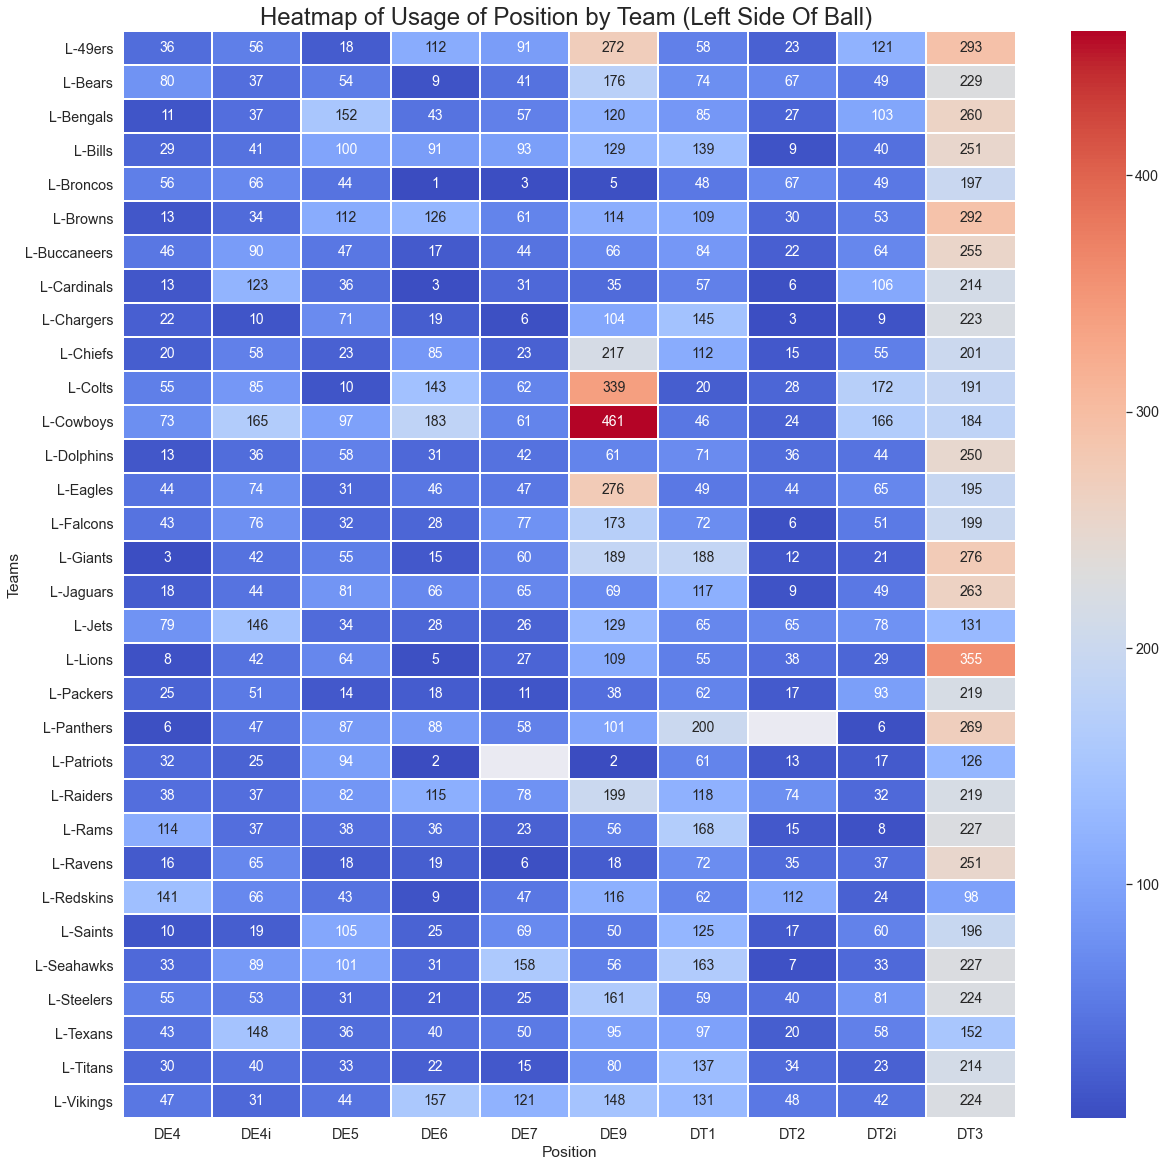

In [133]:
# Defensive Team's Use Rate of Position lined up on the Left Side
# How would you convert it to a percent?
DL3_groupby = DL3.groupby(['SideOfBall','PosTechnique','DefensiveTeam'])['PosTechnique'].count().unstack(level=1)
DL3_groupby
plt.figure(figsize=(20,20))
sns.set(font_scale=1.3)
ax = sns.heatmap(DL3_groupby,cmap='coolwarm',linecolor='white',linewidths=1,annot=True,fmt='g',annot_kws={"size": 14})
ax.set(xlabel='Position', ylabel='Teams')
ax.axes.set_title("Heatmap of Usage of Position by Team (Left Side Of Ball) ", fontsize=24, y=1.01)


Text(0.5, 1.01, 'Heatmap of Usage of Position by Team (Right Side Of Ball) ')

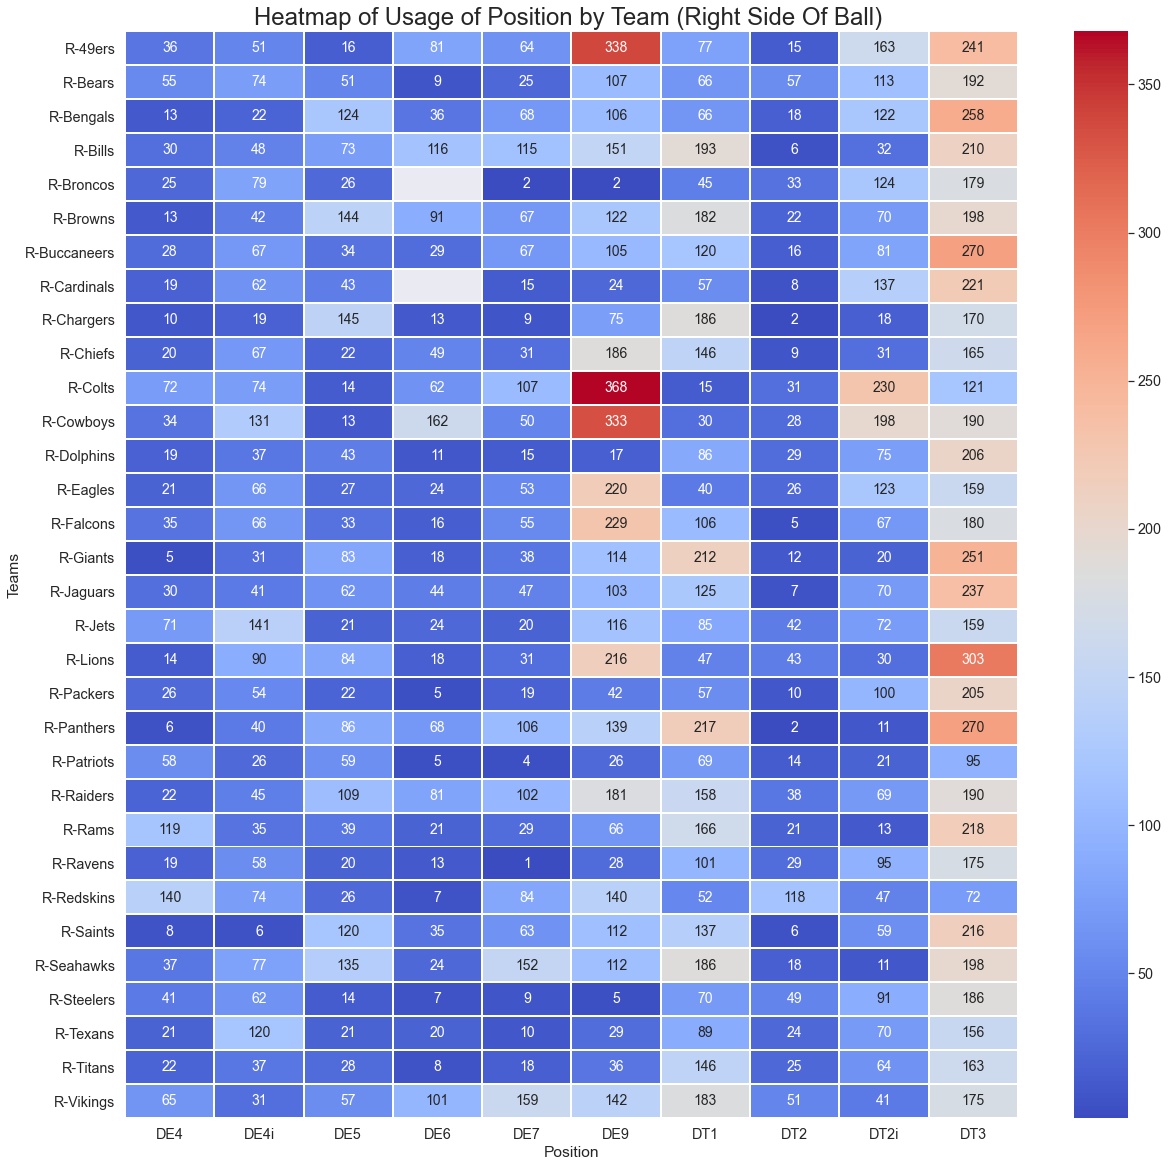

In [134]:
# Creation of DataFrame with only right side of the ball
DL4 = DL2[DL2.SideOfBall == 'R']

# Defensive Team's Use Rate of Position lined up on the Left Side
# How would you convert it to a percent?
DL4_groupby = DL4.groupby(['SideOfBall','PosTechnique','DefensiveTeam'])['PosTechnique'].count().unstack(level=1)
DL4_groupby
plt.figure(figsize=(20,20))
sns.set(font_scale=1.3)
ax = sns.heatmap(DL4_groupby,cmap='coolwarm',linecolor='white',linewidths=1,annot=True,fmt='g',annot_kws={"size": 14})
ax.set(xlabel='Position', ylabel='Teams')
ax.axes.set_title("Heatmap of Usage of Position by Team (Right Side Of Ball) ", fontsize=24, y=1.01)


Text(0.5, 1.01, 'Heatmap of EPA by Position and Team ')

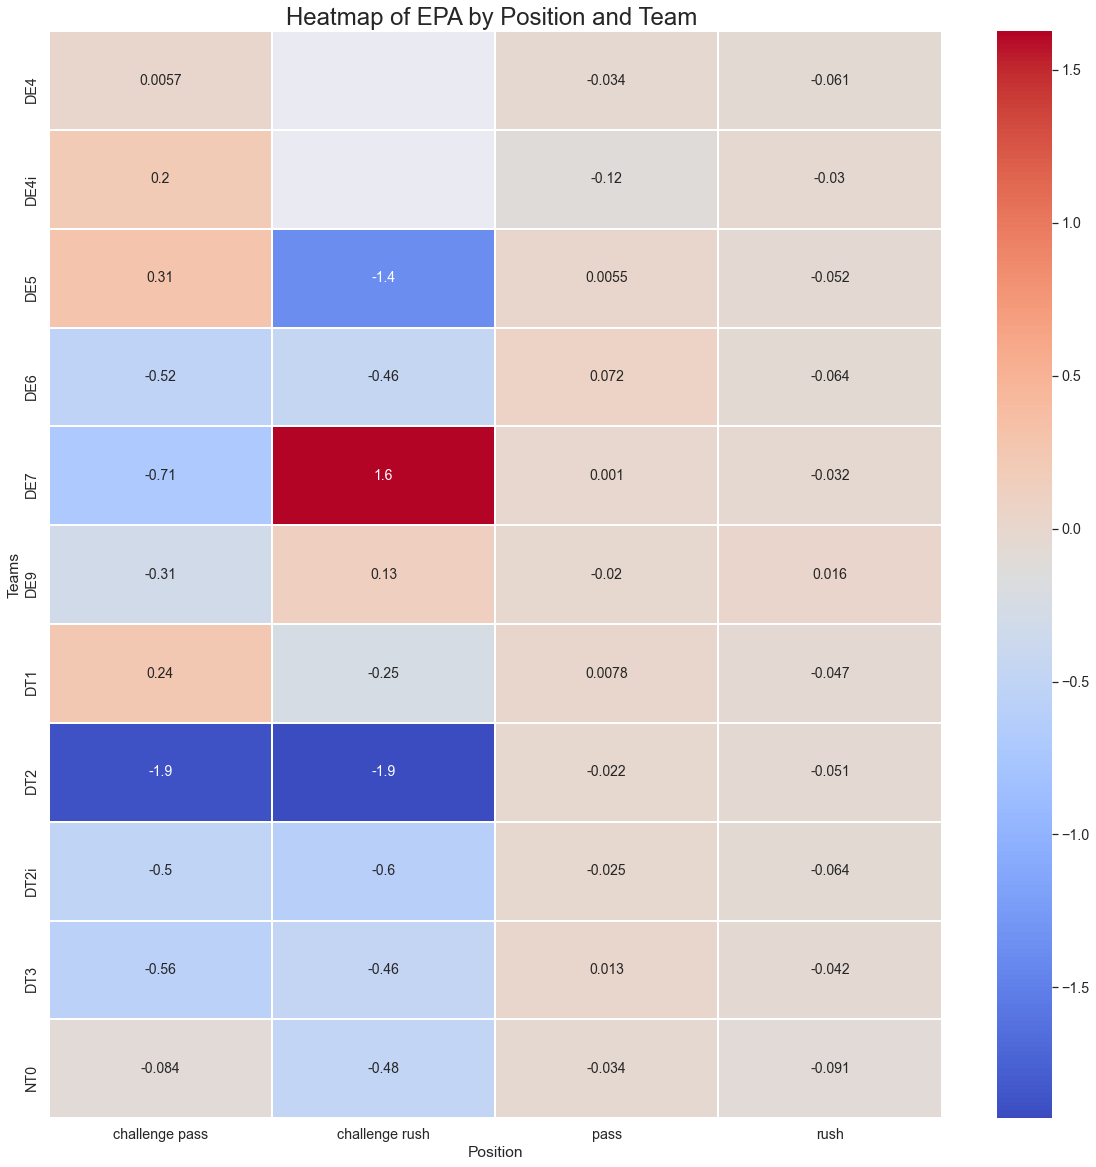

In [135]:
pivot_DL = DL.pivot_table(values='EPA',index='PosTechnique',columns='EventType')
plt.figure(figsize=(20,20))
sns.set(font_scale=1.3)
ax = sns.heatmap(pivot_DL,cmap='coolwarm',linecolor='white',linewidths=1,annot=True,fmt='.2g',annot_kws={"size": 14})
ax.set(xlabel='Position', ylabel='Teams')
ax.axes.set_title("Heatmap of EPA by Position and Team ", fontsize=24, y=1.01)

Text(0.5, 1.01, 'Heatmap of EPA by Position and Team ')

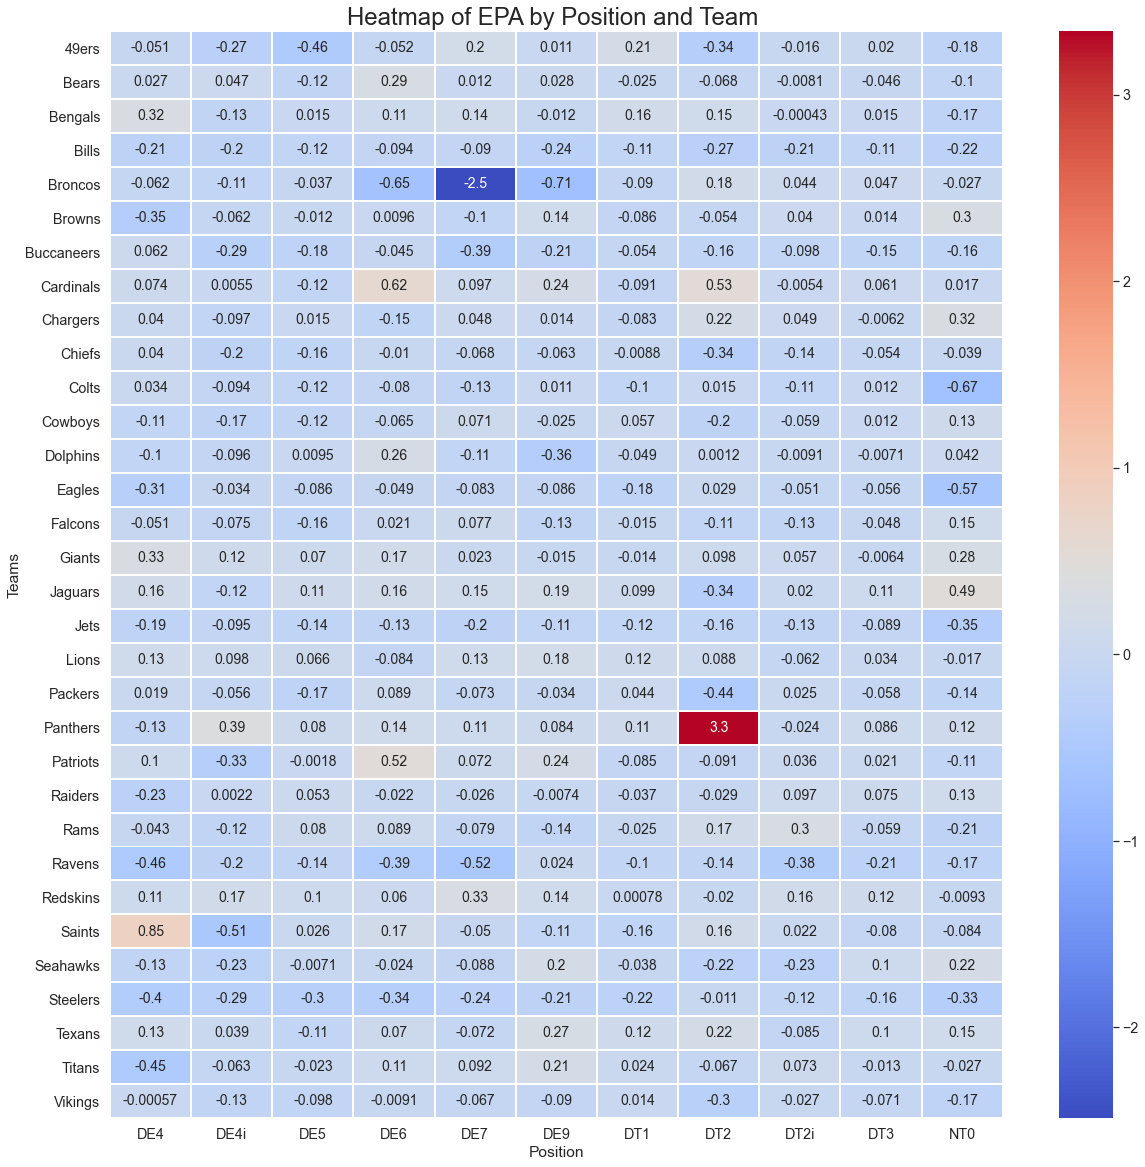

In [136]:
pivot_DL = DL.pivot_table(values='EPA',index='DefensiveTeam',columns='PosTechnique')
plt.figure(figsize=(20,20))
sns.set(font_scale=1.3)
ax = sns.heatmap(pivot_DL,cmap='coolwarm',linecolor='white',linewidths=1,annot=True,fmt='.2g',annot_kws={"size": 14})
ax.set(xlabel='Position', ylabel='Teams')
ax.axes.set_title("Heatmap of EPA by Position and Team ", fontsize=24, y=1.01)


Text(0.5, 1.01, 'Heatmap of EPA by Position and Side Of Ball ')

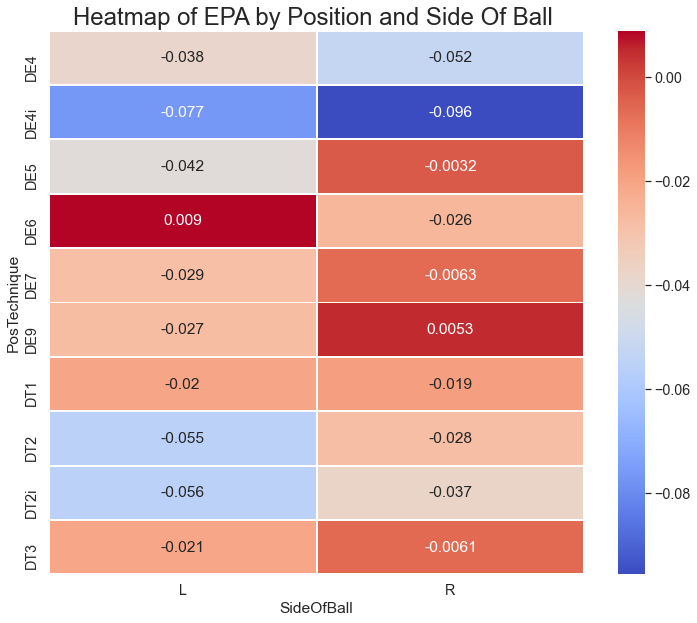

In [137]:
# An assumption is that those lined up on the right side of the ball
# will have the ability to blind side the right handed QB's 
pivot_DL = DL2.pivot_table(values='EPA',index='PosTechnique',columns='SideOfBall')
plt.figure(figsize=(12,10))
ax = sns.heatmap(pivot_DL,cmap='coolwarm',linecolor='white',linewidths=1,annot=True)
ax.axes.set_title("Heatmap of EPA by Position and Side Of Ball ", fontsize=24, y=1.01)


In [138]:
DL['PosTechnique'].value_counts()

DT3     13334
DE9      8154
DT1      6564
DT2i     4306
DE4i     3843
DE5      3639
DE7      3213
DE6      2832
NT0      2462
DE4      2386
DT2      1777
Name: PosTechnique, dtype: int64

In [139]:
# 3))))) Question Situational Change Based on the handedness of the QB
# We should align our best DL on his blind side (On the left side for Tua and
# the right side for everyone else)
# How do you sort group by results / change SalaryAvgHalf from exponential form
DL_groupby = DL[['PosTechnique','EPA','SalaryAvgHalf']].groupby('PosTechnique')
#DL_groupby = DL[['Name','EPA','SalaryAvgHalf']].groupby('Name')
DL_groupby.mean().nsmallest(10,'EPA')


EPA  SalaryAvgHalf
PosTechnique                         
DE4i         -0.085986   2.106185e+06
NT0          -0.057556   1.805350e+06
DT2i         -0.045146   1.555882e+06
DE4          -0.045013   2.484123e+06
DT2          -0.042908   1.883461e+06
DE5          -0.022789   2.447624e+06
DT1          -0.019506   1.632133e+06
DE7          -0.017208   2.755222e+06
DT3          -0.013956   2.192149e+06
DE9          -0.011447   3.212941e+06

In [140]:
DL.groupby('Name')['SoloSack','SoloTackle'].sum().nlargest(10,['SoloSack','SoloTackle'])

/Users/KyleVanderMeulen/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.


SoloSack  SoloTackle
Name                                   
Maxx Crosby               7          19
Chris Jones               7          13
Michael Bennett           6          38
Danielle Hunter           6          17
Justin Houston            6          13
Aaron Donald              6          11
Jason Pierre-Paul         6          11
T.J. Watt                 6           8
Carlos Dunlap             5          20
Robert Quinn              5          16

In [141]:
#DL.groupby('Name')['EPA','Turnover'].sum().nsmallest(10,['EPA','Turnover'])
DL.groupby('PosTechnique')['EPA'].sum()

PosTechnique
DE4    -107.401815
DE4i   -330.445638
DE5     -82.930842
DE6     -15.918307
DE7     -55.289378
DE9     -93.342164
DT1    -128.034877
DT2     -76.247707
DT2i   -194.400795
DT3    -186.094564
NT0    -141.701770
Name: EPA, dtype: float64

## Linear Regression

In [142]:
#DL.to_csv(r'C:\Users\KyleVanderMeulen\Desktop\DL.csv', index=False, header=True)

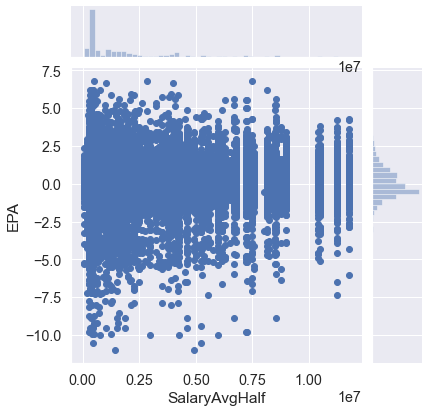

In [143]:
sns.jointplot(x='SalaryAvgHalf',y='EPA',data=DL,kind='scatter')

In [144]:
DL.columns

Index(['GameID', 'EventID', 'Season', 'Week', 'StadiumName', 'OffensiveTeam',
       'DefensiveTeam', 'OffTeamScoreBefore', 'DefTeamScoreBefore', 'Quarter',
       'TimeLeft', 'Down', 'ToGo', 'SideOfField', 'StartYard', 'EventType',
       'FirstDown', 'Touchdown', 'Safety', 'Turnover', 'OffensiveYardage',
       'EPA', 'PlayDesc', 'PlayerId', 'Name', 'RosterPosition',
       'OnFieldPosition', 'SideOfBall', 'TechniqueName', 'IsRushing',
       'SoloTackle', 'AssistedTackle', 'Pressure', 'SoloSack', 'AssistedSack',
       'PassBreakup', 'Interception', 'ForcedFumble', 'RecoveredFumble',
       'SalaryAvgFull', 'SalaryAvgHalf', 'PosTechnique'],
      dtype='object')

In [145]:
# Is the x axis displaying the frequency or something else?
# How to get the sum of sacks as the x axis?
DL.groupby('PosTechnique')['SoloSack'].sum().nlargest(15)

PosTechnique
DE9     112
DT3      69
DE4i     30
DE5      20
DE4      17
DT1      16
DE7      14
DE6      11
DT2      11
DT2i     11
NT0      10
Name: SoloSack, dtype: int64

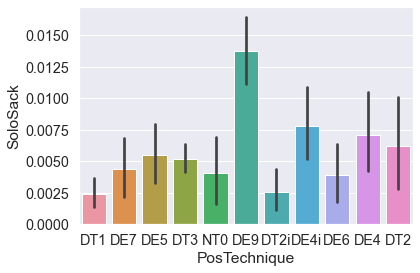

In [146]:
sns.barplot(x='PosTechnique',y='SoloSack',data=DL)

In [147]:
# How to get the sum of tackles as the x axis?
DL.groupby('PosTechnique')['SoloTackle'].sum().nlargest(15)

PosTechnique
DT3     461
DE9     275
DT1     221
DT2i    141
DE5     138
DE6     124
DE7     116
DE4i    111
NT0      89
DE4      85
DT2      65
Name: SoloTackle, dtype: int64

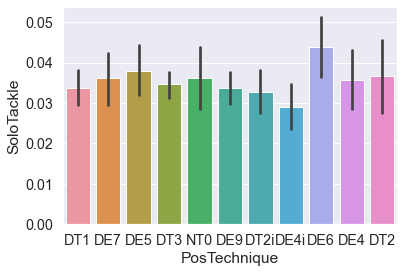

In [148]:
sns.barplot(x='PosTechnique',y='SoloTackle',data=DL)

In [149]:
DL.groupby('PosTechnique')['ForcedFumble'].sum().nlargest(15)

PosTechnique
DE9     26
DE7      7
DE5      5
DT3      5
DT1      4
DE4i     3
DE6      3
DE4      2
DT2      1
DT2i     1
NT0      1
Name: ForcedFumble, dtype: int64

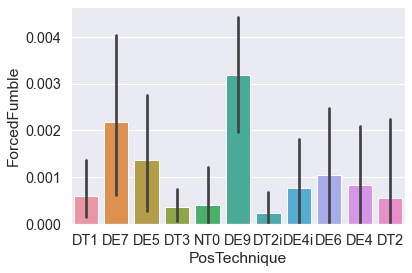

In [150]:
sns.barplot(x='PosTechnique',y='ForcedFumble',data=DL)

In [151]:
DL.groupby('PosTechnique')['Turnover'].sum().nlargest(15)

PosTechnique
DT3     222
DE9     180
DT1     108
DE4i    104
DE5      72
DT2i     72
DE7      56
NT0      52
DE4      50
DE6      40
DT2      28
Name: Turnover, dtype: int64

In [152]:
# If one of these positions was on the field what frequency did a turnover happen
#sns.barplot(x='PosTechnique',y='Turnover',data=DL,order=[
    #'DE4i','DE9','NT0','DE4','DE5','DE7','DT2i','DT3','DT1',
    #'DT2','DE6'])

In [153]:
DL_groupby3 = DL[['PosTechnique','Turnover']].groupby('PosTechnique')
DL_groupby3.mean().sort_values(by='Turnover',ascending=False)

Turnover
PosTechnique          
DE4i          0.027062
DE9           0.022075
NT0           0.021121
DE4           0.020956
DE5           0.019786
DE7           0.017429
DT2i          0.016721
DT3           0.016649
DT1           0.016453
DT2           0.015757
DE6           0.014124

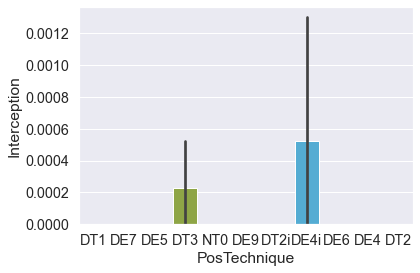

In [154]:
sns.barplot(x='PosTechnique',y='Interception',data=DL)

In [155]:
DL[DL['Interception']==1]['PosTechnique']

15490    DE4i
21852     DT3
26103    DE4i
31913     DT3
35120     DT3
Name: PosTechnique, dtype: object

In [156]:
# 2  Reassigned Challenge Event Types to be rush or pass 
DL.loc[DL['EventType']=='challenge pass','EventType'] = 'pass'
DL.loc[DL['EventType']=='challenge rush','EventType'] = 'rush'

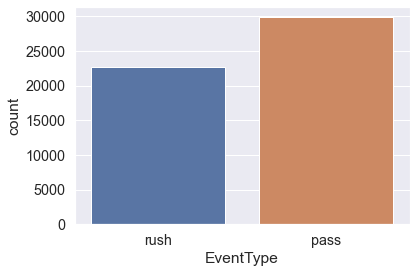

In [157]:
sns.countplot(x='EventType',data=DL)

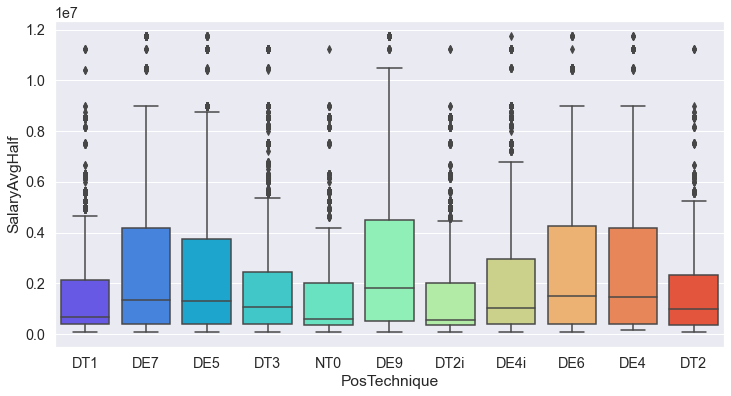

In [158]:
plt.figure(figsize=(12,6))
sns.boxplot(x="PosTechnique", y="SalaryAvgHalf", data=DL,palette='rainbow')

In [159]:
DL.loc[15490]


GameID                                                             2670
EventID                                                             200
Season                                                             2019
Week                                                                 11
StadiumName                                              Estadio Azteca
OffensiveTeam                                                  Chargers
DefensiveTeam                                                    Chiefs
OffTeamScoreBefore                                                    3
DefTeamScoreBefore                                                    0
Quarter                                                               2
TimeLeft                                                            814
Down                                                                  2
ToGo                                                                  9
SideOfField                                                     

## End

In [160]:
#SideOfBall = pd.get_dummies(nfl['SideOfBall'],drop_first=True)
#nfl.drop(['SideOfBall'],axis=1,inplace=True)
#nfl = pd.concat([nfl,SideOfBall],axis=1)
# nfl.rename(columns = {'R':'SideOfBall_R'}, inplace = True) 

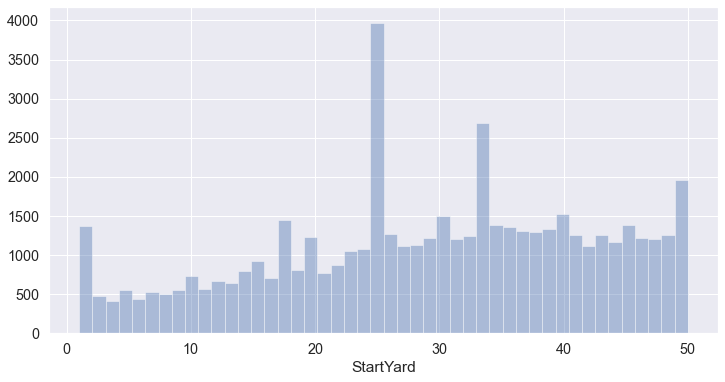

In [161]:
plt.figure(figsize=(12,6))
sns.distplot(DL['StartYard'],kde=False)

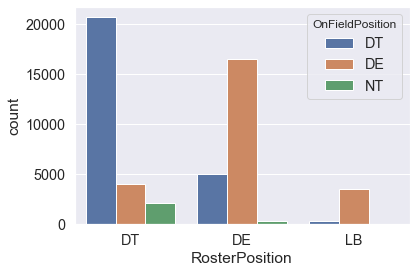

In [162]:
sns.countplot(x='RosterPosition',data=DL,hue='OnFieldPosition')

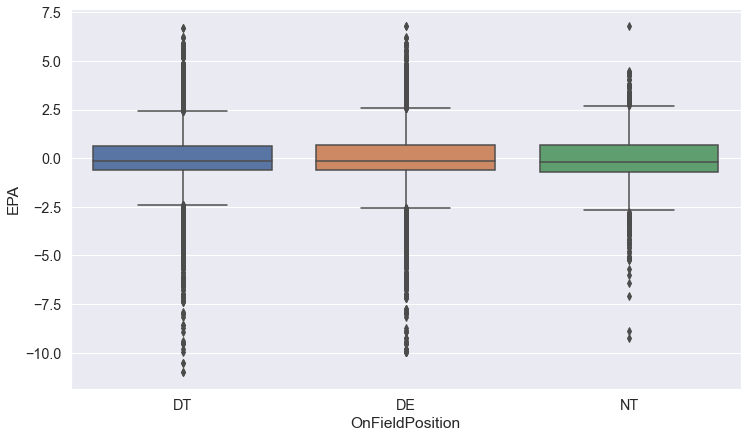

In [163]:
plt.figure(figsize=(12,7))
sns.boxplot(x='OnFieldPosition',y='EPA',data=DL)

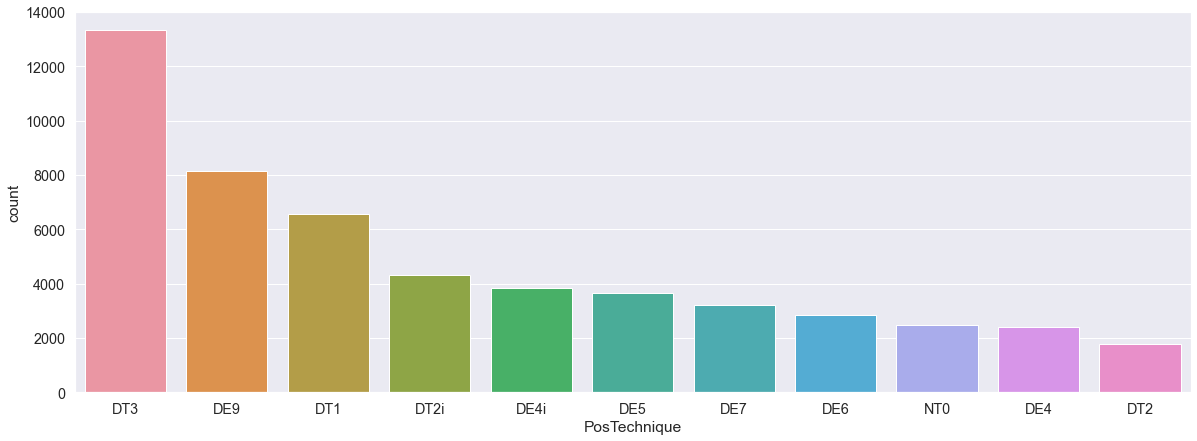

In [164]:
plt.figure(figsize=(20,7))
sns.countplot(DL['PosTechnique'],order=DL.PosTechnique.value_counts().iloc[:40].index)

In [165]:
#LB = nfl[nfl['OnFieldPosition']=='LB']
#LB['RosterPosition'].value_counts()


In [166]:
#plt.figure(figsize=(20,10))
#sns.boxplot(x="PosTechnique", y="EPA", hue="EventType",data=DL, palette="coolwarm")

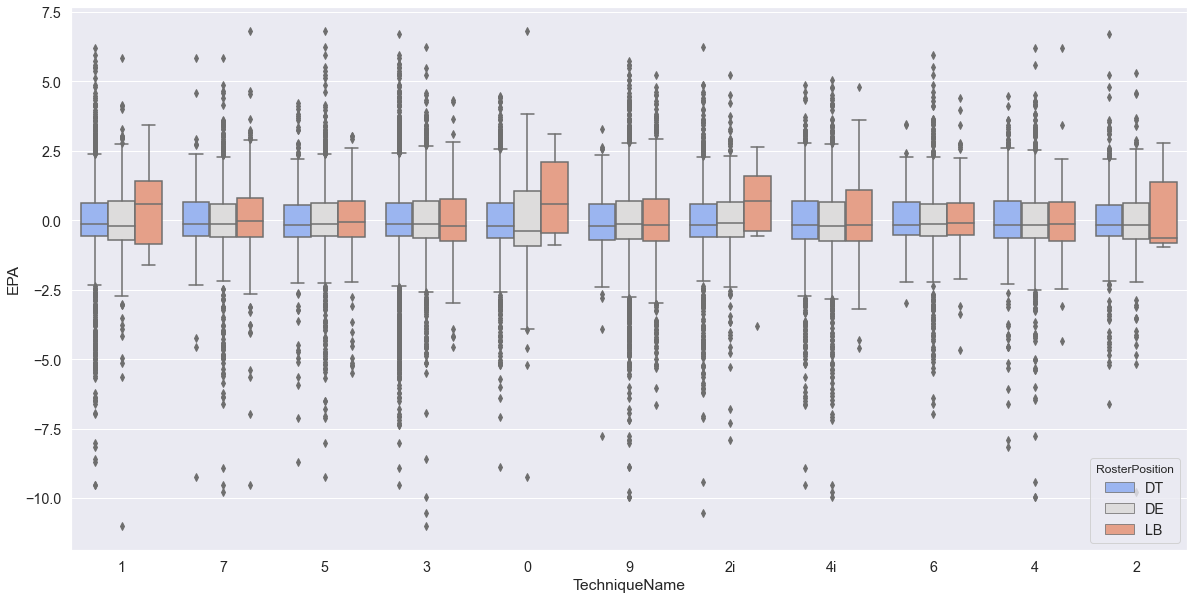

In [167]:
plt.figure(figsize=(20,10))
sns.boxplot(x="TechniqueName", y="EPA", hue="RosterPosition",data=DL, palette="coolwarm")

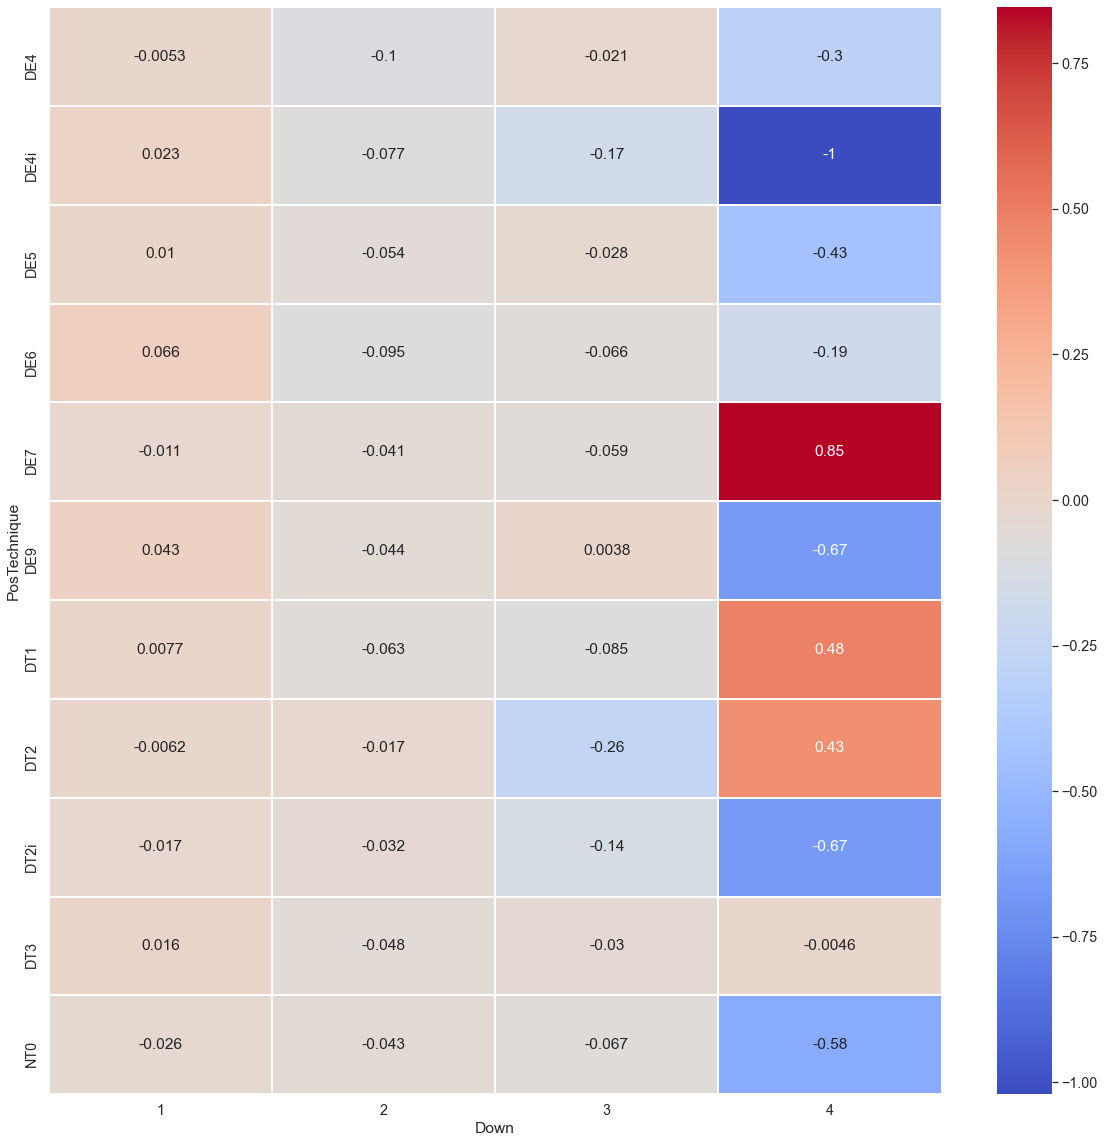

In [168]:
pivot_DL_Down = DL.pivot_table(values='EPA',index='PosTechnique',columns='Down')
plt.figure(figsize=(20,20))
sns.heatmap(pivot_DL_Down,cmap='coolwarm',linecolor='white',linewidths=1,annot=True)

In [169]:
DL.columns

Index(['GameID', 'EventID', 'Season', 'Week', 'StadiumName', 'OffensiveTeam',
       'DefensiveTeam', 'OffTeamScoreBefore', 'DefTeamScoreBefore', 'Quarter',
       'TimeLeft', 'Down', 'ToGo', 'SideOfField', 'StartYard', 'EventType',
       'FirstDown', 'Touchdown', 'Safety', 'Turnover', 'OffensiveYardage',
       'EPA', 'PlayDesc', 'PlayerId', 'Name', 'RosterPosition',
       'OnFieldPosition', 'SideOfBall', 'TechniqueName', 'IsRushing',
       'SoloTackle', 'AssistedTackle', 'Pressure', 'SoloSack', 'AssistedSack',
       'PassBreakup', 'Interception', 'ForcedFumble', 'RecoveredFumble',
       'SalaryAvgFull', 'SalaryAvgHalf', 'PosTechnique'],
      dtype='object')

In [170]:
nfl.columns

Index(['GameID', 'EventID', 'Season', 'Week', 'StadiumName', 'OffensiveTeam',
       'DefensiveTeam', 'OffTeamScoreBefore', 'DefTeamScoreBefore', 'Quarter',
       'TimeLeft', 'Down', 'ToGo', 'SideOfField', 'StartYard', 'EventType',
       'FirstDown', 'Touchdown', 'Safety', 'Turnover', 'RunDirection',
       'UsedDesignedGap', 'Attempt', 'Completion', 'Spike', 'ThrowDepth',
       'PressureOnPlay', 'SackOnPlay', 'PassBreakupOnPlay',
       'InterceptionOnPlay', 'FumbleByPasser', 'FumbleByRusher',
       'FumbleByReceiver', 'OffensiveYardage', 'EPA', 'PlayDesc', 'PlayerId',
       'Name', 'RosterPosition', 'OnFieldPosition', 'SideOfBall',
       'TechniqueName', 'IsRushing', 'SoloTackle', 'AssistedTackle',
       'Pressure', 'SoloSack', 'AssistedSack', 'PassBreakup', 'Interception',
       'ForcedFumble', 'RecoveredFumble'],
      dtype='object')

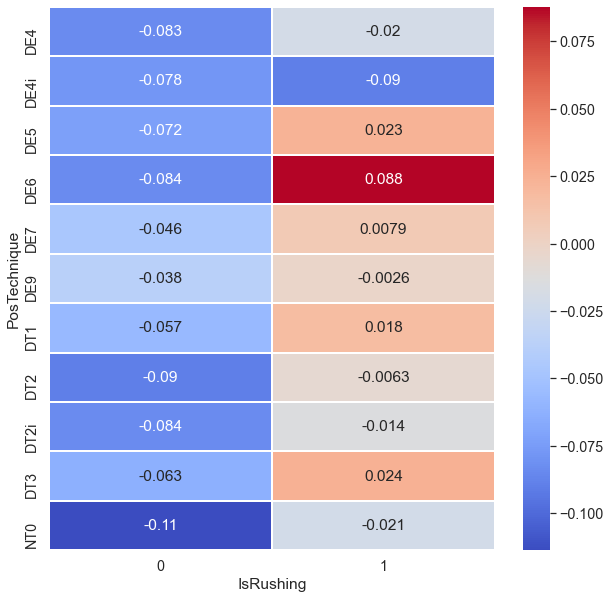

In [171]:
pivot_DL_Rushing = DL.pivot_table(values='EPA',index='PosTechnique',columns='IsRushing')
plt.figure(figsize=(10,10))
sns.heatmap(pivot_DL_Rushing,cmap='coolwarm',linecolor='white',linewidths=1,annot=True)

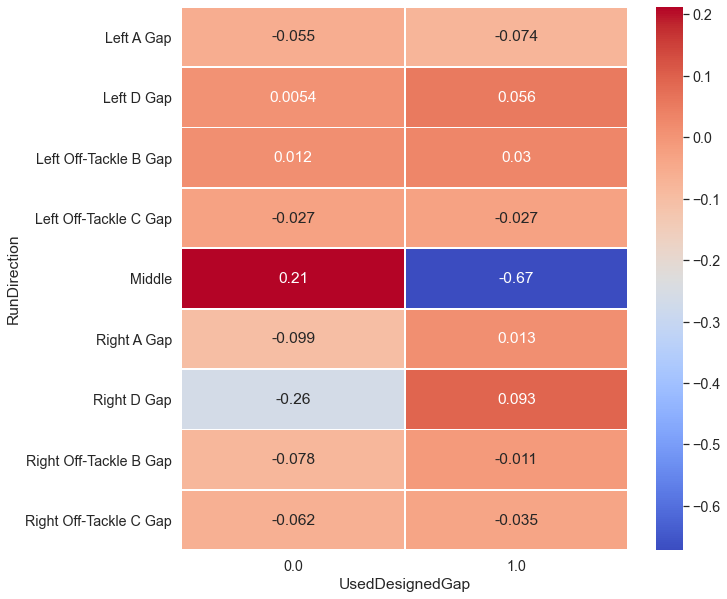

In [172]:
pivot_nfl_Rushing = nfl.pivot_table(values='EPA',index='RunDirection',columns='UsedDesignedGap')
plt.figure(figsize=(10,10))
sns.heatmap(pivot_nfl_Rushing,cmap='coolwarm',linecolor='white',linewidths=1,annot=True)

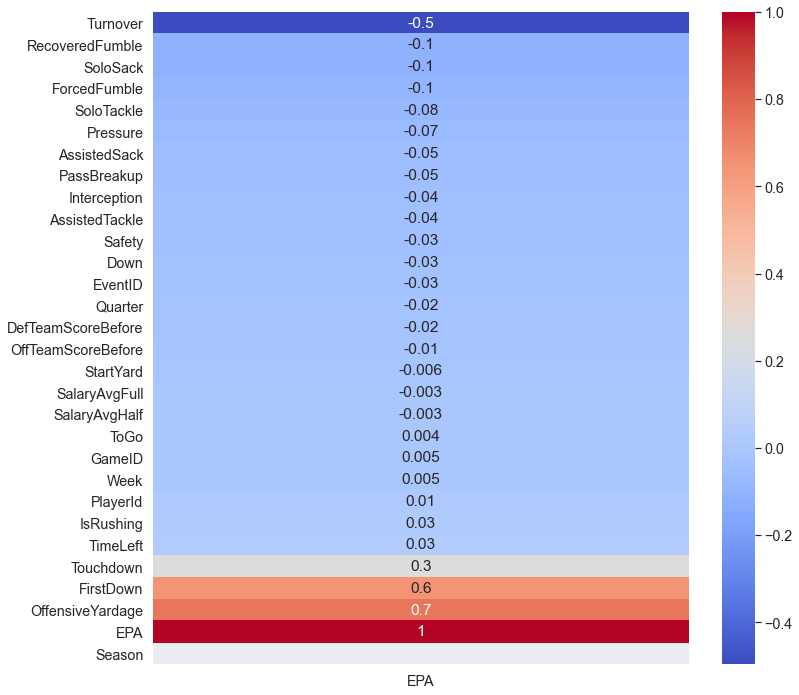

In [173]:
DL_corr = DL.corr()
x = DL_corr[['EPA']]
plt.figure(figsize=(12,12))
sns.heatmap(DL_corr[['EPA']].sort_values(by=['EPA'],ascending=True),cmap='coolwarm',annot=True,fmt='.1g')
cmap = cmap=sns.diverging_palette(5, 250, as_cmap=True)




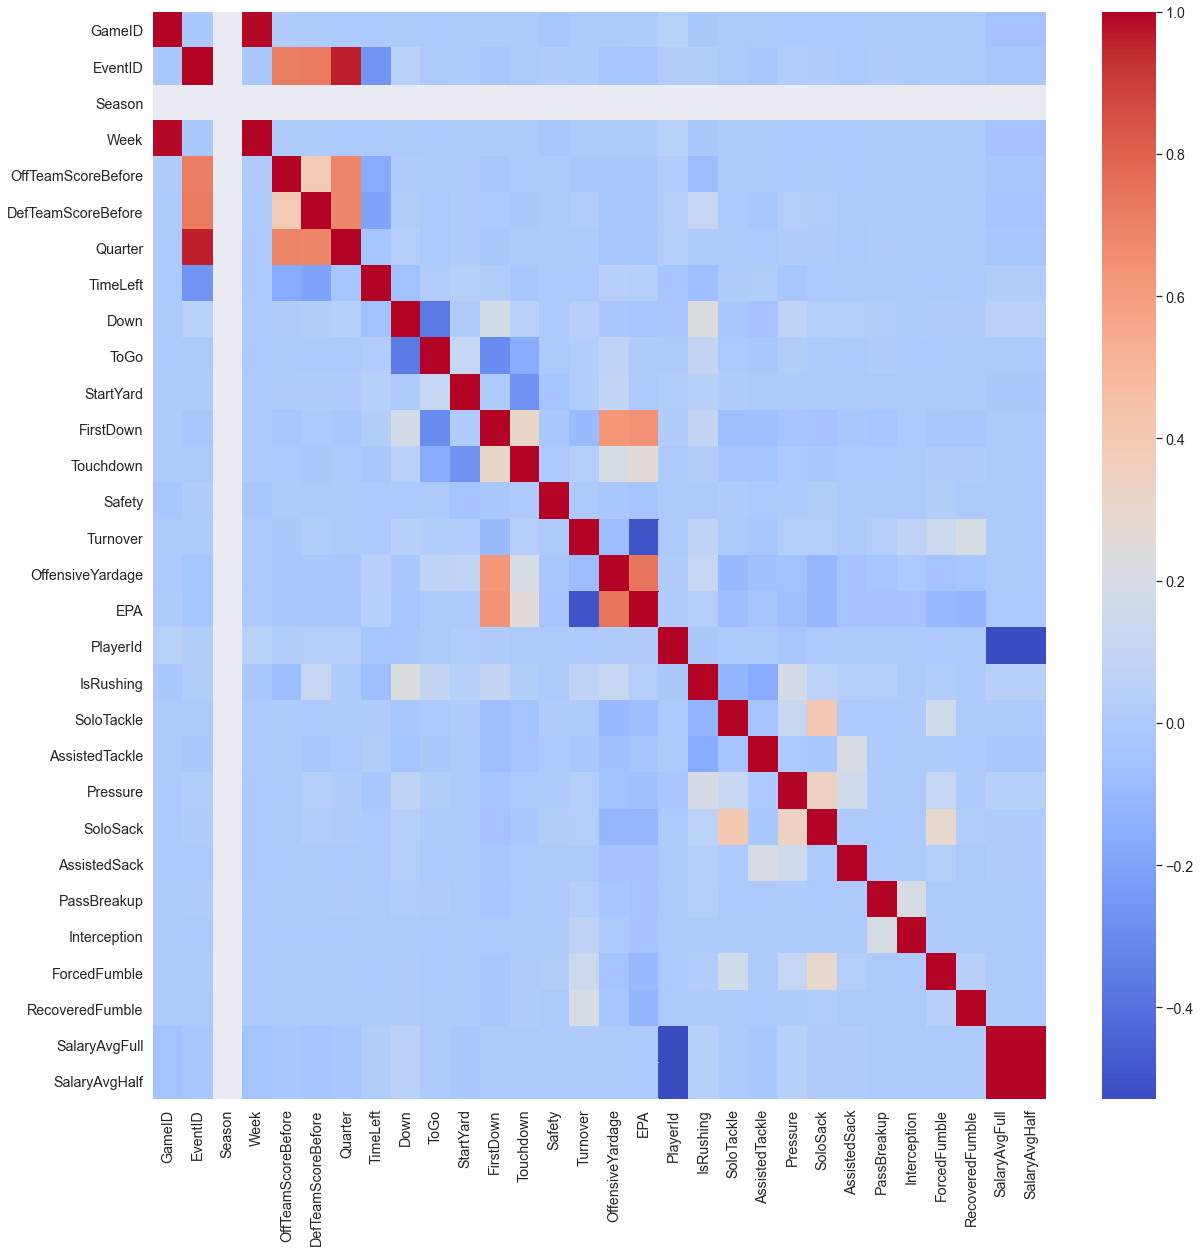

In [174]:
plt.figure(figsize=(20,20))
sns.heatmap(DL.corr(),cmap='coolwarm',fmt='.1g')
cmap = cmap=sns.diverging_palette(5, 250, as_cmap=True)

In [175]:
# Creation of ScoreDifferential Variable
DL['ScoreDifferential'] = DL['DefTeamScoreBefore'] - DL['OffTeamScoreBefore']

In [176]:
DL['ScoreDifferential'].value_counts()

 0     9711
 7     4487
-7     3566
 3     3416
-3     2607
       ... 
-36      40
-35      38
-26      22
 36      20
-19      15
Name: ScoreDifferential, Length: 72, dtype: int64

In [177]:
DL['TimeLeftGame'] = DL['TimeLeft'] * 4

In [178]:
DL.head()


GameID  EventID  Season  Week         StadiumName OffensiveTeam  \
0    2630       10    2019     9  State Farm Stadium     Cardinals   
1    2630       10    2019     9  State Farm Stadium     Cardinals   
2    2630       10    2019     9  State Farm Stadium     Cardinals   
3    2630       10    2019     9  State Farm Stadium     Cardinals   
4    2630       15    2019     9  State Farm Stadium     Cardinals   

  DefensiveTeam  OffTeamScoreBefore  DefTeamScoreBefore  Quarter  ...  \
0         49ers                   0                   0        1  ...   
1         49ers                   0                   0        1  ...   
2         49ers                   0                   0        1  ...   
3         49ers                   0                   0        1  ...   
4         49ers                   0                   0        1  ...   

   AssistedSack  PassBreakup  Interception ForcedFumble  RecoveredFumble  \
0             0            0             0            0                0   
1             0            0             0            0                0   
2             0            0             0            0                0   
3             0            0             0            0                0   
4             0            0             0            0                0   

  SalaryAvgFull  SalaryAvgHalf  PosTechnique  ScoreDifferential  TimeLeftGame  
0        636964       318482.0           DT1                  0          3576  
1       2460658      1230329.0           DE7                  0          3576  
2       4547749      2273874.5           DT1                  0          3576  
3       8387966      4193983.0           DE5                  0          3576  
4        636964       318482.0           DT1                  0          3448  

[5 rows x 44 columns]

<Figure size 1440x1440 with 0 Axes>

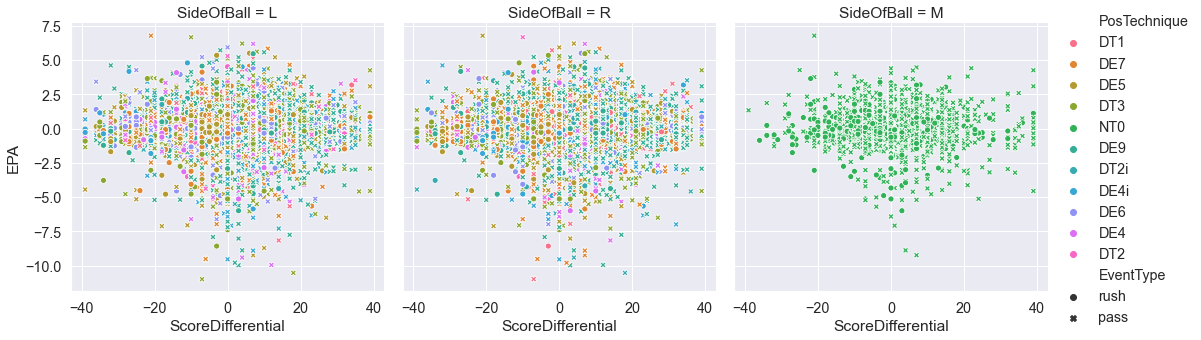

In [179]:
plt.figure(figsize=(20,20))
sns.relplot(x="ScoreDifferential", y="EPA", col="SideOfBall",
            hue="PosTechnique", style="EventType",
            data=DL)

<Figure size 1440x1440 with 0 Axes>

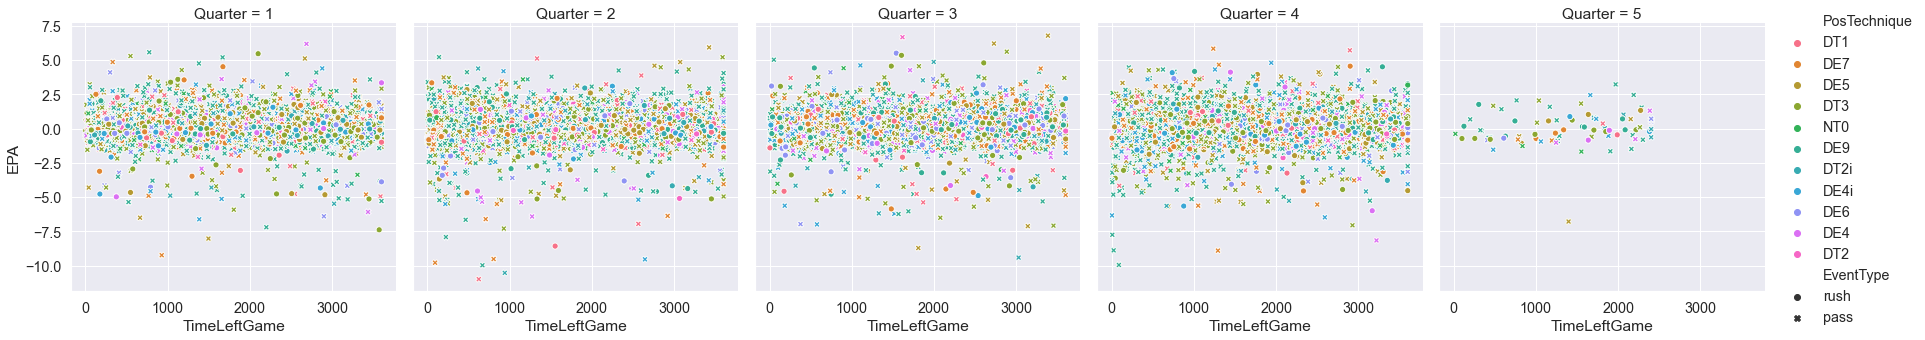

In [180]:
plt.figure(figsize=(20,20))
sns.relplot(x="TimeLeftGame", y="EPA", col="Quarter",
            hue="PosTechnique", style="EventType",
            data=DL)

In [181]:
DL['OnFieldPosition'].value_counts()

DT    25981
DE    24067
NT     2462
Name: OnFieldPosition, dtype: int64

In [182]:
DL['Name_Position'] = DL['Name'].str.cat(DL['RosterPosition'],sep=" ")


In [183]:
DL.head()

GameID  EventID  Season  Week         StadiumName OffensiveTeam  \
0    2630       10    2019     9  State Farm Stadium     Cardinals   
1    2630       10    2019     9  State Farm Stadium     Cardinals   
2    2630       10    2019     9  State Farm Stadium     Cardinals   
3    2630       10    2019     9  State Farm Stadium     Cardinals   
4    2630       15    2019     9  State Farm Stadium     Cardinals   

  DefensiveTeam  OffTeamScoreBefore  DefTeamScoreBefore  Quarter  ...  \
0         49ers                   0                   0        1  ...   
1         49ers                   0                   0        1  ...   
2         49ers                   0                   0        1  ...   
3         49ers                   0                   0        1  ...   
4         49ers                   0                   0        1  ...   

   PassBreakup  Interception  ForcedFumble RecoveredFumble  SalaryAvgFull  \
0            0             0             0               0         636964   
1            0             0             0               0        2460658   
2            0             0             0               0        4547749   
3            0             0             0               0        8387966   
4            0             0             0               0         636964   

  SalaryAvgHalf  PosTechnique  ScoreDifferential  TimeLeftGame  \
0      318482.0           DT1                  0          3576   
1     1230329.0           DE7                  0          3576   
2     2273874.5           DT1                  0          3576   
3     4193983.0           DE5                  0          3576   
4      318482.0           DT1                  0          3448   

         Name_Position  
0        D.J. Jones DT  
1     Arik Armstead DE  
2  DeForest Buckner DT  
3         Nick Bosa DE  
4        D.J. Jones DT  

[5 rows x 45 columns]

## Question 1 Most Valuable DL Position

In [184]:
DL['RosterPosition'].value_counts()

DT    26918
DE    21754
LB     3838
Name: RosterPosition, dtype: int64

In [185]:
DL["PosTechnique"] = DL["RosterPosition"] + DL["TechniqueName"].astype(str) 


Text(0.5, 1.08, 'Distribution of Position by Technique')

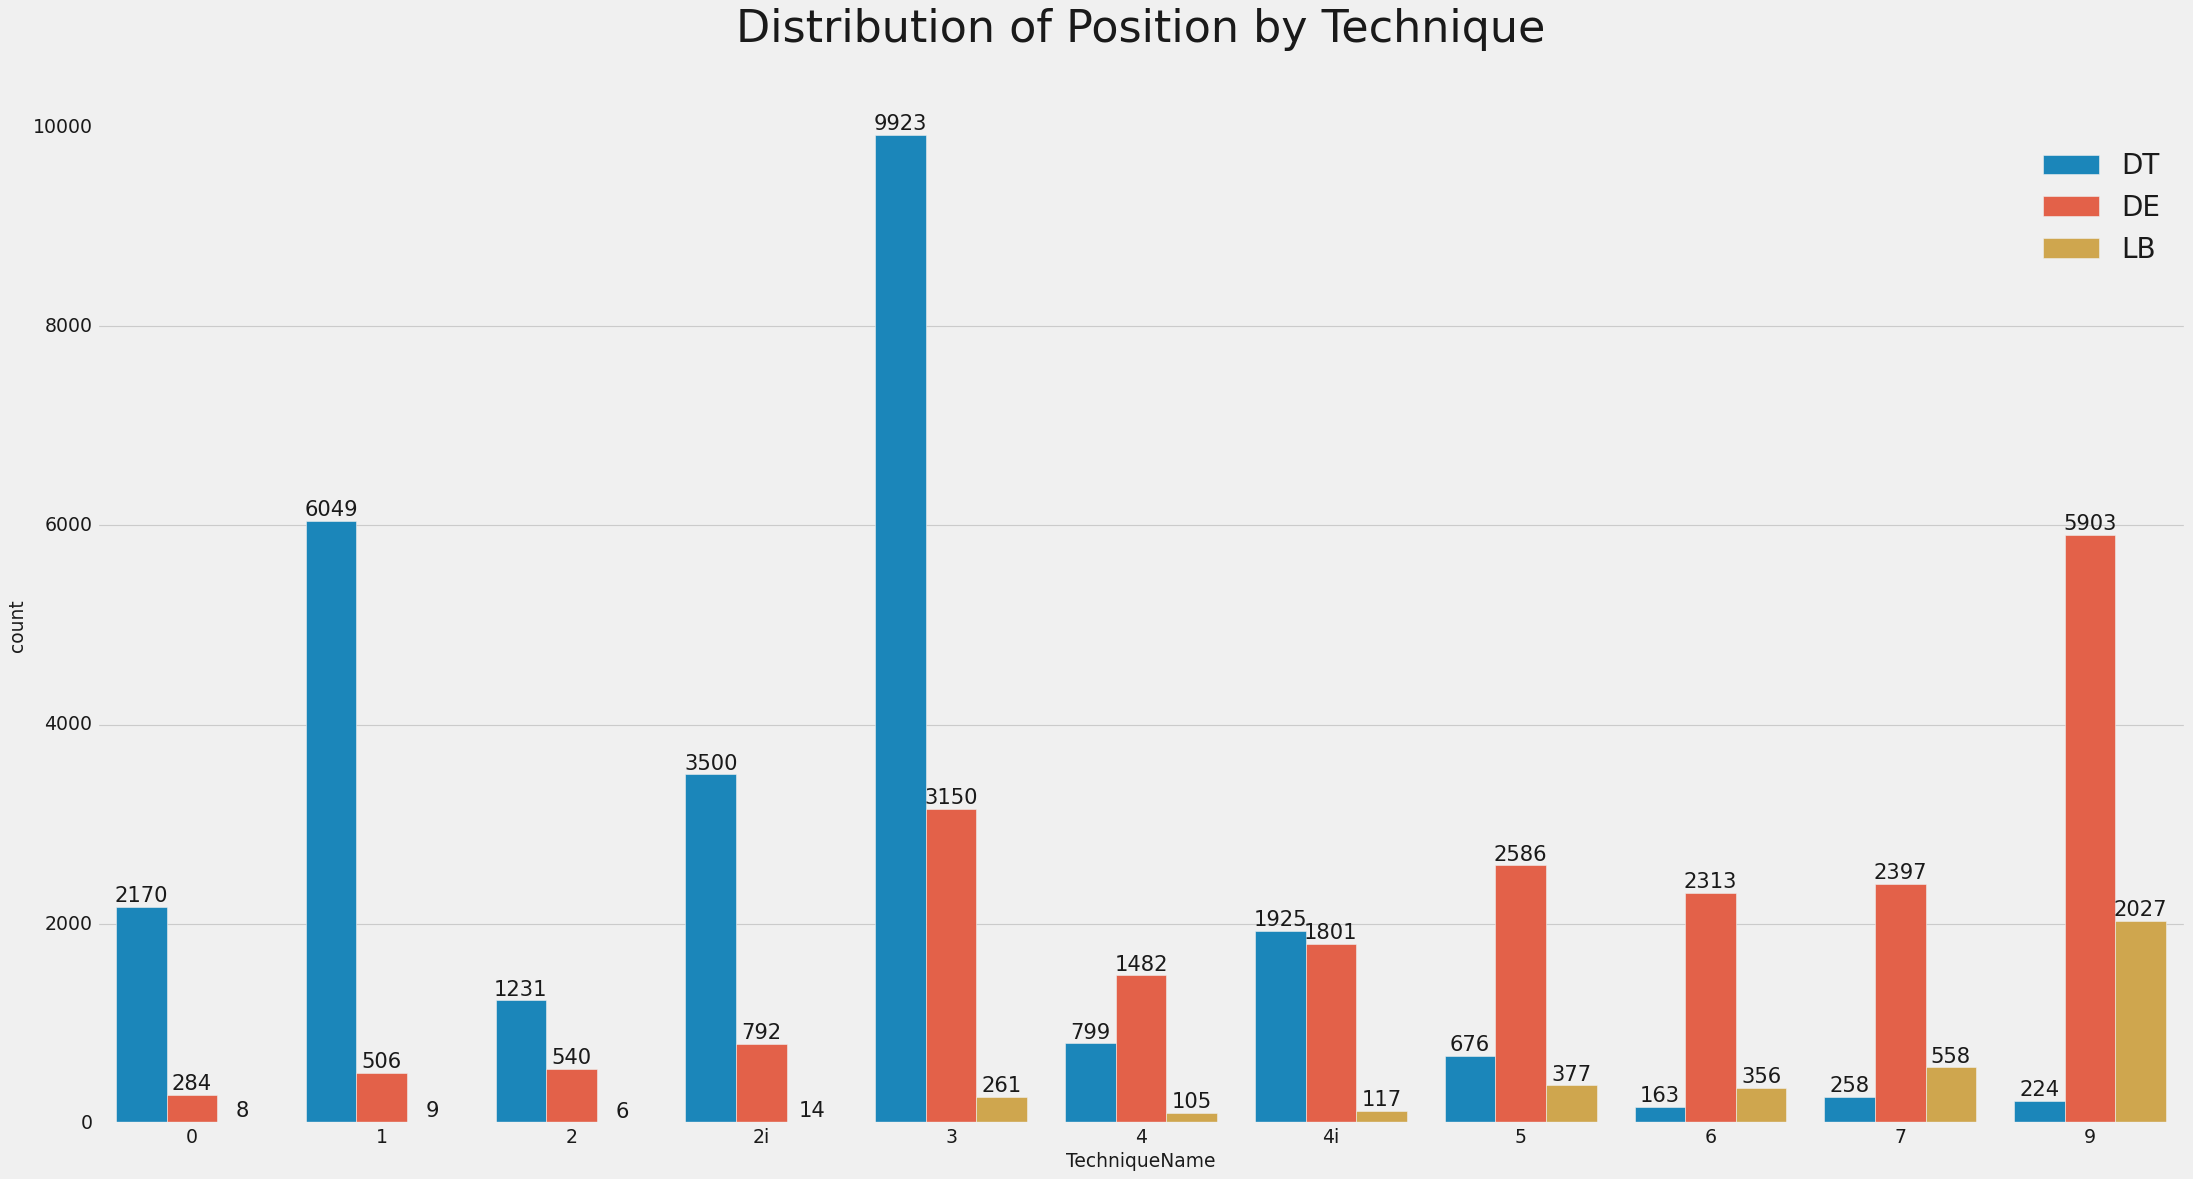

In [232]:
# Distribution of Position by Technique
#plt.style.use('fivethirtyeight')


plt.figure(figsize=(30,15))

cplot = sns.countplot(x='TechniqueName',order=['0','1','2','2i','3','4','4i','5','6','7','9'], hue='RosterPosition',data=DL)


for p in cplot.patches:
    cplot.annotate(format(p.get_height(), '.0f'), 
    (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', 
    xytext = (0, 10), textcoords = 'offset points',size=19)
cplot.legend(loc=1,prop={'size': 25})
cplot.tick_params(axis='x', labelsize=17)
cplot.tick_params(axis='y', labelsize=17)

plt.title('Distribution of Position by Technique',fontsize=40,y=1.08)



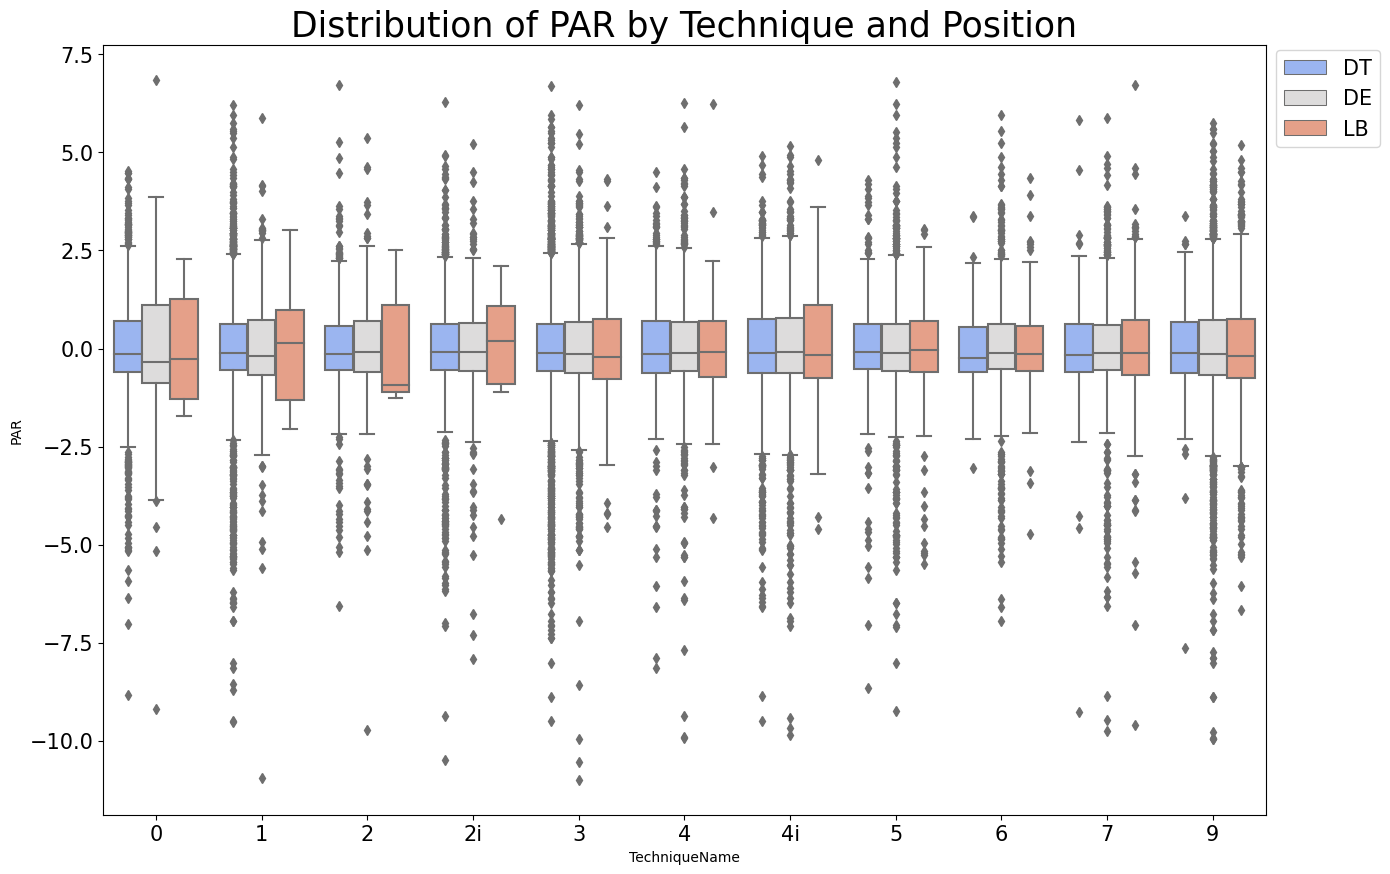

In [273]:
plt.style.use('default')

plt.figure(figsize=(15,10))
ax = sns.boxplot(x="TechniqueName", y="PAR", hue="RosterPosition",
            order=['0','1','2','2i','3','4','4i','5','6','7','9'],data=DL, palette="coolwarm")
ax.legend(loc='center left', bbox_to_anchor=(1, 0.93),prop={'size': 15})
plt.title('Distribution of PAR by Technique and Position',fontsize=25)
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=15)

Text(0.5, 63.249999999999986, 'Position')

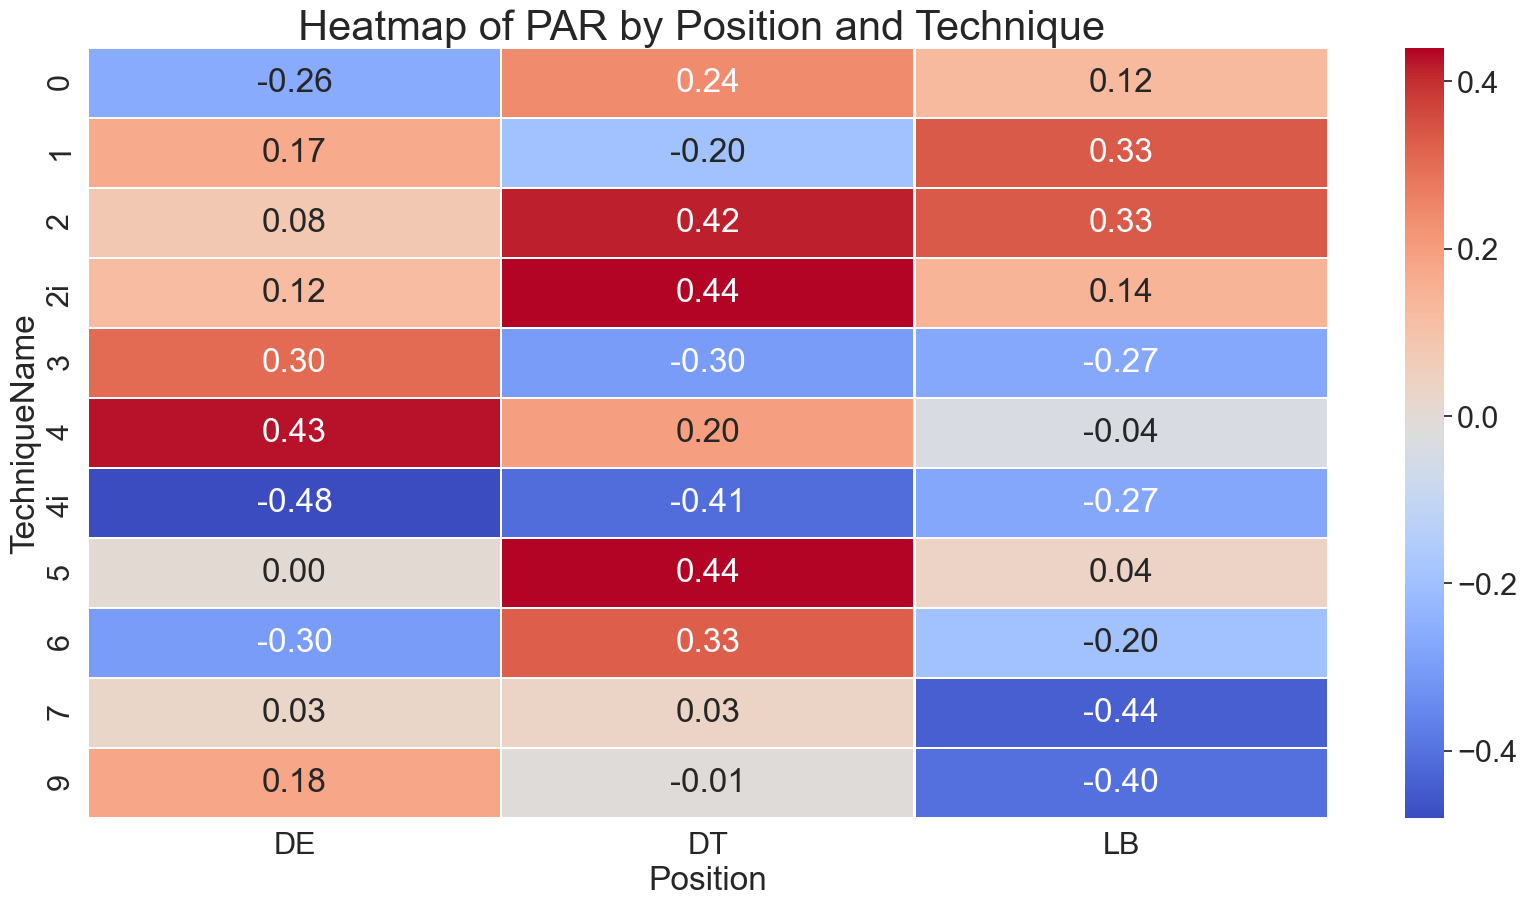

In [274]:
pivot_DL = DL.pivot_table(values='PAR2',index='TechniqueName',columns='RosterPosition')
plt.figure(figsize=(20,10))
sns.set(font_scale=2)
ax = sns.heatmap(pivot_DL,cmap='coolwarm',linecolor='white',linewidths=1,annot=True,fmt='.2f')
ax.axes.set_title("Heatmap of PAR by Position and Technique ", fontsize=30, y=1.01)
plt.xlabel("Position") 


In [189]:
#pivot_DL = DL.pivot_table(values='EPA',columns='RosterPosition')
#plt.figure(figsize=(20,10))
#ax = sns.heatmap(pivot_DL,cmap='coolwarm',linecolor='white',linewidths=1,annot=True)
#ax.axes.set_title("Heatmap of EPA by Position and Technique ", fontsize=24, y=1.01)
#plt.tight_layout()



In [279]:
DL_groupby = DL[['Name_Position','SalaryAvgHalf','PAR',]].groupby('Name_Position')
#DL_groupby.mean().nsmallest(20,['SalaryAvgHalf','EPA'])
DL.groupby('Name_Position').agg({'SalaryAvgHalf':'mean', 
                         'PAR':'sum'}).nlargest(10,'SalaryAvgHalf')

SalaryAvgHalf        PAR
Name_Position                                 
Khalil Mack LB           11750000.0 -10.000322
Aaron Donald DT          11250000.0  -4.122978
DeMarcus Lawrence DE     10500000.0 -11.121458
Frank Clark DE           10400000.0 -31.253586
Trey Flowers DE           9000000.0  60.221744
Cameron Jordan DE         8750000.0  -3.885414
Dee Ford DE               8550000.0   8.869646
Fletcher Cox DT           8550000.0 -36.094863
Grady Jarrett DT          8500000.0  -8.211961
Olivier Vernon DE         8500000.0  11.371828

In [278]:
DL_groupby2 = DL[['Name_Position','SalaryAvgHalf','PAR',]].groupby('Name_Position')
DL.groupby('Name_Position').agg({'SalaryAvgHalf':'mean', 
                         'PAR':'sum'}).nsmallest(10,'SalaryAvgHalf')

SalaryAvgHalf        PAR
Name_Position                                
Devaroe Lawrence DT        62500.0 -15.209641
Brandin Bryant DT          68000.0   7.515665
James Vaughters LB         68000.0   0.589528
Ryan Bee DT                68000.0  -0.047882
TY McGill DT              127059.0   3.668349
Dion Jordan DE            165735.5   3.558163
Bryan Mone DT             247500.0   1.948762
Rob McCray DE             247500.0  -0.586513
Trent Harris DE           247500.0   2.525472
Albert Huggins DE         250000.0  -1.617921

In [192]:
#DL_groupby = DL[['Name_Position','SalaryAvgHalf','EPA',]].groupby('Name_Position')
#DL_groupby.mean().nsmallest(20,['SalaryAvgHalf','EPA'])
#DL.groupby('Name_Position').agg({'SalaryAvgHalf':'mean', 
 #                        'EPA':'mean', 
  #                       'Turnover':'sum',
   #                      'SoloSack':'sum',
    #                     'ForcedFumble':'sum'}).nlargest(50,'SalaryAvgHalf')

In [289]:
#DL['PosTechnique'].value_counts(normalize=True)*100
DL_PAR_Corr = DL
del DL_PAR_Corr['EPA_mean']

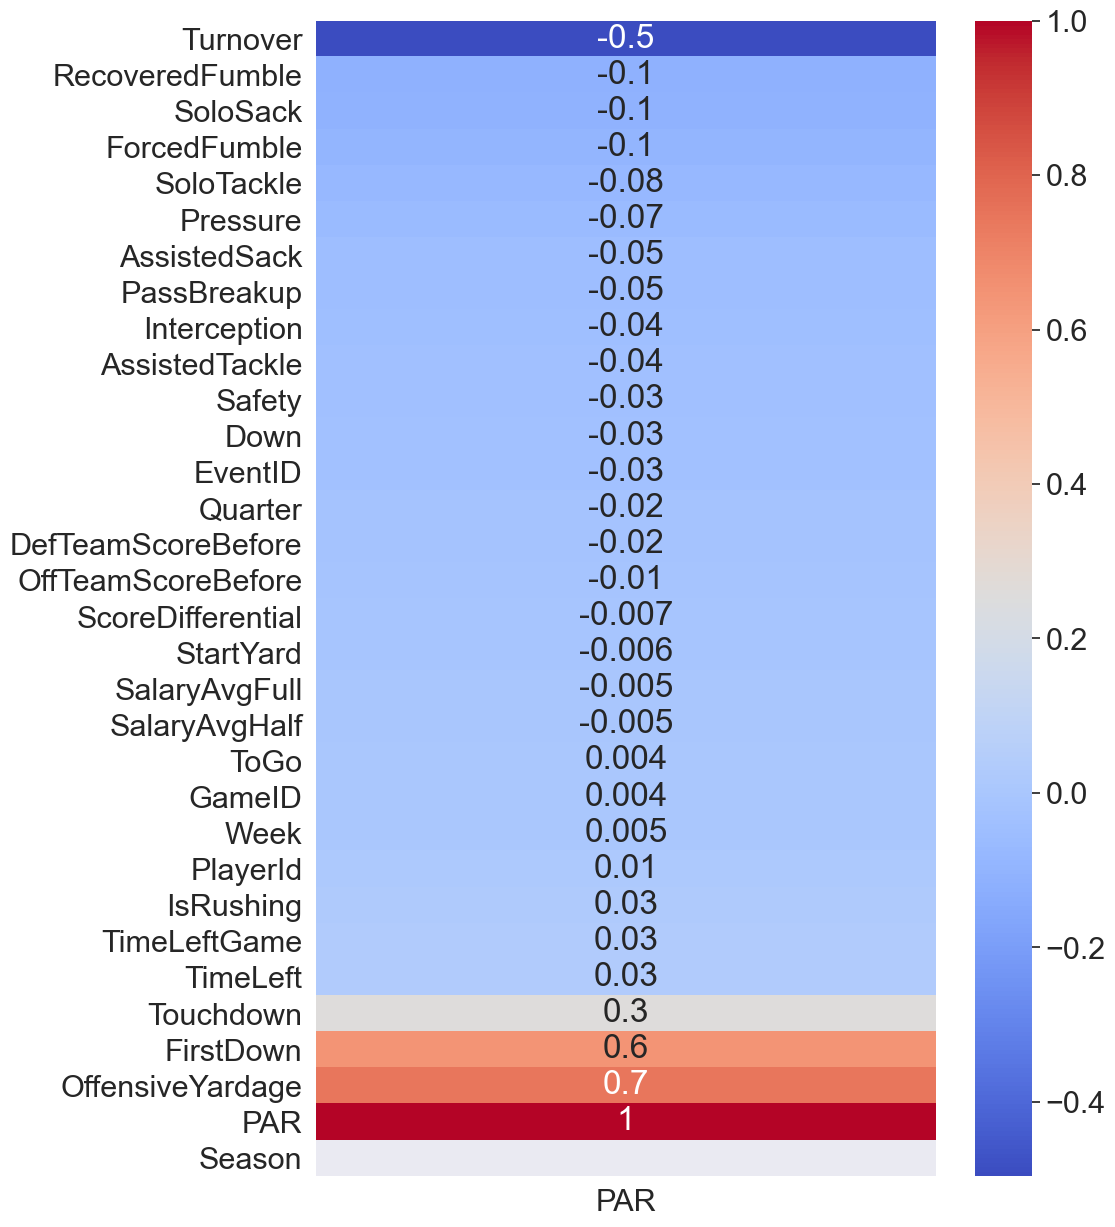

In [292]:
DL_corr = DL_PAR_Corr.corr()
x = DL_corr[['PAR']]
plt.figure(figsize=(10,15))
sns.heatmap(DL_corr[['PAR']].sort_values(by=['PAR'],ascending=True),cmap='coolwarm',annot=True,fmt='.1g')
cmap = cmap=sns.diverging_palette(5, 250, as_cmap=True)

(-1.0, 12633412.948165065)

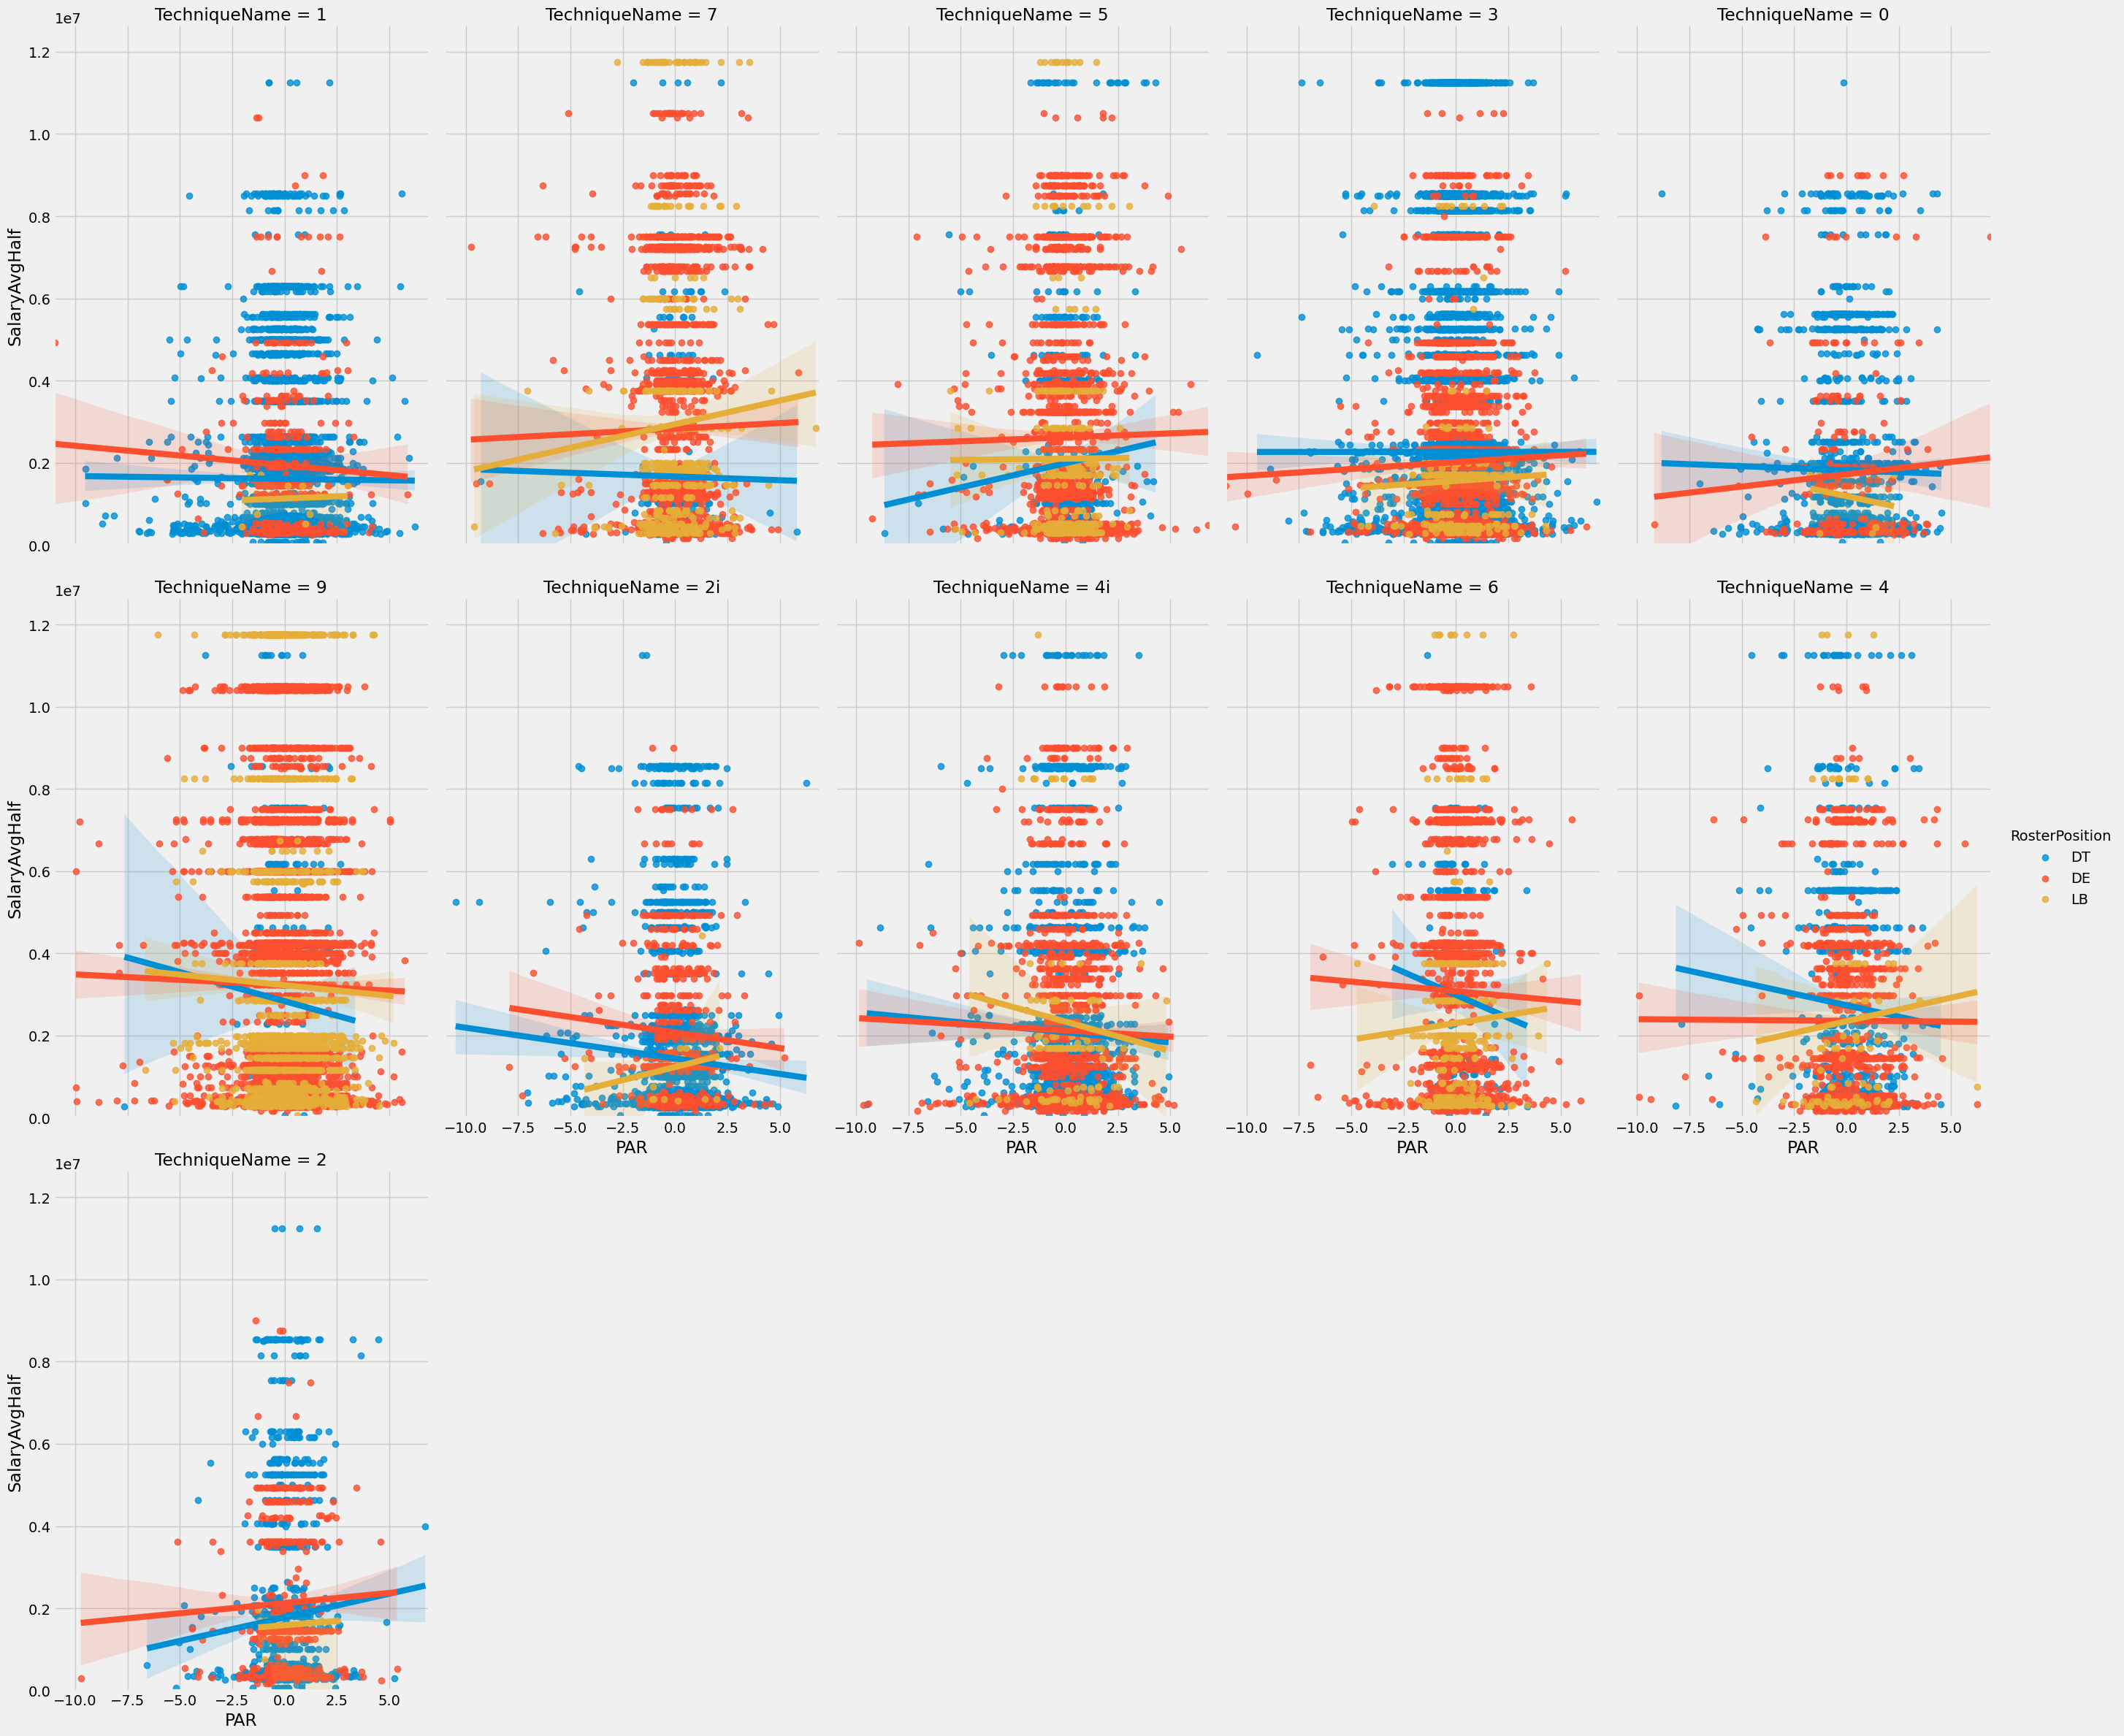

In [399]:
# How to sort this?
lmplot = sns.lmplot(x='PAR',y='SalaryAvgHalf',data=DL,col='TechniqueName',
                   hue='RosterPosition',legend_out=True,
          aspect=.7,height=8,col_wrap=5)
lmplot.axes[0].set_ylim((-1))
#plt.tight_layout(pad=2.0)


## Question 2 Nature of Distribution of Talent

Text(0.5, 1.0, 'Frequency of a Turnover Occuring by Positonal Technique')

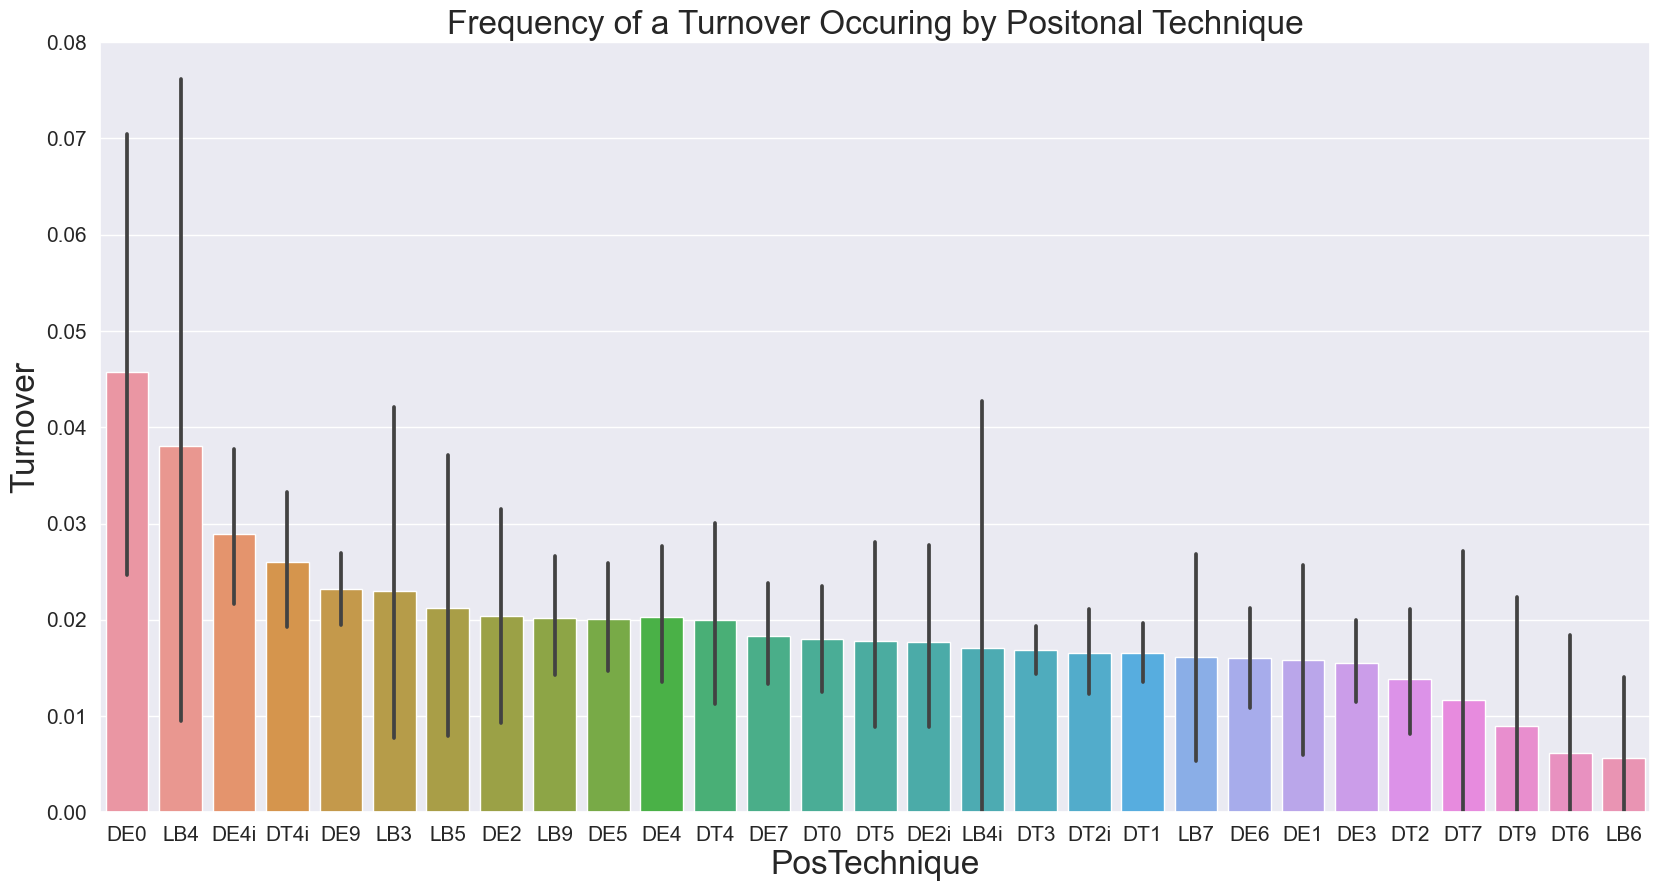

In [294]:
# 0.5 Correlation
# Frequency of a Turnover Occuring by Positonal Technique
fig, ax = plt.subplots(figsize=(20,10))

ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=15)    
sns.barplot(x='PosTechnique',y='Turnover',ax=ax,data=DL,
    order=[
    'DE0','LB4','DE4i','DT4i','DE9','LB3','LB5','DE2','LB9',
     'DE5','DE4','DT4','DE7','DT0','DT5','DE2i','LB4i',
     'DT3','DT2i','DT1','LB7','DE6','DE1','DE3','DT2','DT7',
     'DT9','DT6','LB6'])
      
plt.title('Frequency of a Turnover Occuring by Positonal Technique')

Text(0.5, 1.0, 'Frequency of Getting a Solo Sack by Positonal Technique')

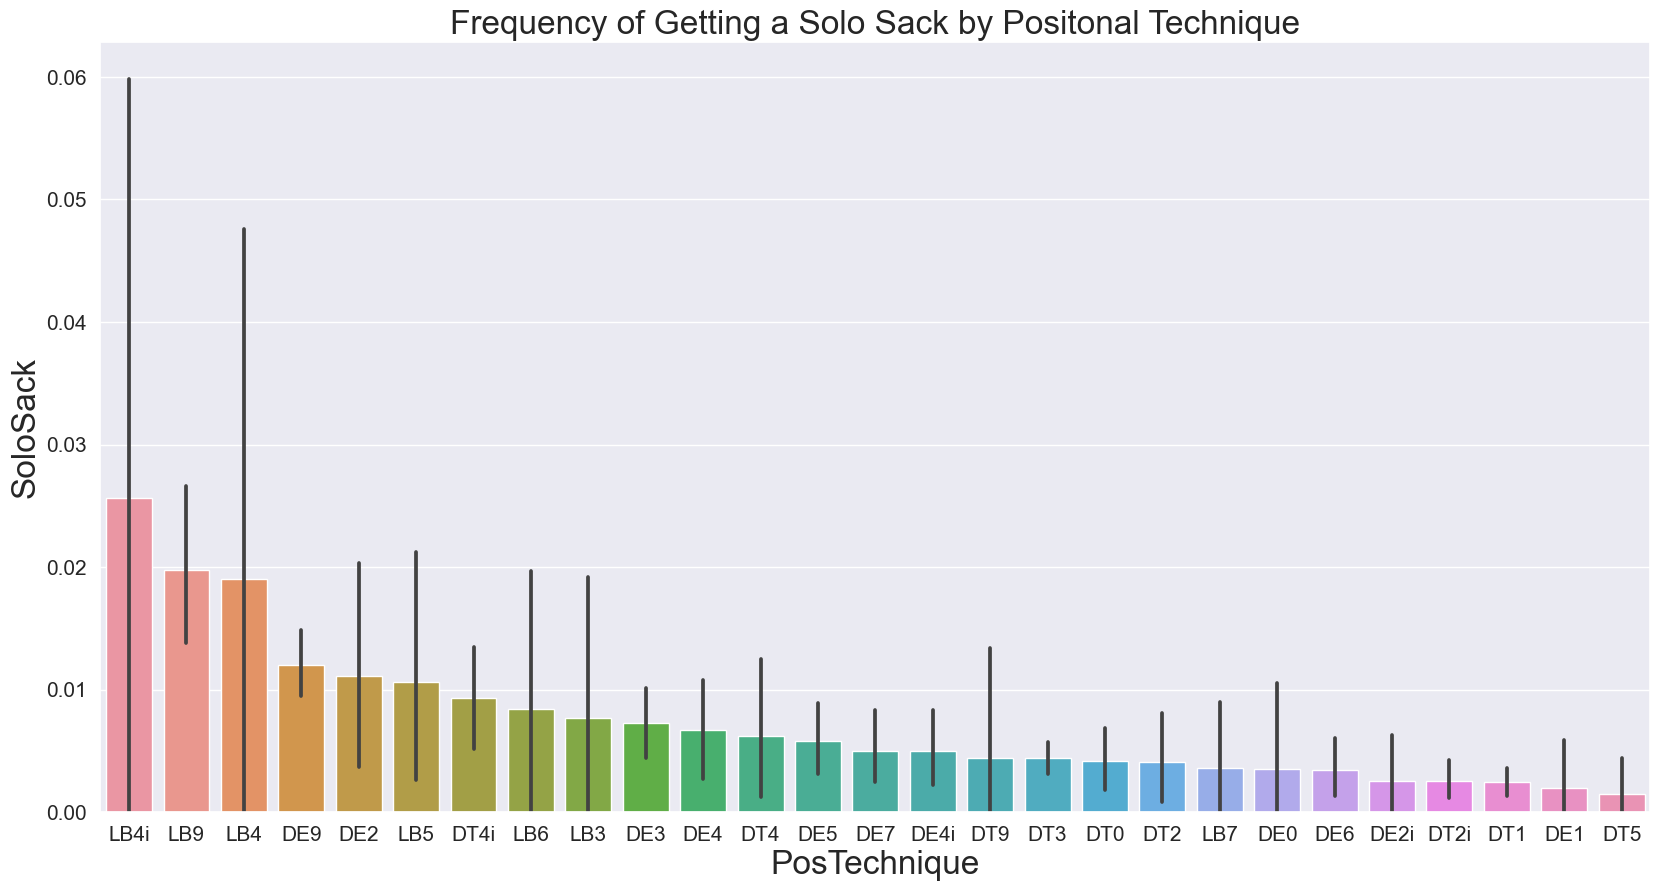

In [295]:
#0.1 correlation
# Frequency of Getting a Solo Sack by Positonal Technique

fig, ax = plt.subplots(figsize=(20,10))
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=15)  
sns.barplot(x='PosTechnique',y='SoloSack',ax=ax,data=DL,order=[
    'LB4i','LB9','LB4','DE9','DE2','LB5','DT4i','LB6','LB3',
     'DE3','DE4','DT4','DE5','DE7','DE4i','DT9','DT3','DT0',
     'DT2','LB7','DE0','DE6','DE2i','DT2i','DT1','DE1','DT5'
     ])
plt.title('Frequency of Getting a Solo Sack by Positonal Technique')

Text(0.5, 1.0, 'Frequency of Forcing a Fumble by Positonal Technique')

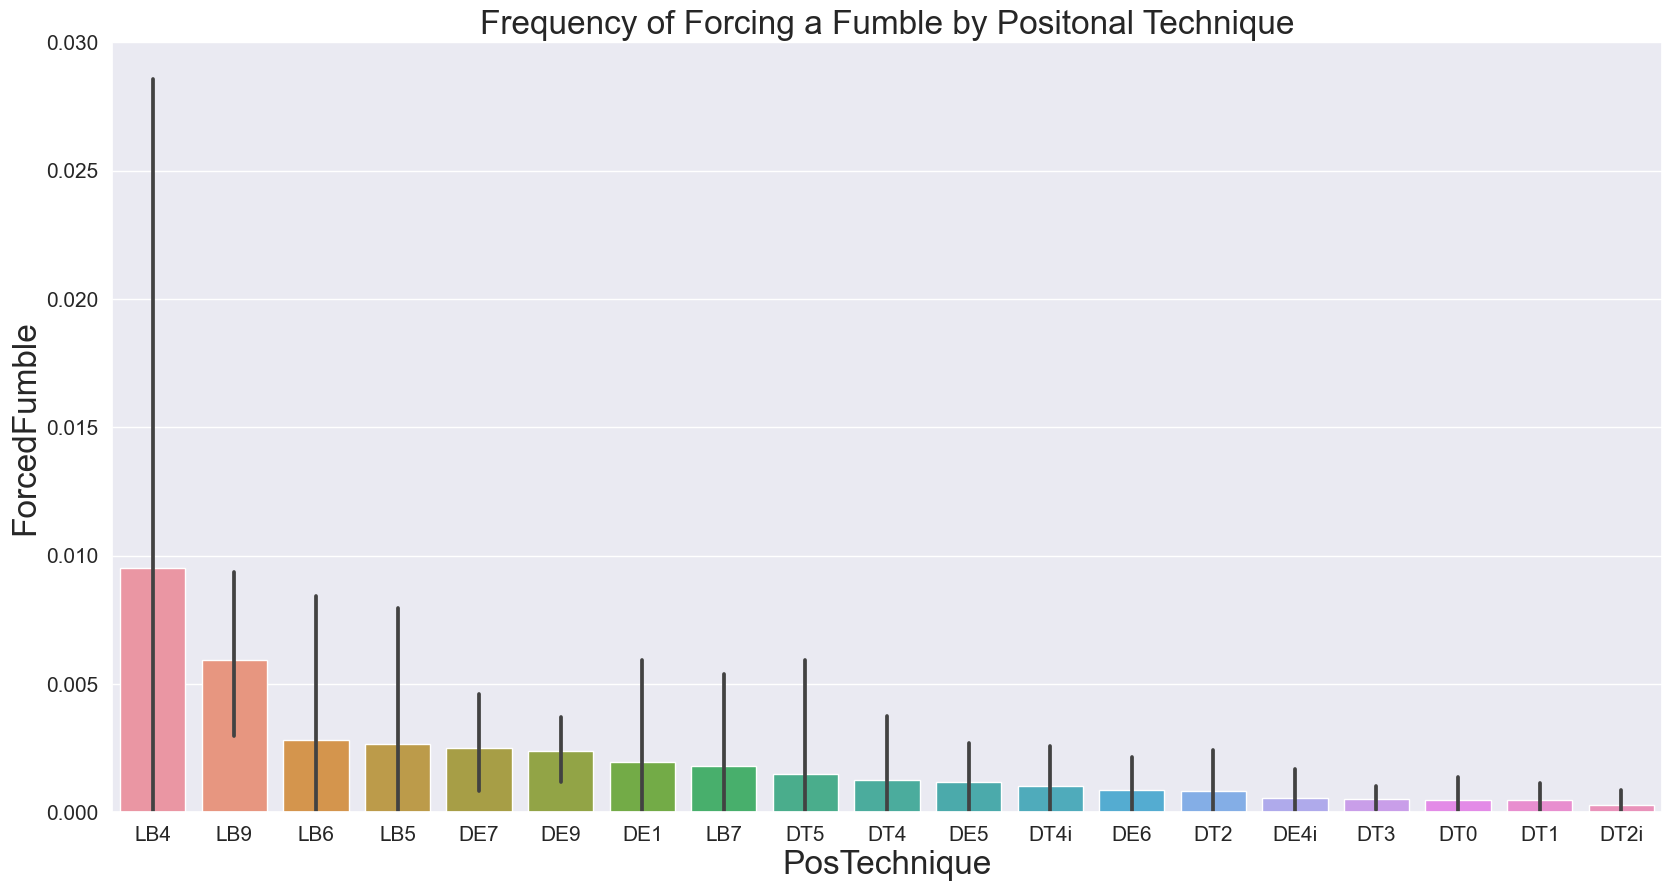

In [296]:
#0.1 correlation
# Frequency of Forcing a Fumble by Positonal Technique
fig, ax = plt.subplots(figsize=(20,10))
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=15)  
sns.barplot(x='PosTechnique',y='ForcedFumble',ax=ax,data=DL,order=[
    'LB4','LB9','LB6','LB5','DE7','DE9','DE1','LB7','DT5',
    'DT4','DE5','DT4i','DE6','DT2','DE4i','DT3',
     'DT0','DT1','DT2i'
     ])
plt.title('Frequency of Forcing a Fumble by Positonal Technique')

In [199]:
#DL.columns
#fig, ax = plt.subplots(figsize=(20,10))
#ax.tick_params(axis='x', labelsize=15)
#ax.tick_params(axis='y', labelsize=15) 
#sns.barplot(x='PosTechnique',y='OffensiveYardage',ax=ax,data=DL)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 <a list of 20 Text major ticklabel objects>)

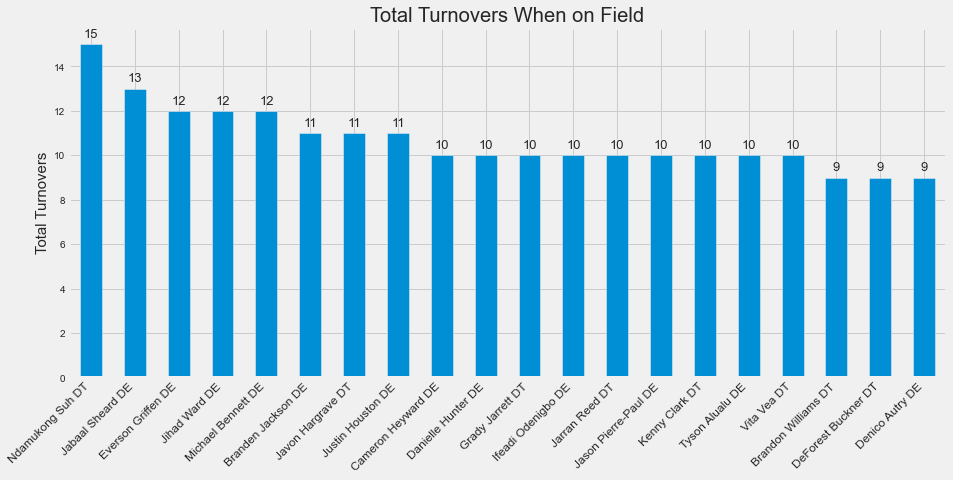

In [200]:
plt.style.use('fivethirtyeight')

plt.figure(figsize=(14,6))
plt.xlabel(xlabel='',fontsize=15)
plt.ylabel(ylabel='Total Turnovers',fontsize=15)

plt.xticks(fontsize=12)
plt.yticks(fontsize=10)

DL_groupby_sacks = DL.groupby('Name_Position')['Turnover'].sum().nlargest(20).plot.bar()
for p in DL_groupby_sacks.patches:
    DL_groupby_sacks.annotate(format(p.get_height(), '.0f'), 
    (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center',fontsize=13,
    xytext = (0, 10), textcoords = 'offset points')

DL_groupby_sacks.xaxis.set_label_text("")
plt.title('Total Turnovers When on Field')
plt.xticks(rotation=45, horizontalalignment= 'right')



(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 <a list of 20 Text major ticklabel objects>)

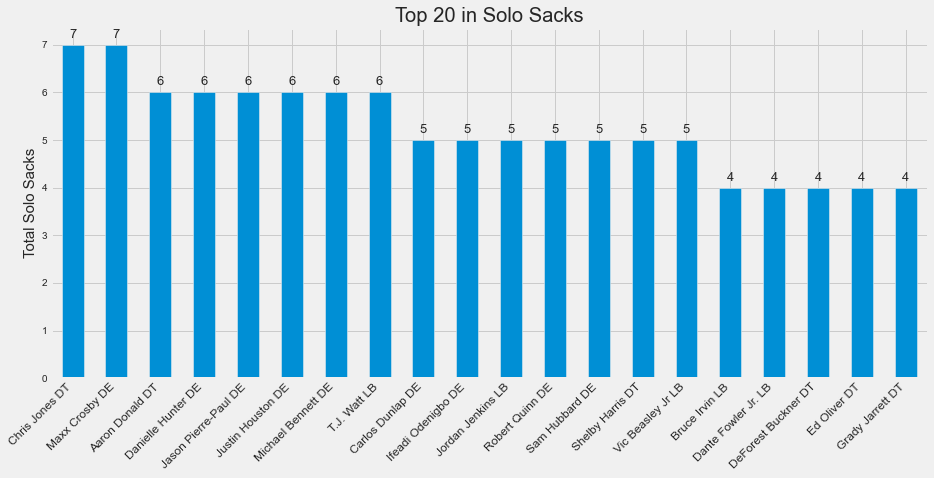

In [201]:
plt.style.use('fivethirtyeight')

plt.figure(figsize=(14,6))
plt.xlabel(xlabel='',fontsize=15)
plt.ylabel(ylabel='Total Solo Sacks',fontsize=15)

plt.xticks(fontsize=12)
plt.yticks(fontsize=10)

DL_groupby_sacks = DL.groupby('Name_Position')['SoloSack'].sum().nlargest(20).plot.bar()
for p in DL_groupby_sacks.patches:
    DL_groupby_sacks.annotate(format(p.get_height(), '.0f'), 
    (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center',fontsize=13,
    xytext = (0, 10), textcoords = 'offset points')

DL_groupby_sacks.xaxis.set_label_text("")
plt.title('Top 20 in Solo Sacks')
plt.xticks(rotation=45, horizontalalignment= 'right')


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 <a list of 20 Text major ticklabel objects>)

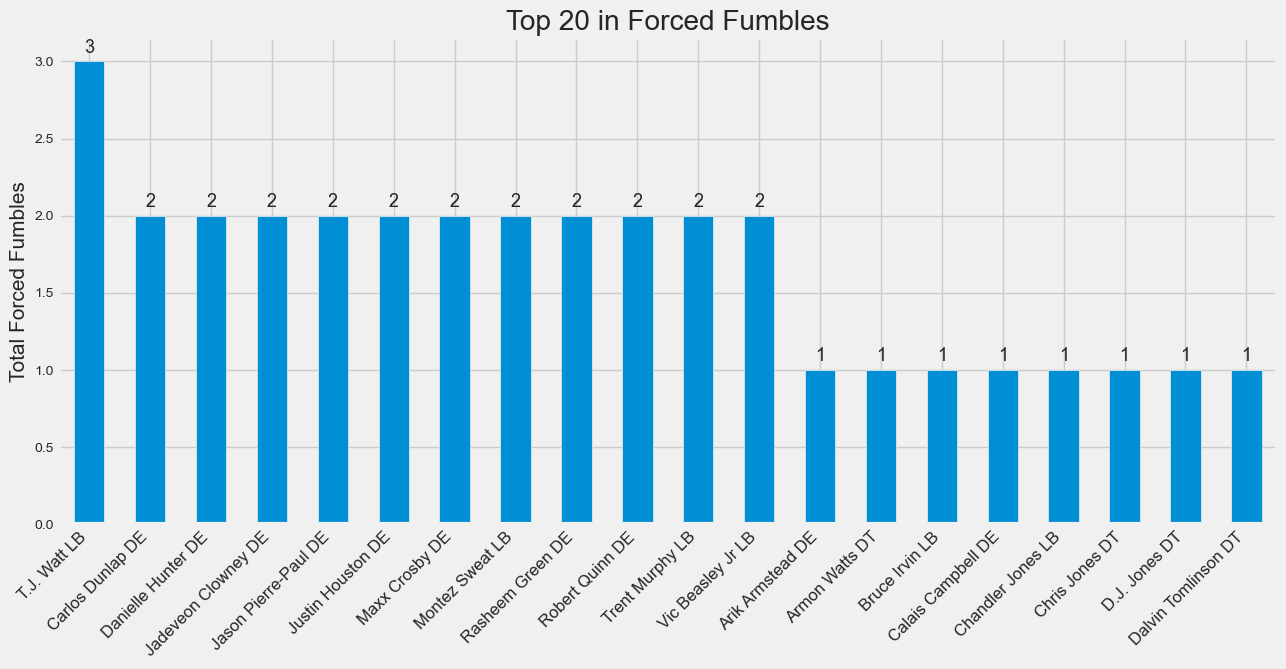

In [297]:
plt.style.use('fivethirtyeight')

plt.figure(figsize=(14,6))
plt.xlabel(xlabel='',fontsize=5)
plt.ylabel(ylabel='Total Forced Fumbles',fontsize=15)

plt.xticks(fontsize=12)
plt.yticks(fontsize=10)

DL_groupby_fumble = DL.groupby('Name_Position')['ForcedFumble'].sum().nlargest(20).plot.bar()


for p in DL_groupby_fumble.patches:
    DL_groupby_fumble.annotate(format(p.get_height(), '.0f'), 
    (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center',fontsize=13,
    xytext = (0, 10), textcoords = 'offset points')

DL_groupby_fumble.xaxis.set_label_text("")
plt.title('Top 20 in Forced Fumbles')
plt.xticks(rotation=45, horizontalalignment= 'right')



## Question 3 Which Scenarios Change 1's Answer

In [332]:
DL_crunchtime = DL[(DL['Quarter']==4) & (DL['TimeLeft'] <= 120) & (DL['ScoreDifferential'] >= -8) &
(DL['ScoreDifferential'] <= 8)]

In [333]:
DL_crunchtime['PAR_tenth'] = DL_crunchtime['PAR'] * 1/10

/Users/KyleVanderMeulen/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [334]:
DL_crunchtime_positive = DL_crunchtime[DL_crunchtime['PAR'] >=0]
DL_crunchtime_negative = DL_crunchtime[DL_crunchtime['PAR'] < 0]

DL_crunchtime_positive['PAR'] = DL_crunchtime_positive['PAR'] + DL_crunchtime_positive['PAR_tenth']
DL_crunchtime_negative['PAR'] = DL_crunchtime_negative['PAR'] - DL_crunchtime_negative['PAR_tenth']





/Users/KyleVanderMeulen/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/KyleVanderMeulen/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [339]:
DL_crunchtime_negative.to_csv(r'C:\Users\KyleVanderMeulen\Desktop\export_DL_crunchtime_negative.csv', index=False, header=True)

In [340]:
#DL_crunchtime = pd.merge(DL_crunchtime, DL_crunchtime_negative, how='left', on=['Name'])
DL_crunchtime1 = pd.read_csv('DL_crunchtime.csv')

In [341]:
DL_crunchtime1['PAR']

0       2.258997
1       2.258997
2       1.533310
3       1.411197
4       1.463188
          ...   
1568   -1.061439
1569   -1.825340
1570   -1.783691
1571   -1.805203
1572   -1.810009
Name: PAR, Length: 1573, dtype: float64

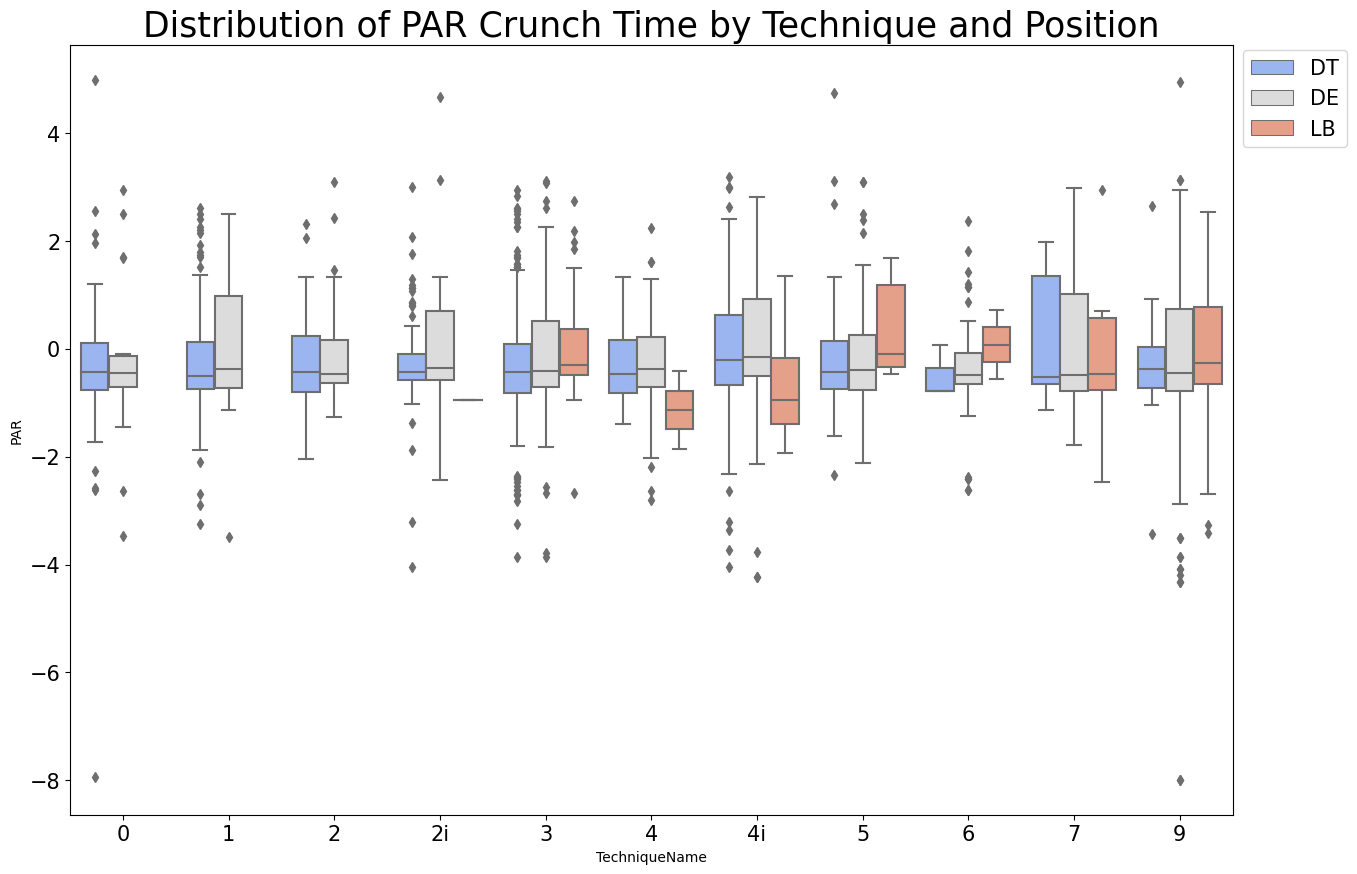

In [342]:
plt.style.use('default')

plt.figure(figsize=(15,10))
ax = sns.boxplot(x="TechniqueName", y="PAR", hue="RosterPosition",
            order=['0','1','2','2i','3','4','4i','5','6','7','9'],data=DL_crunchtime1, palette="coolwarm")
ax.legend(loc='center left', bbox_to_anchor=(1, 0.93),prop={'size': 15})
plt.title('Distribution of PAR Crunch Time by Technique and Position',fontsize=25)
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=15)

Text(0.5, 63.249999999999986, 'Position')

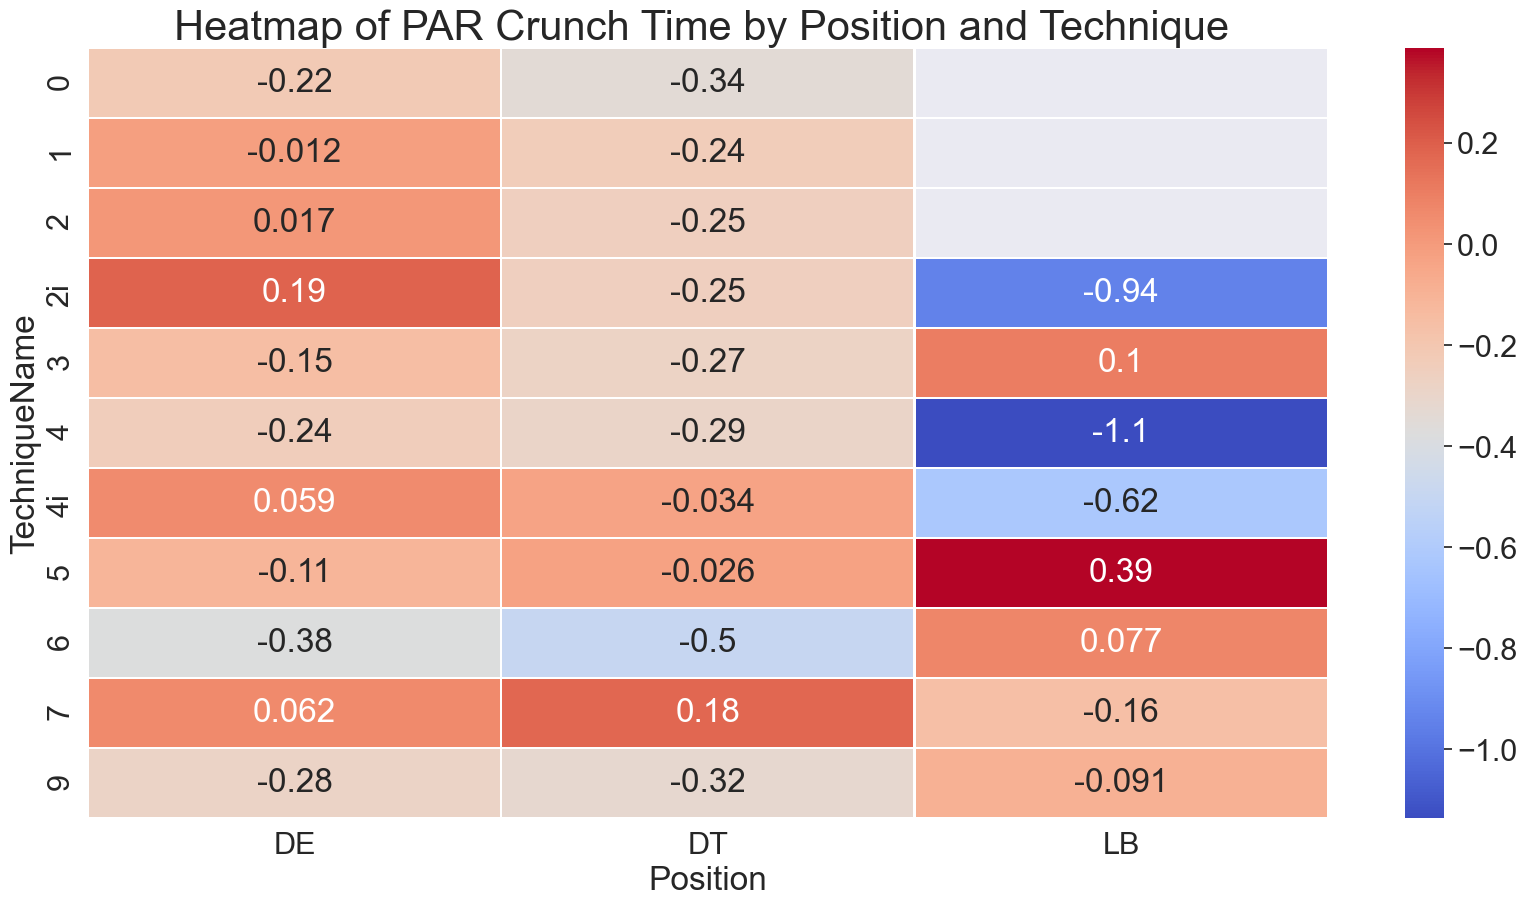

In [345]:
pivot_DL_crunchtime1 = DL_crunchtime1.pivot_table(values='PAR',index='TechniqueName',columns='RosterPosition')
plt.figure(figsize=(20,10))
sns.set(font_scale=2)
ax = sns.heatmap(pivot_DL_crunchtime1,cmap='coolwarm',linecolor='white',linewidths=1,annot=True)
ax.axes.set_title("Heatmap of PAR Crunch Time by Position and Technique ", fontsize=30, y=1.01)
plt.xlabel("Position") 

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 <a list of 20 Text major ticklabel objects>)

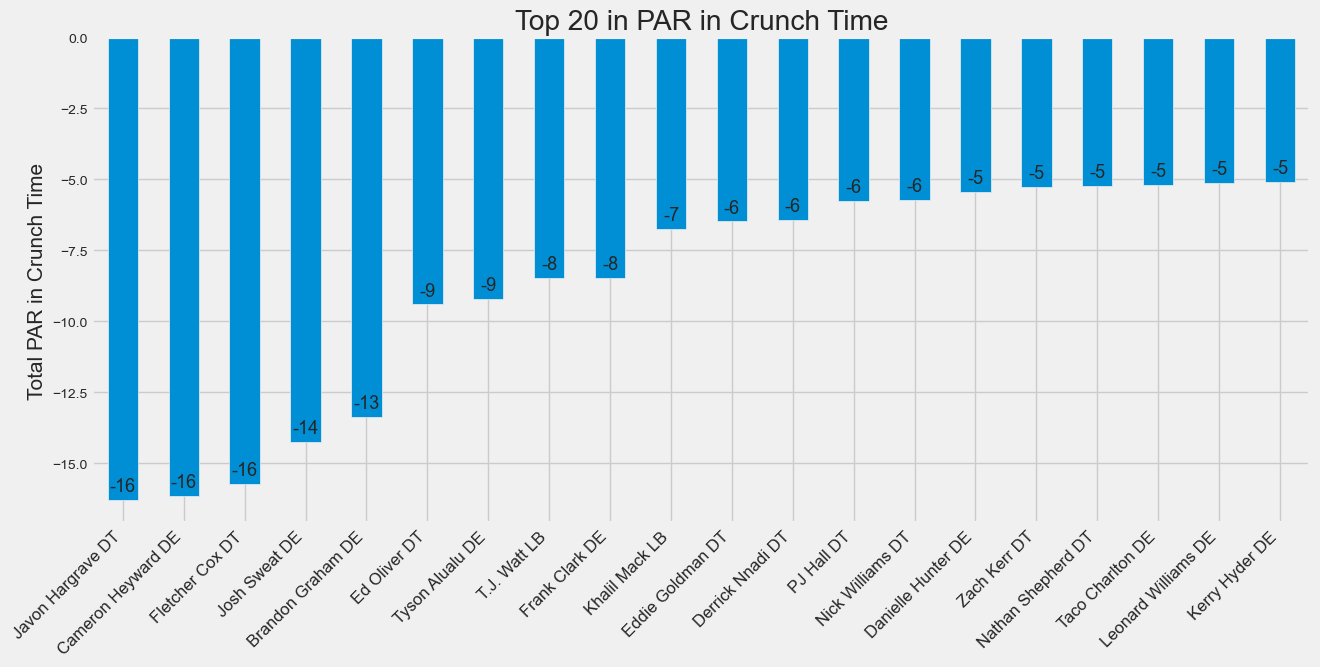

In [346]:
plt.style.use('fivethirtyeight')

plt.figure(figsize=(14,6))
plt.xlabel(xlabel='',fontsize=15)
plt.ylabel(ylabel='Total PAR in Crunch Time',fontsize=15)

plt.xticks(fontsize=12)
plt.yticks(fontsize=10)

DL_groupby_PAR = DL_crunchtime1.groupby('Name_Position')['PAR'].sum().nsmallest(20).plot.bar()
for p in DL_groupby_PAR.patches:
    DL_groupby_PAR.annotate(format(p.get_height(), '.0f'), 
    (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center',fontsize=13,
    xytext = (0, 10), textcoords = 'offset points')

DL_groupby_PAR.xaxis.set_label_text("")
plt.title('Top 20 in PAR in Crunch Time')
plt.xticks(rotation=45, horizontalalignment= 'right')

In [208]:
DL_OT = DL[DL['Quarter']==5]

In [209]:
DL_OT

GameID  EventID  Season  Week            StadiumName OffensiveTeam  \
3852     2639      970    2019     9      CenturyLink Field      Seahawks   
3853     2639      970    2019     9      CenturyLink Field      Seahawks   
3854     2639      970    2019     9      CenturyLink Field      Seahawks   
3855     2639      975    2019     9      CenturyLink Field      Seahawks   
3856     2639      975    2019     9      CenturyLink Field      Seahawks   
...       ...      ...     ...   ...                    ...           ...   
44609    2744      945    2019    16            FedEx Field        Giants   
44610    2744      945    2019    16            FedEx Field        Giants   
49832    2757      915    2019    17  Raymond James Stadium    Buccaneers   
49833    2757      915    2019    17  Raymond James Stadium    Buccaneers   
49834    2757      915    2019    17  Raymond James Stadium    Buccaneers   

      DefensiveTeam  OffTeamScoreBefore  DefTeamScoreBefore  Quarter  ...  \
3852     Buccaneers                  34                  34        5  ...   
3853     Buccaneers                  34                  34        5  ...   
3854     Buccaneers                  34                  34        5  ...   
3855     Buccaneers                  34                  34        5  ...   
3856     Buccaneers                  34                  34        5  ...   
...             ...                 ...                 ...      ...  ...   
44609      Redskins                  35                  35        5  ...   
44610      Redskins                  35                  35        5  ...   
49832       Falcons                  22                  22        5  ...   
49833       Falcons                  22                  22        5  ...   
49834       Falcons                  22                  22        5  ...   

       PassBreakup  Interception  ForcedFumble RecoveredFumble  SalaryAvgFull  \
3852             0             0             0               0        9250000   
3853             0             0             0               0        3000000   
3854             0             0             0               0        3706060   
3855             0             0             0               0        9250000   
3856             0             0             0               0        3706060   
...            ...           ...           ...             ...            ...   
44609            0             0             0               0        3604590   
44610            0             0             0               0        2899094   
49832            0             0             0               0       17000000   
49833            1             0             0               0         752098   
49834            0             0             0               0         895000   

      SalaryAvgHalf  PosTechnique  ScoreDifferential  TimeLeftGame  \
3852      4625000.0           DT3                  0          2400   
3853      1500000.0           DE6                  0          2400   
3854      1853030.0          DT2i                  0          2400   
3855      4625000.0           DT4                  0          2384   
3856      1853030.0           DT4                  0          2384   
...             ...           ...                ...           ...   
44609     1802295.0           DT1                  0          1036   
44610     1449547.0           DE3                  0          1036   
49832     8500000.0           DT3                  0          2400   
49833      376049.0           DE6                  0          2400   
49834      447500.0          DT2i                  0          2400   

              Name_Position  
3852       Ndamukong Suh DT  
3853   Jason Pierre-Paul DE  
3854            Vita Vea DT  
3855       Ndamukong Suh DT  
3856            Vita Vea DT  
...                     ...  
44609        Daron Payne DT  
44610     Jonathan Allen DE  
49832      Grady Jarrett DT  
49833      John Cominsky DE  
49834     Tye

In [210]:
# Concatenated the two df together to get a crunchtime df
DL_crunchtime = pd.concat([DL_crunchtime,DL_OT],ignore_index=True)


In [211]:
# Situation #1 Crunch Time
DL_crunchtime.tail()

GameID  EventID  Season  Week            StadiumName OffensiveTeam  \
1830    2744      945    2019    16            FedEx Field        Giants   
1831    2744      945    2019    16            FedEx Field        Giants   
1832    2757      915    2019    17  Raymond James Stadium    Buccaneers   
1833    2757      915    2019    17  Raymond James Stadium    Buccaneers   
1834    2757      915    2019    17  Raymond James Stadium    Buccaneers   

     DefensiveTeam  OffTeamScoreBefore  DefTeamScoreBefore  Quarter  ...  \
1830      Redskins                  35                  35        5  ...   
1831      Redskins                  35                  35        5  ...   
1832       Falcons                  22                  22        5  ...   
1833       Falcons                  22                  22        5  ...   
1834       Falcons                  22                  22        5  ...   

      PassBreakup  Interception  ForcedFumble RecoveredFumble  SalaryAvgFull  \
1830            0             0             0               0        3604590   
1831            0             0             0               0        2899094   
1832            0             0             0               0       17000000   
1833            1             0             0               0         752098   
1834            0             0             0               0         895000   

     SalaryAvgHalf  PosTechnique  ScoreDifferential  TimeLeftGame  \
1830     1802295.0           DT1                  0          1036   
1831     1449547.0           DE3                  0          1036   
1832     8500000.0           DT3                  0          2400   
1833      376049.0           DE6                  0          2400   
1834      447500.0          DT2i                  0          2400   

          Name_Position  
1830     Daron Payne DT  
1831  Jonathan Allen DE  
1832   Grady Jarrett DT  
1833   John Cominsky DE  
1834  Tyeler Davison DT  

[5 rows x 45 columns]

In [349]:
# Situation 2 Goal Line Stand
DL_goalline = DL[(DL['StartYard'] <=5) & (DL['SideOfField']=='Oppo') & (DL['EventType']=='rush')]

Text(0.5, 23.249999999999957, 'Position')

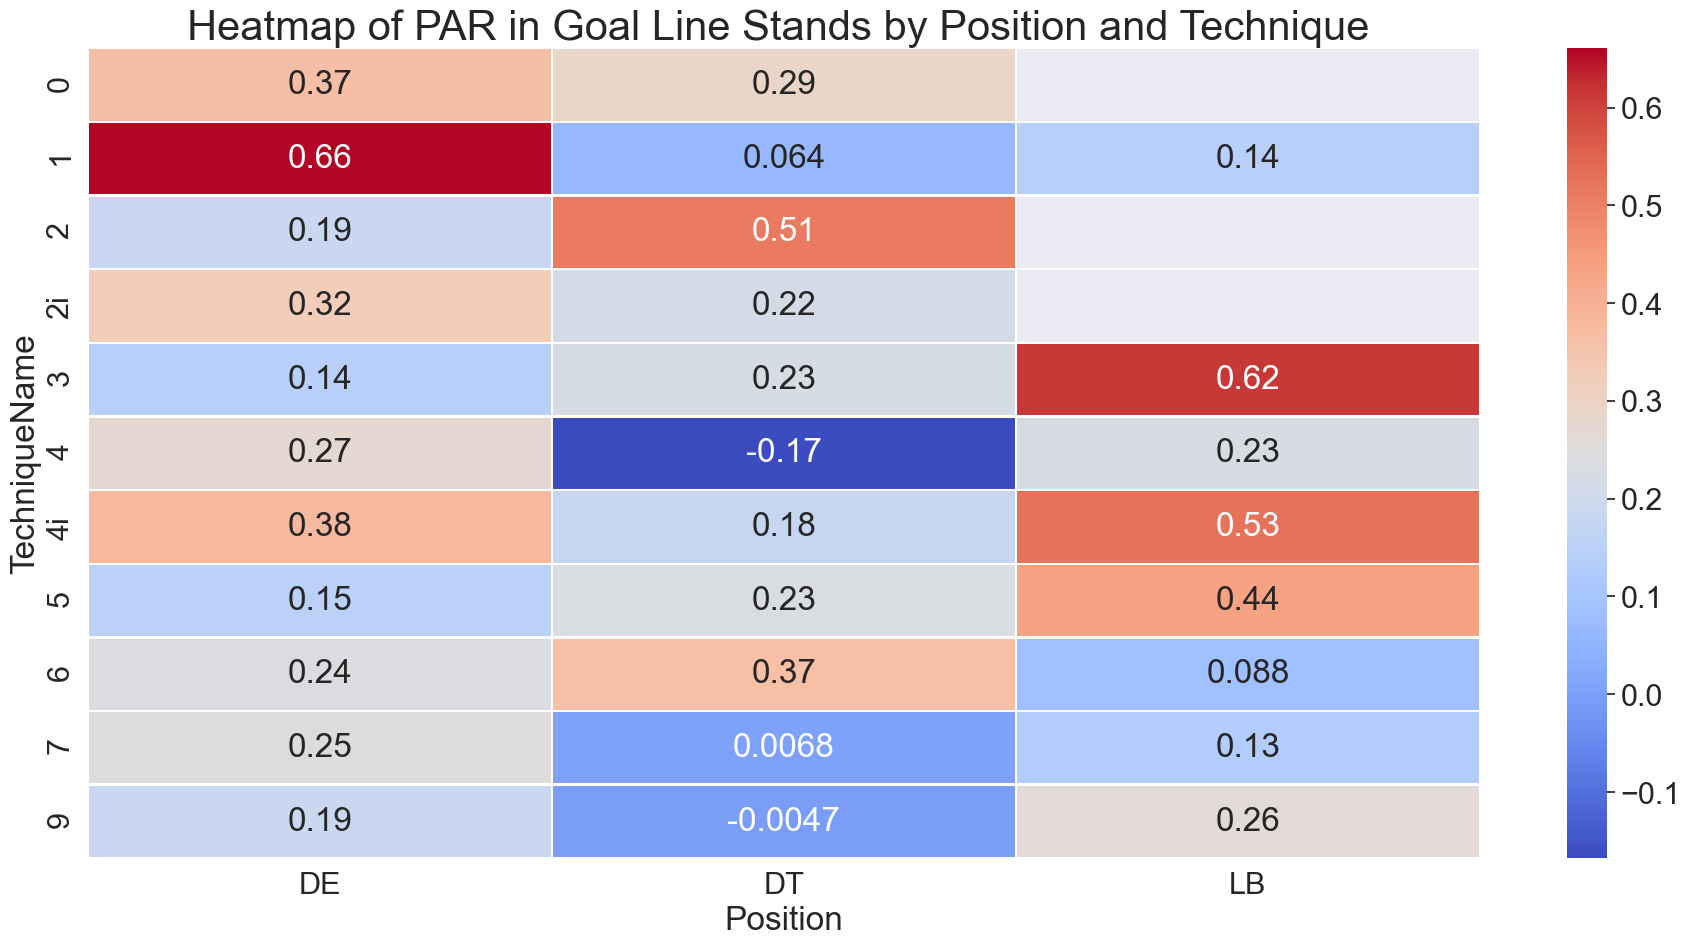

In [352]:
pivot_DL_goalline = DL_goalline.pivot_table(values='PAR',index='TechniqueName',columns='RosterPosition')
plt.figure(figsize=(20,10))
sns.set(font_scale=2)
ax = sns.heatmap(pivot_DL_goalline,cmap='coolwarm',linecolor='white',linewidths=1,annot=True)
ax.axes.set_title("Heatmap of PAR in Goal Line Stands by Position and Technique ", fontsize=30, y=1.01)
plt.xlabel("Position") 

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 <a list of 20 Text major ticklabel objects>)

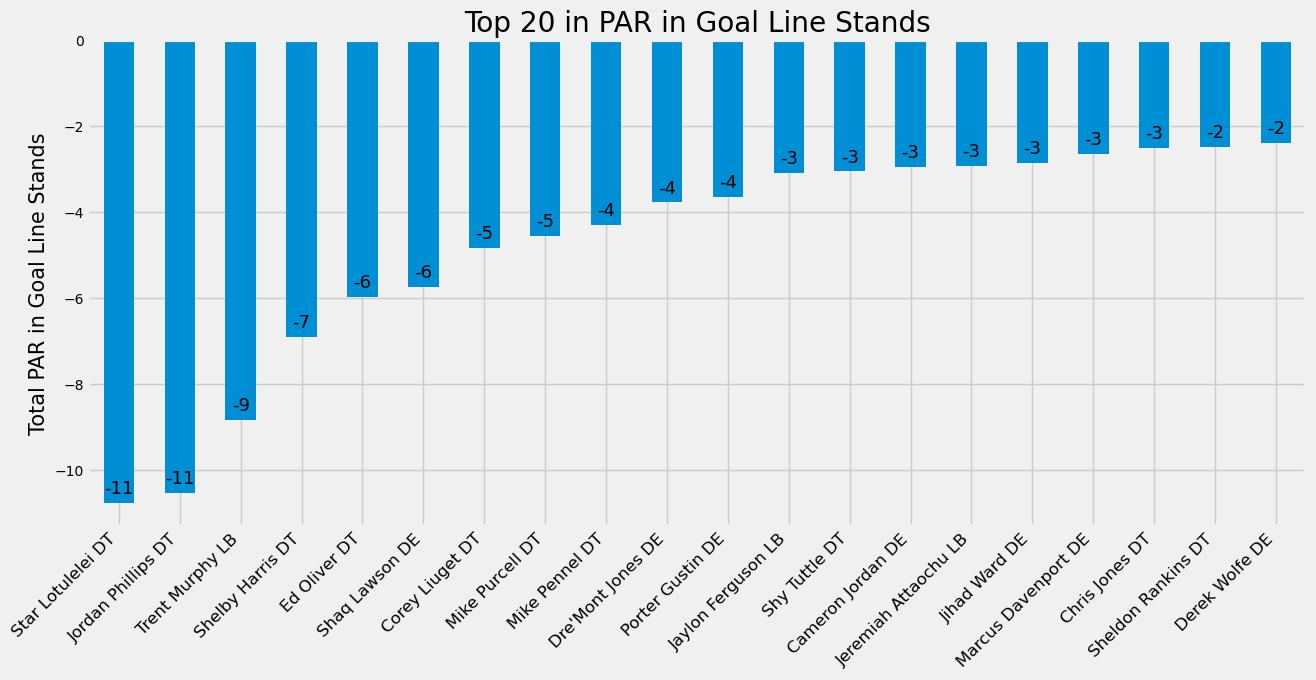

In [400]:
plt.style.use('fivethirtyeight')

plt.figure(figsize=(14,6))
plt.xlabel(xlabel='',fontsize=15)
plt.ylabel(ylabel='Total PAR in Goal Line Stands',fontsize=15)

plt.xticks(fontsize=12)
plt.yticks(fontsize=10)

DL_groupby_goalline = DL_goalline.groupby('Name_Position')['PAR'].sum().nsmallest(20).plot.bar()
for p in DL_groupby_goalline.patches:
    DL_groupby_goalline.annotate(format(p.get_height(), '.0f'), 
    (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center',fontsize=13,
    xytext = (0, 10), textcoords = 'offset points')

DL_groupby_goalline.xaxis.set_label_text("")
plt.title('Top 20 in PAR in Goal Line Stands')
plt.xticks(rotation=45, horizontalalignment= 'right')

In [359]:
# Situation #3 Left vs Right Side Pass
DL_pass = DL2[DL2['EventType']=='pass']

Text(0.5, 1.01, 'Heatmap of PAR by Side Of Ball Against the Pass ')

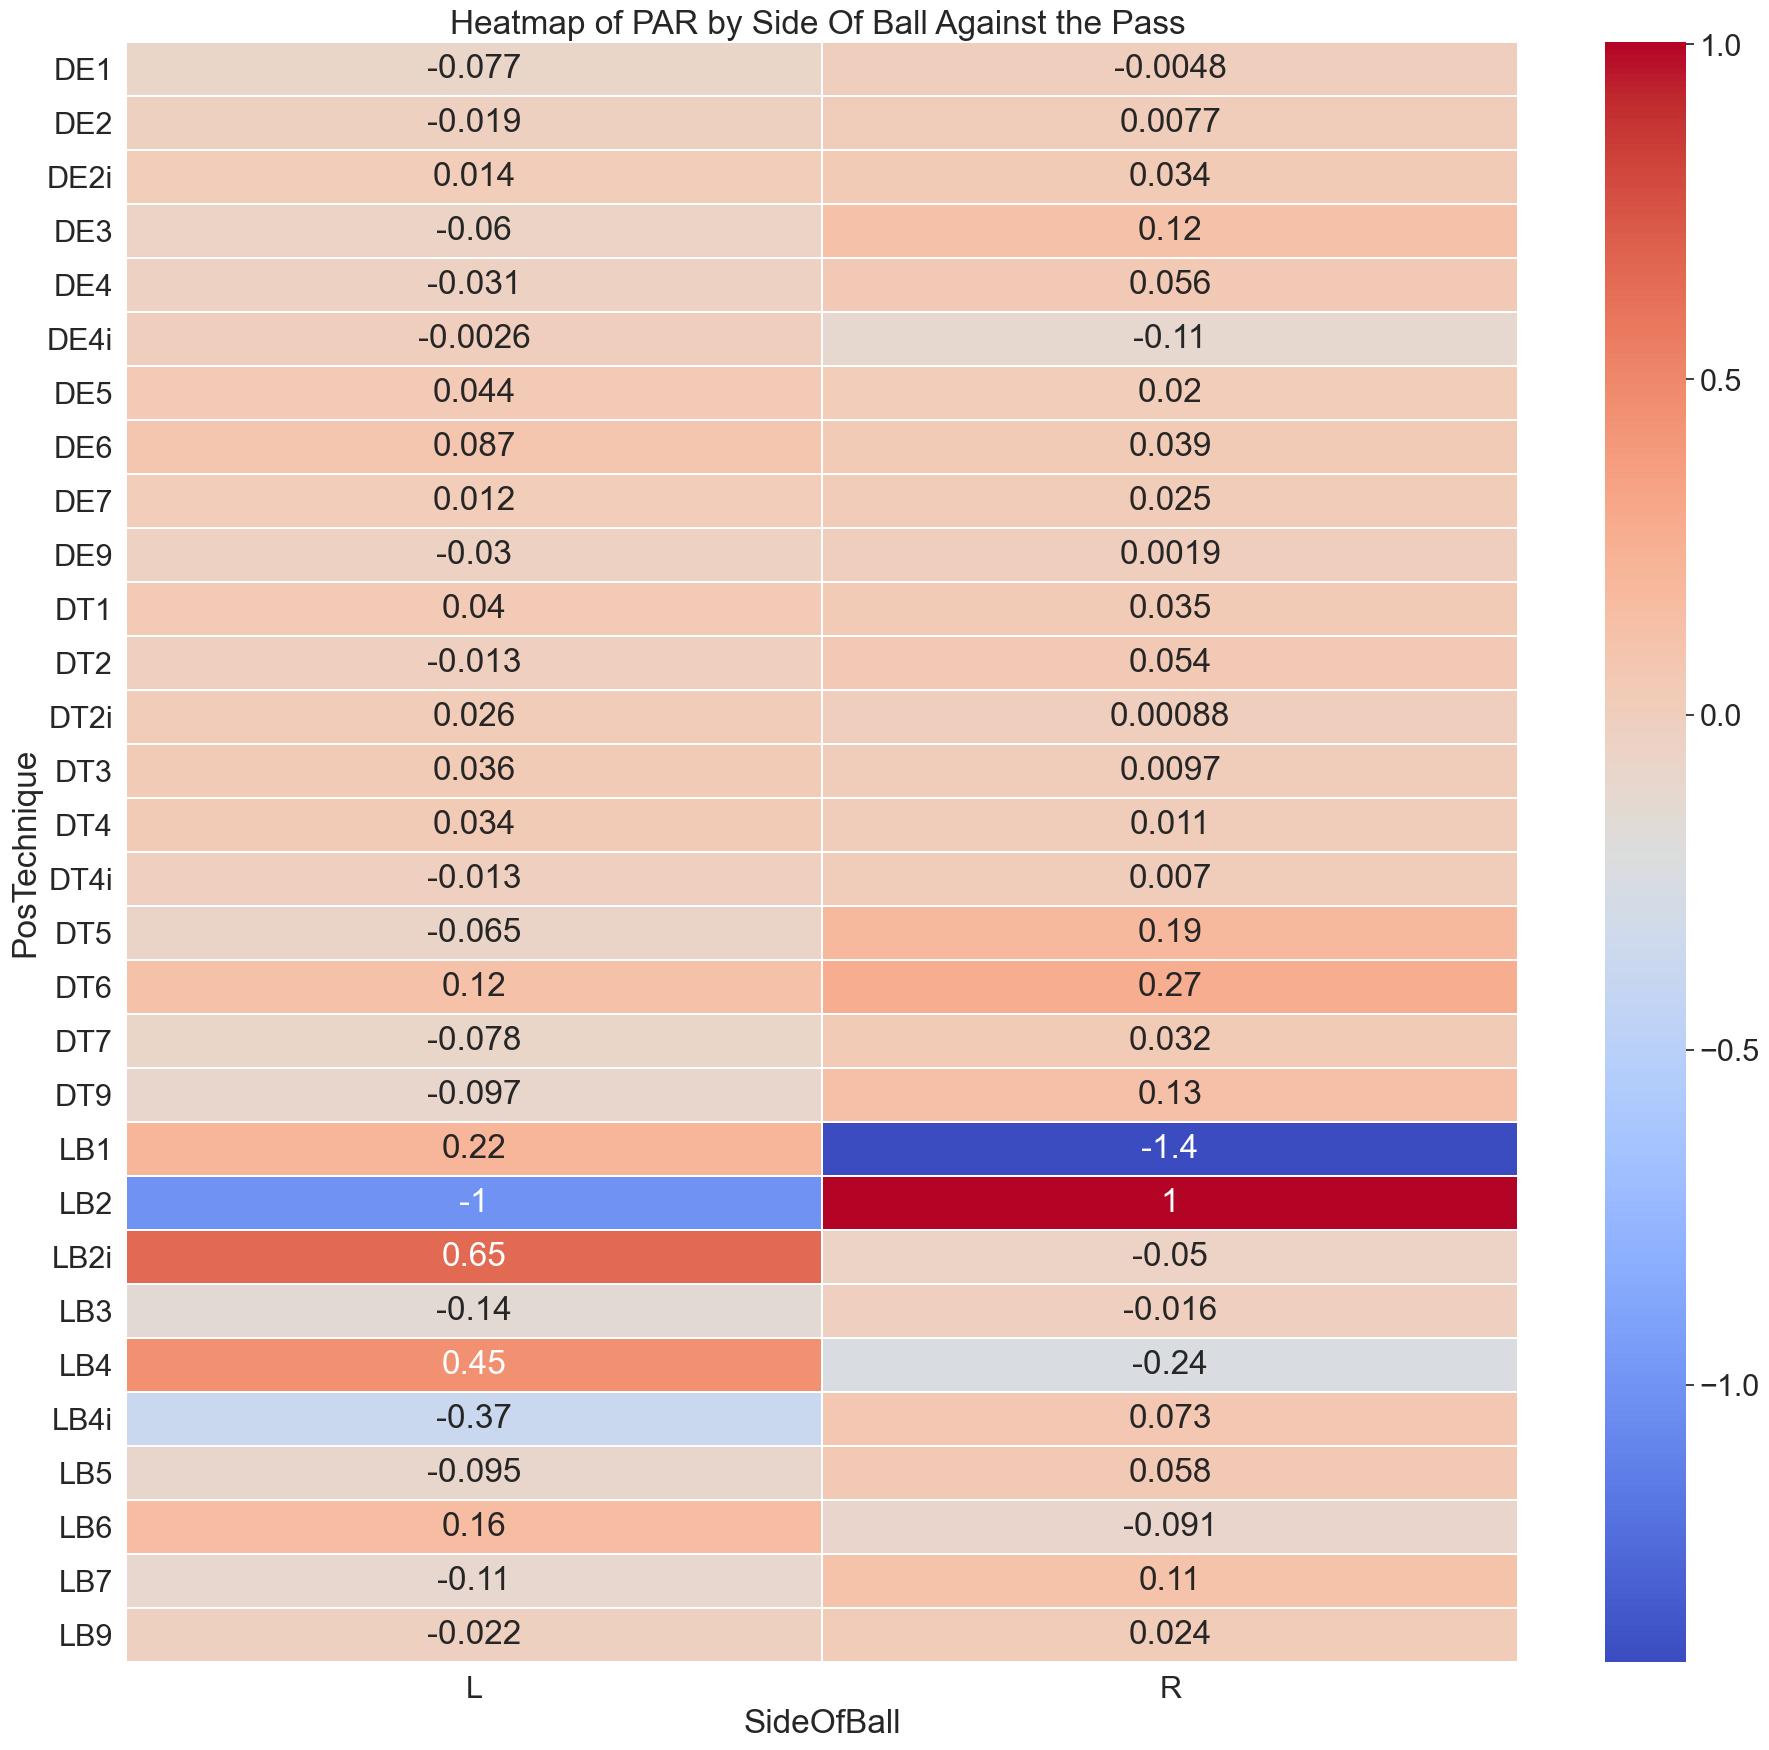

In [363]:
# An assumption is that those lined up on the right side of the ball
# will have the ability to blind side the right handed QB's 
sns.set(font_scale=2)
pivot_DL_pass = DL_pass.pivot_table(values='PAR',index='PosTechnique',columns='SideOfBall')
plt.figure(figsize=(20,20))
ax = sns.heatmap(pivot_DL_pass,cmap='coolwarm',linecolor='white',linewidths=1,annot=True)
ax.axes.set_title("Heatmap of PAR by Side Of Ball Against the Pass ", fontsize=24, y=1.01)

In [393]:
DL_pass_R = DL2[(DL2['EventType']=='pass') & (DL['SideOfBall'] == 'R')]
DL_pass_L = DL2[(DL2['EventType']=='pass') & (DL['SideOfBall'] == 'L')]


/Users/KyleVanderMeulen/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/Users/KyleVanderMeulen/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 <a list of 20 Text major ticklabel objects>)

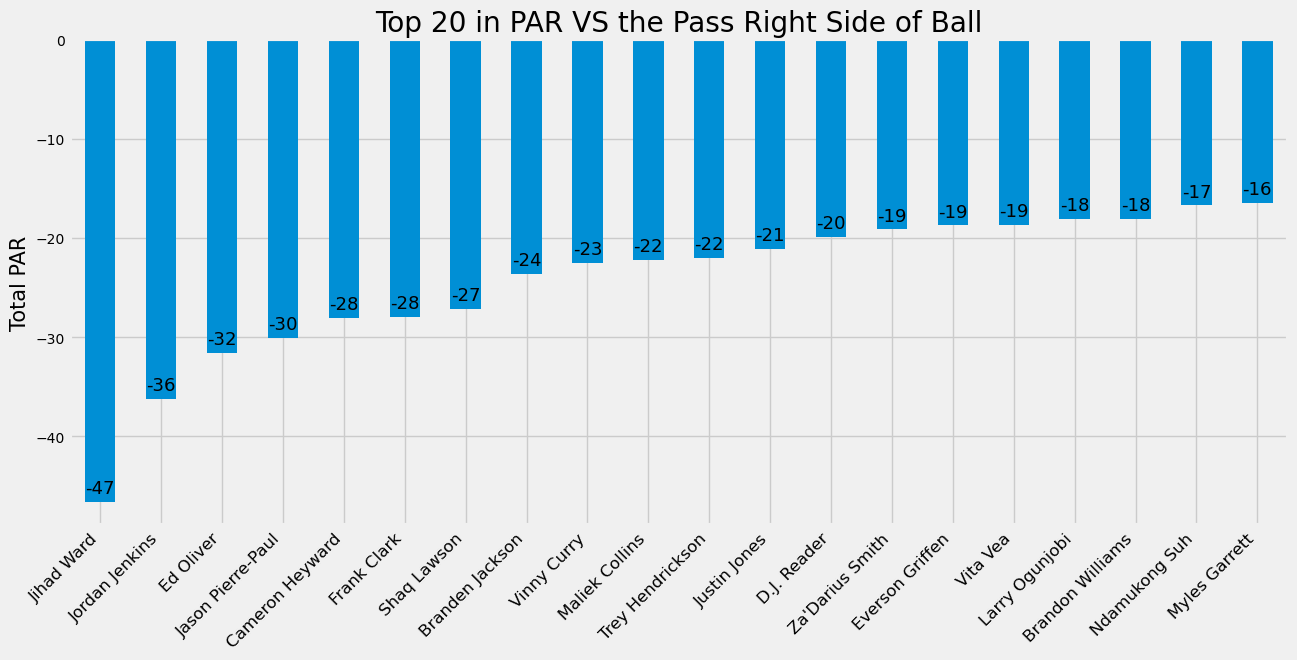

In [395]:
plt.style.use('fivethirtyeight')

plt.figure(figsize=(14,6))
plt.xlabel(xlabel='',fontsize=15)
plt.ylabel(ylabel='Total PAR',fontsize=15)

plt.xticks(fontsize=12)
plt.yticks(fontsize=10)

DL_groupby_pass_R = DL_pass_R.groupby('Name')['PAR'].sum().nsmallest(20).plot.bar()
for p in DL_groupby_pass_R.patches:
    DL_groupby_pass_R.annotate(format(p.get_height(), '.0f'), 
    (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center',fontsize=13,
    xytext = (0, 10), textcoords = 'offset points')
DL_groupby_pass_R.xaxis.set_label_text("")
plt.title('Top 20 in PAR VS the Pass Right Side of Ball')
plt.xticks(rotation=45, horizontalalignment= 'right')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 <a list of 20 Text major ticklabel objects>)

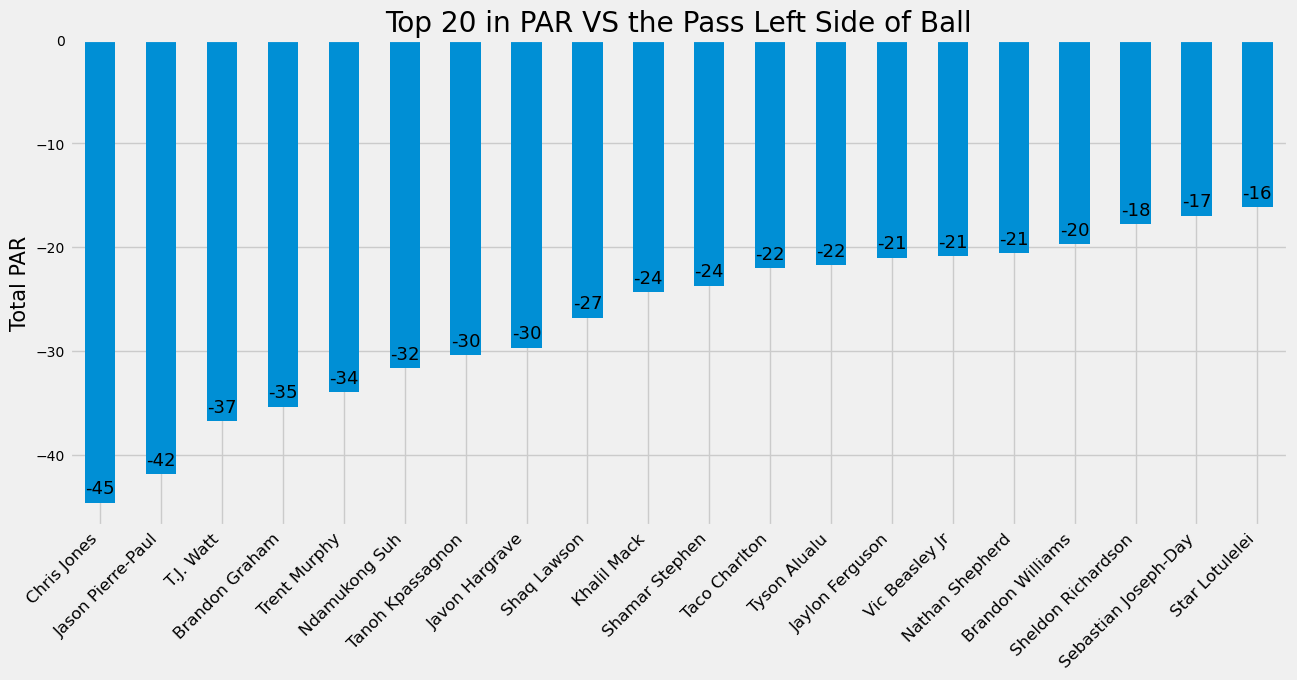

In [396]:
plt.style.use('fivethirtyeight')

plt.figure(figsize=(14,6))
plt.xlabel(xlabel='',fontsize=15)
plt.ylabel(ylabel='Total PAR',fontsize=15)

plt.xticks(fontsize=12)
plt.yticks(fontsize=10)

DL_groupby_pass_L = DL_pass_L.groupby('Name')['PAR'].sum().nsmallest(20).plot.bar()
for p in DL_groupby_pass_L.patches:
    DL_groupby_pass_L.annotate(format(p.get_height(), '.0f'), 
    (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center',fontsize=13,
    xytext = (0, 10), textcoords = 'offset points')
DL_groupby_pass_L.xaxis.set_label_text("")
plt.title('Top 20 in PAR VS the Pass Left Side of Ball')
plt.xticks(rotation=45, horizontalalignment= 'right')

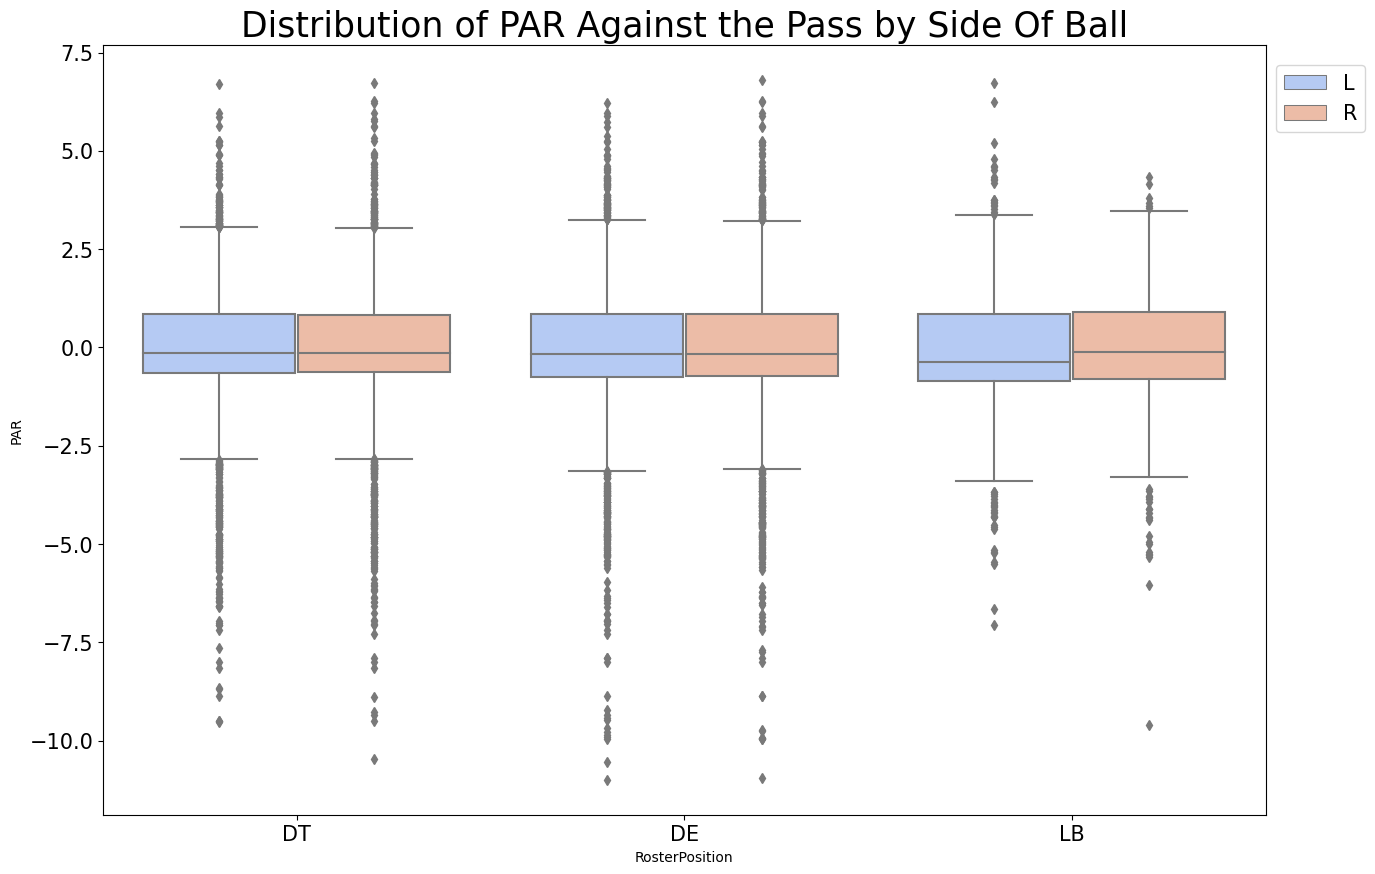

In [392]:
plt.style.use('default')

plt.figure(figsize=(15,10))
ax = sns.boxplot(x="RosterPosition", y="PAR", hue="SideOfBall",
            data=DL_pass, palette="coolwarm")
ax.legend(loc='center left', bbox_to_anchor=(1, 0.93),prop={'size': 15})
plt.title('Distribution of PAR Against the Pass by Side Of Ball',fontsize=25)
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=15)

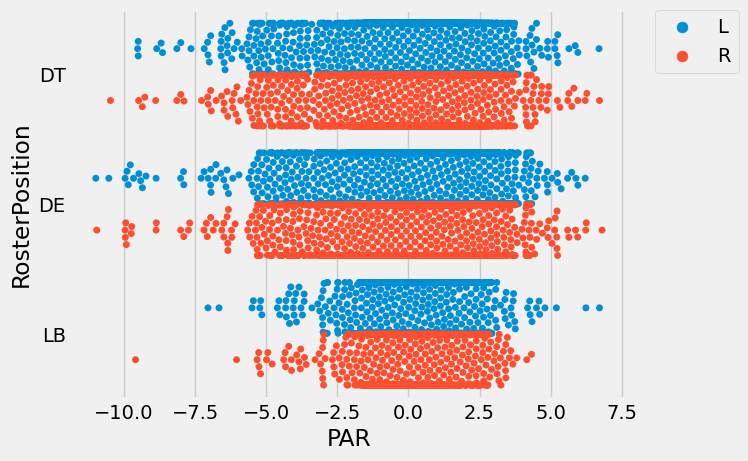

In [412]:
sns.swarmplot(x='PAR',y='RosterPosition',hue='SideOfBall',data=DL_pass,dodge=True)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [413]:
DL_pass['OffensiveYardage'].sum()

172606

In [414]:
DL_run = DL[DL['EventType']=='rush']

In [415]:
DL_run['OffensiveYardage'].sum()

96684

In [416]:
DL_pass['OffensiveYardage'].mean()

6.080887792848335

In [417]:
DL_run['OffensiveYardage'].mean()

4.267855566345899

In [419]:
DL_run.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22654 entries, 0 to 52509
Data columns (total 45 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   GameID              22654 non-null  int64  
 1   EventID             22654 non-null  int64  
 2   Season              22654 non-null  int64  
 3   Week                22654 non-null  int64  
 4   StadiumName         22654 non-null  object 
 5   OffensiveTeam       22654 non-null  object 
 6   DefensiveTeam       22654 non-null  object 
 7   OffTeamScoreBefore  22654 non-null  int64  
 8   DefTeamScoreBefore  22654 non-null  int64  
 9   Quarter             22654 non-null  int64  
 10  TimeLeft            22654 non-null  int64  
 11  Down                22654 non-null  int64  
 12  ToGo                22654 non-null  int64  
 13  SideOfField         22654 non-null  object 
 14  StartYard           22654 non-null  int64  
 15  EventType           22654 non-null  object 
 16  Firs

In [420]:
DL_pass.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28385 entries, 8 to 52505
Data columns (total 45 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   GameID              28385 non-null  int64  
 1   EventID             28385 non-null  int64  
 2   Season              28385 non-null  int64  
 3   Week                28385 non-null  int64  
 4   StadiumName         28385 non-null  object 
 5   OffensiveTeam       28385 non-null  object 
 6   DefensiveTeam       28385 non-null  object 
 7   OffTeamScoreBefore  28385 non-null  int64  
 8   DefTeamScoreBefore  28385 non-null  int64  
 9   Quarter             28385 non-null  int64  
 10  TimeLeft            28385 non-null  int64  
 11  Down                28385 non-null  int64  
 12  ToGo                28385 non-null  int64  
 13  SideOfField         28385 non-null  object 
 14  StartYard           28385 non-null  int64  
 15  EventType           28385 non-null  object 
 16  Firs

In [ ]:
#DL.groupby('PosTechnique').agg({'SalaryAvgHalf':'mean', 
 #                        'EPA':'mean'}).nsmallest(20,'SalaryAvgHalf')

In [ ]:
#DL_DE0 = DL[DL['PosTechnique']=='DE0']
#DL_DE0.groupby('Name').agg({'SalaryAvgHalf':'mean', 
 #                        'EPA':'sum'}).nsmallest(20,'SalaryAvgHalf')

In [ ]:
DL_groupby = DL.groupby('PosTechnique').agg({ 
                         'EPA':'mean'})
DL_groupby

In [221]:
EPA_mean = pd.read_csv('EPA_mean.csv')

In [222]:
EPA_mean.head()

PosTechnique  EPA_mean
0          DE0 -0.060663
1          DE1 -0.030314
2          DE2 -0.061557
3         DE2i -0.004921
4          DE3  0.002743

In [223]:
# Merging two df together on a left outer join on the ['PosTechnique'] column
DL = pd.merge(DL, EPA_mean, how='left', on=['PosTechnique'])


In [224]:
DL.head() 

GameID  EventID  Season  Week         StadiumName OffensiveTeam  \
0    2630       10    2019     9  State Farm Stadium     Cardinals   
1    2630       10    2019     9  State Farm Stadium     Cardinals   
2    2630       10    2019     9  State Farm Stadium     Cardinals   
3    2630       10    2019     9  State Farm Stadium     Cardinals   
4    2630       15    2019     9  State Farm Stadium     Cardinals   

  DefensiveTeam  OffTeamScoreBefore  DefTeamScoreBefore  Quarter  ...  \
0         49ers                   0                   0        1  ...   
1         49ers                   0                   0        1  ...   
2         49ers                   0                   0        1  ...   
3         49ers                   0                   0        1  ...   
4         49ers                   0                   0        1  ...   

   Interception  ForcedFumble  RecoveredFumble SalaryAvgFull  SalaryAvgHalf  \
0             0             0                0        636964       318482.0   
1             0             0                0       2460658      1230329.0   
2             0             0                0       4547749      2273874.5   
3             0             0                0       8387966      4193983.0   
4             0             0                0        636964       318482.0   

  PosTechnique  ScoreDifferential  TimeLeftGame        Name_Position  EPA_mean  
0          DT1                  0          3576        D.J. Jones DT -0.019266  
1          DE7                  0          3576     Arik Armstead DE -0.043534  
2          DT1                  0          3576  DeForest Buckner DT -0.019266  
3          DE5                  0          3576         Nick Bosa DE -0.014064  
4          DT1                  0          3448        D.J. Jones DT -0.019266  

[5 rows x 46 columns]

In [284]:
# Creation of PAR metric
DL['PAR'] = DL['EPA'] - DL['EPA_mean']


In [ ]:
DL.head()

## End

In [230]:
DL[['Name','SalaryAvgHalf']].head(4)

Name  SalaryAvgHalf
0        D.J. Jones       318482.0
1     Arik Armstead      1230329.0
2  DeForest Buckner      2273874.5
3         Nick Bosa      4193983.0

In [269]:
DL['PAR2'] = DL['PAR'] *1000000

In [358]:
DL2 = DL[DL.SideOfBall != 'M']


In [397]:
DL.columns

Index(['GameID', 'EventID', 'Season', 'Week', 'StadiumName', 'OffensiveTeam',
       'DefensiveTeam', 'OffTeamScoreBefore', 'DefTeamScoreBefore', 'Quarter',
       'TimeLeft', 'Down', 'ToGo', 'SideOfField', 'StartYard', 'EventType',
       'FirstDown', 'Touchdown', 'Safety', 'Turnover', 'OffensiveYardage',
       'PlayDesc', 'PlayerId', 'Name', 'RosterPosition', 'OnFieldPosition',
       'SideOfBall', 'TechniqueName', 'IsRushing', 'SoloTackle',
       'AssistedTackle', 'Pressure', 'SoloSack', 'AssistedSack', 'PassBreakup',
       'Interception', 'ForcedFumble', 'RecoveredFumble', 'SalaryAvgFull',
       'SalaryAvgHalf', 'PosTechnique', 'ScoreDifferential', 'TimeLeftGame',
       'Name_Position', 'PAR'],
      dtype='object')